# Банки — Сегментация пользователей по потреблению

Заказчик ПАО «Метанпромбанк»

__Задача**:**__

Проанализируйте клиентов регионального банка и сегментируйте пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

- Проведите исследовательский анализ данных,
- Сегментируйте пользователей на основе данных о количестве потребляемых продуктов,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.*
    

(задачи выше сформулированы предварительно, окончательная постановка задачи произойдёт на вводной встрече)

 **Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром», файл - bank_scrooge.csv. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество объектов в собственности,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — заработная плата клиента,
- `churn` — ушёл или нет.

По итогам исследования подготовим презентацию.

# План исследования.

## Загрузка и первичное ознакомление с данными
Импорт необходимых библиотек, чтение данных и сохранение в переменную, изучение общих сведений.

## Предобработка данных
Проверить данные на наличие дубликатов, несоответствие типов данных , приведем наименование колонок к общему стилю, проверим на наличие пропусков. Проведем категоризацию данных.

## Исследовательский анализ данных
Проведем исследовательский анализ данных. Построим матрицу корреляции.

## Сегментация клиентов
Проведем сегментацию клиентов по количеству продуктов. Далее посмотрим на клиентов (по количеству продуктов) распределение по возрасту, по полу, по заработной плате и т.д.


## Статистическая проверка гипотез
Проверим две гипотезы. Необходимо сформулировать одну нулевую гипотезу и альтернативную.


## Выводы и рекомендации
По результатам проведенного анализа необходимо сделать общий вывод и дать рекомендации в разбивке по сегментам.


-

__1  ЗАГРУЗКА И ПЕРВИЧНОЕ ОЗНАКОМЛЕНИЕ С ДАННЫМИ__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action = 'ignore')
from scipy import stats as st
from plotly import graph_objects as go
from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [2]:
# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', 50)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', 120)

# игнорируем предупреждения
pd.set_option('chained_assignment', 'warn')
warnings.simplefilter(action='ignore', category=FutureWarning)

# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# устанавливаем стиль графиков
sns.set(rc={'figure.dpi':200, 'savefig.dpi':300})   
sns.set_context('notebook') 
sns.set_style('ticks') 
sns.set_style('whitegrid')

In [3]:
# чтение файлов с данными и сохранение в data
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
data = pd.read_csv(path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
#Изучим описательную статистику, посмотри на среднее занчение, медианное и пр.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
USERID,"10,000.00","171,814.71","33,708.24","94,561.00","142,810.25","172,728.00","201,261.75","229,145.00"
score,"10,000.00",848.70,65.45,642.00,802.00,853.00,900.00,"1,000.00"
age,"9,974.00",42.73,12.18,18.00,33.00,40.00,51.00,86.00
equity,"10,000.00",2.63,1.98,0.00,0.00,3.00,4.00,9.00
balance,"7,705.00","827,794.31","1,980,614.15",0.00,"295,554.16","524,272.20","980,705.85","119,113,552.01"
products,"10,000.00",1.87,0.79,0.00,1.00,2.00,2.00,5.00
credit_card,"10,000.00",0.68,0.47,0.00,0.00,1.00,1.00,1.00
last_activity,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EST_SALARY,"10,000.00","147,866.89","139,388.51","2,546.30","75,251.90","119,658.10","174,500.54","1,395,064.45"
churn,"10,000.00",0.18,0.39,0.00,0.00,0.00,0.00,1.00


Файл открыли и изучили. Данный файл содержит 10000 строк и 12 колонок. Таблица содержит 7 столбцов с данными представляющие целые числа(тип int), 3 столбца c вещественными числами (тип float), 2 столбцов с типом object. Некоторые столбцы имеют пропуски, с которыми для корректного исследования необходимо будет поработать.
Изучили минимальные, максимальные, средние и медианные показателди каждого столбца:
 - баллы кредитного скоринга - мин. 642, макс. 1000, среднее 65,45, медианное 642;
 - возраст клиентов колеблется от 18 до 86 лет;
 - количество объектов в собственности - у клиента может и не быть в собственности недвижимости, так же может иметь и 9 объектов в собственности;
 - у клиента может и не быть на счете денежных средств, а у кого-то достигает сумма более 110 миллионов;
 - у клиента может и не быть действующих продуктов в банке (минимум 0, максимум - 5);
 - так же и с кредитными картами, у клиента ее может и не быть вовсе, но 68% клиентов пользуется кредитной картой банка;
 - почти половина клиентов не является активными пользователями продуктов - 48%;
 - отток составляет - 18%.

Отсутствующие значения есть только в колонке balance.   
Приступим к преобработке данных.

__2  ПРЕДОБРАБОТКА ДАННЫХ__

In [6]:
# приведем названия заголовков к нижнему регистру:

data.columns = data.columns.str.lower()

data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [7]:
# переименуем столбец
data.rename(columns = {'userid':'user_id'}, inplace = True)

In [8]:
# проверка на дубликаты
data.duplicated().sum()

0

In [9]:
# удалим явный дубликат
data = data.drop_duplicates().reset_index(drop=True)

In [10]:
# посмотрим на количество уникальных id
len(data['user_id'].unique())

9927

In [11]:
# проверим неявные дубликаты в колонке id
data[data.duplicated(subset=['user_id'])]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.00,Ярославль,М,49.00,0,NaN,1,1,1,"177,700.78",0
1837,210662,896.00,Рыбинск,Ж,37.00,0,NaN,2,0,0,"90,916.04",0
2138,131419,739.00,Рыбинск,Ж,37.00,3,"1,307,941.65",3,0,0,"103,867.47",0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,"160,368.82",0
2302,220816,934.00,Рыбинск,Ж,74.00,5,"1,294,285.39",3,1,0,"95,606.80",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.00,Рыбинск,Ж,36.00,0,"73,574.07",2,0,1,"79,963.59",0
9785,168998,895.00,Рыбинск,М,44.00,0,"282,653.53",3,0,0,"255,296.47",0
9819,140934,832.00,Рыбинск,Ж,NaN,3,"385,763.16",2,0,1,"59,651.35",0
9880,217412,886.00,Ярославль,Ж,35.00,3,"1,026,172.14",2,1,0,"53,099.16",0


Был выявлин один явный дубликат, его мы удалили.\
Так же было выявлено 72 неявных дубликата по userid, их удалять мы не будем, так как под одним id указаны разный возрост, доход, наличие продуктов, и это может исказить результаты исследования.
Данные дубликаты были выявлены только в 3 городах, это Ярославль, Ростов и Рыбинск, возможно произошла ошибка при записи данных.

In [12]:
# для удобной дальнейшей работы приведем столбец с зарплатой к целочисленному типу
data['est_salary'] = data['est_salary'].astype('int')

In [13]:
#изучим колонку с пропусками, выведим первые строки таблицы с клиентами, у которых не заполнено значение balance.
no_balances = data[data['balance'].isnull()]
no_balances.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683,0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,238055,0
10,148929,927.00,Ростов,М,52.00,0,NaN,1,1,1,196820,0
11,172184,921.00,Ростов,М,41.00,0,NaN,1,1,1,217469,0
19,127034,922.00,Рыбинск,Ж,53.00,0,NaN,1,0,0,147094,0


Проанализируем данные с пропусками в столбце balance

In [14]:
no_balances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 2 to 9997
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2295 non-null   int64  
 1   score          2295 non-null   float64
 2   city           2295 non-null   object 
 3   gender         2295 non-null   object 
 4   age            2279 non-null   float64
 5   equity         2295 non-null   int64  
 6   balance        0 non-null      float64
 7   products       2295 non-null   int64  
 8   credit_card    2295 non-null   int64  
 9   last_activity  2295 non-null   int64  
 10  est_salary     2295 non-null   int64  
 11  churn          2295 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 233.1+ KB


In [15]:
no_balances.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"2,295.00","2,295.00","2,279.00","2,295.00",0.00,"2,295.00","2,295.00","2,295.00","2,295.00","2,295.00"
mean,"172,069.45",865.35,42.09,0.05,NaN,1.16,0.82,0.55,"226,309.71",0.01
std,"33,337.08",89.60,11.94,0.23,NaN,0.40,0.39,0.50,"199,771.79",0.08
min,"114,182.00",642.00,18.00,0.00,NaN,0.00,0.00,0.00,"20,274.00",0.00
25%,"143,095.50",871.00,33.00,0.00,NaN,1.00,1.00,0.00,"120,347.00",0.00
50%,"172,659.00",903.00,40.00,0.00,NaN,1.00,1.00,1.00,"174,160.00",0.00
75%,"201,551.00",922.00,49.00,0.00,NaN,1.00,1.00,1.00,"240,014.50",0.00
max,"229,145.00",990.00,86.00,3.00,NaN,3.00,1.00,1.00,"1,333,687.00",1.00


In [16]:
no_balances['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [17]:
no_balances['products'].unique()

array([1, 2, 3, 0])

Удалять данные с отствующими значениями в колонке balance не будем, так как там присутствуют клиенты из всех городов, так же клиенты имеут от 0 до 3 продуктов в банке. Вероятность данных пропусков, клиенты не хранят на балансе в банке своих сртедств.

Проанализируем клиентов по доходу. Имеются клиенты, с указанным доходом менее 3000. Согласно данным из открытых источников, С 2018 года минимальный размер оплаты труда не может быть ниже прожиточного минимума. Поэтому с 1 января 2023 года МРОТ составил 16 242 рубля.\
Так как отсутствует понимание, за какой период была предоставлена информация, а так же нет четкого понимания, что возможно в эту колонку могли занести данные по получению пенсии по старости или инвалидности.

Посчитаем, сколько клиентов получает меньше МРОТ

In [18]:
data_min_salary = data[data['est_salary'] < 16242]
len(data_min_salary)

80

80 клиентов имеет доход менее минимально установленной.

In [19]:
data_min_salary.sample(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8129,95627,831.00,Ростов,М,25.00,6,"208,738.82",4,1,1,12945,0
9319,213574,775.00,Ярославль,Ж,61.00,4,"475,636.05",2,1,1,11788,0
1480,130802,753.00,Ярославль,М,68.00,4,"432,253.19",2,1,1,15869,0
2992,171398,843.00,Ростов,Ж,23.00,3,"70,457.70",2,1,0,13937,0
6086,174413,842.00,Рыбинск,Ж,70.00,2,"283,059.62",3,1,0,14435,0
4365,207304,781.00,Ярославль,Ж,38.00,3,"357,537.54",2,1,1,14405,0
2663,140105,821.00,Ростов,Ж,75.00,7,"631,805.72",1,1,0,8894,0
6792,218787,764.00,Рыбинск,М,20.00,4,"9,040.68",2,1,1,10299,0
3509,182260,727.00,Ярославль,Ж,27.00,3,"224,543.28",2,0,1,13525,0
6636,200253,818.00,Рыбинск,Ж,72.00,2,"436,182.27",2,1,1,11359,0


In [20]:
data_min_salary.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00
mean,"175,658.67",817.30,44.81,3.15,"312,797.23",2.10,0.70,0.53,"12,399.25",0.06
std,"31,012.57",52.83,21.28,1.68,"317,607.70",0.72,0.46,0.50,"3,321.87",0.24
min,"95,627.00",725.00,19.00,0.00,73.00,1.00,0.00,0.00,"2,546.00",0.00
25%,"148,267.75",784.75,25.00,2.00,"110,768.36",2.00,0.00,0.00,"10,137.50",0.00
50%,"176,114.00",813.50,34.50,3.00,"223,885.65",2.00,1.00,1.00,"13,492.00",0.00
75%,"200,541.50",836.75,67.00,4.00,"369,915.68",2.00,1.00,1.00,"15,103.25",0.00
max,"228,620.00",984.00,77.00,7.00,"1,457,258.51",4.00,1.00,1.00,"16,220.00",1.00


Клиентов с доходом менее МРОТ удалять не буду. Так как у клиентов имеется на балансе денежные средства (от 73 до 1457258), и в собственности имеется недвижимость. Возможно данные клиенты имеют пассивный доход, или не могут подтвердить документально не только белую часть дохода, но и серую.

__Проведем категоризацию данных__

__-по кредитному скоррингу__

In [21]:
#напишем функцию, которая распределяет уровень скоринга по категориям(на основании НБКИ)
def scoring_category(data):
    
    if data['score'] < 149:
        return 'низкий уровень'
    
    elif 150 <= data['score'] <= 593:
        return 'средний уровень'
    
    elif 594 <= data['score'] <= 903:
        return 'высокий уровень'
    
    else:
        return 'очень высокий уровень'

#добавим новый столбец в таблицу
data['scoring_category'] = data.apply(scoring_category, axis=1)

data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,scoring_category
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,75719,1,высокий уровень
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,86621,0,высокий уровень
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683,0,высокий уровень
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,174423,1,высокий уровень
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353,1,высокий уровень


In [22]:
data['scoring_category'].value_counts()

высокий уровень          7750
очень высокий уровень    2250
Name: scoring_category, dtype: int64

Text(0.5, 0, 'Уровень скоринга')

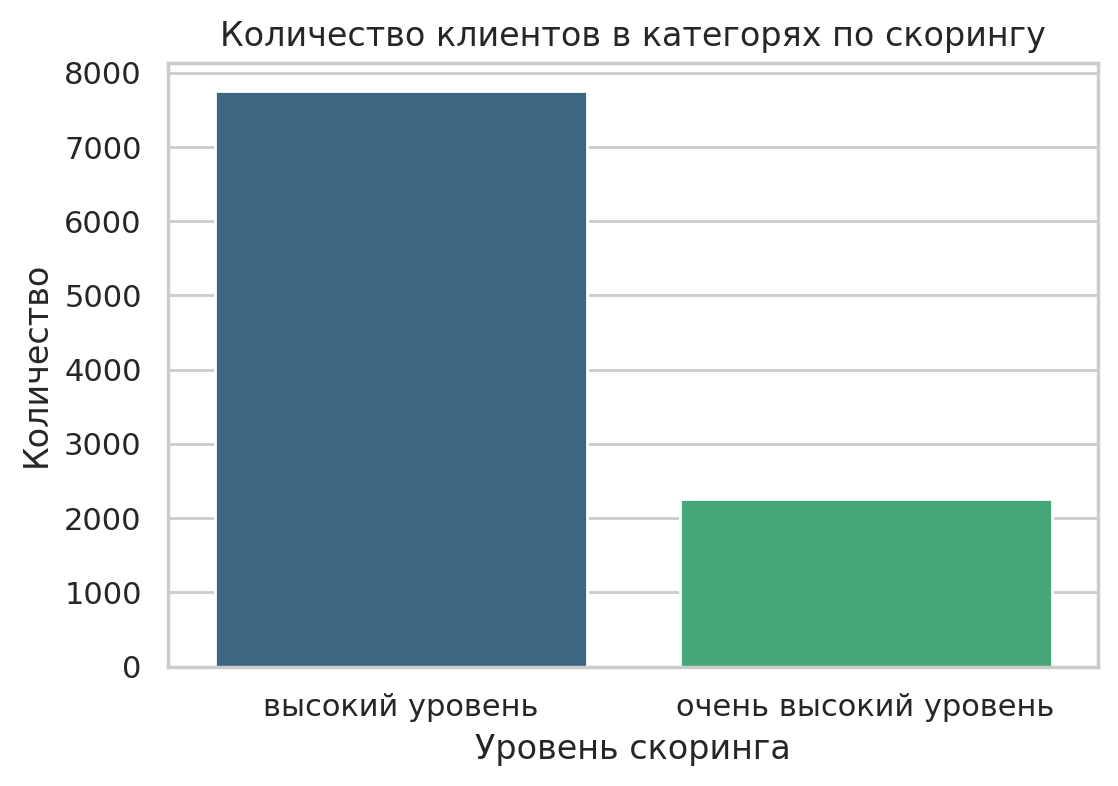

In [23]:
sns.countplot(x = 'scoring_category', data = data, palette = 'viridis')
plt.title('Количество клиентов в категорях по скорингу')
plt.ylabel('Количество')
plt.xlabel('Уровень скоринга')

Клиенты банка имеют хороший скоринг. Больше всего клиентов с высоким уровнем скоринга в пределах 594-903, таких клиентов - 7750 человек, и с очень высоким уровнем свыше 903, таких клиентов - 2249 человек.

__- по возросту__\
    Установим 3 группы, от 18 до 35 - молодой, от 36 до 50 - средний возрост, от 51 до 63 - предпенсионный, свыше 63 - пенсионный.

In [24]:
#напишем функцию, которая распределяет возраст по категориям

def age_category(data):
    
    if 18 <= data['age'] <= 35:
        return '18-35 лет'
    
    elif 36 <= data['age'] <= 50:
        return '36-50 лет'
    
    elif 51 <= data['age'] <= 63:
        return '51-63 лет'
    
    else:
        return 'свыше 63 лет'

#добавим новый столбец в таблицу
data['age_category'] = data.apply(age_category, axis=1)

data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,scoring_category,age_category
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,75719,1,высокий уровень,18-35 лет
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,86621,0,высокий уровень,36-50 лет
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683,0,высокий уровень,18-35 лет
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,174423,1,высокий уровень,51-63 лет
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353,1,высокий уровень,18-35 лет


In [25]:
data['age_category'].value_counts()

36-50 лет       4072
18-35 лет       3291
51-63 лет       1937
свыше 63 лет     700
Name: age_category, dtype: int64

Text(0.5, 0, 'Возростная категория')

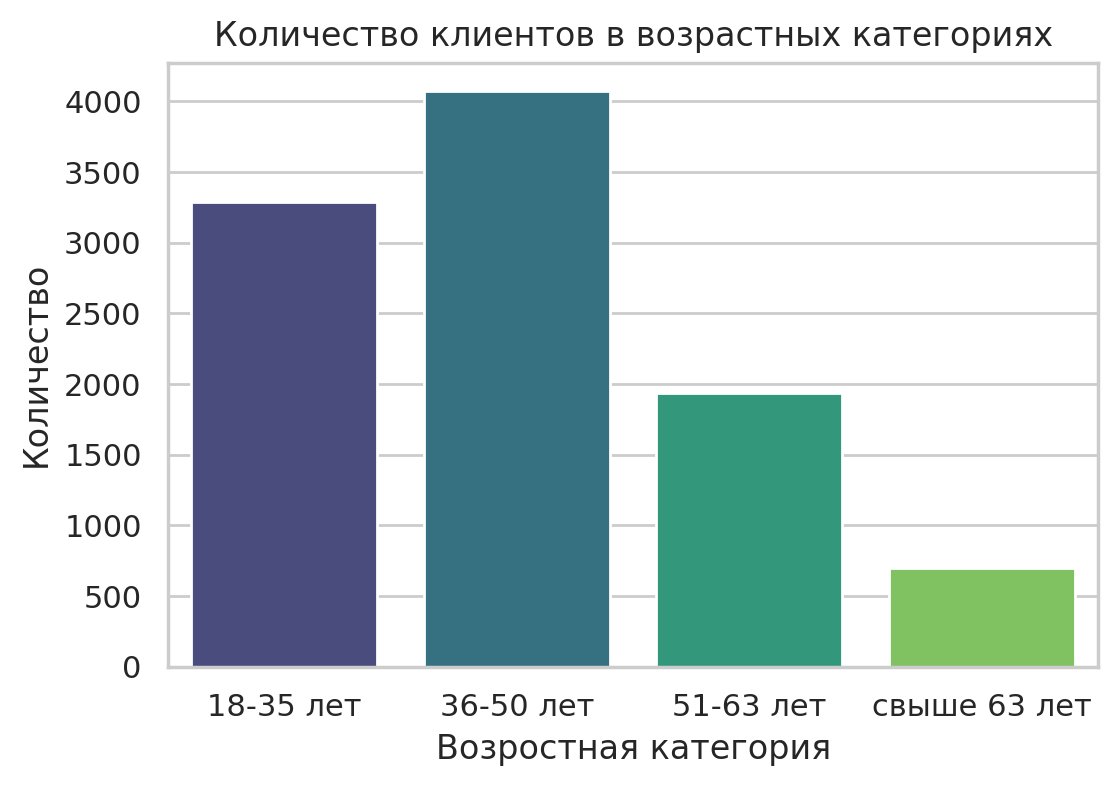

In [26]:
sns.countplot(x = 'age_category', data = data, palette = 'viridis')
plt.title('Количество клиентов в возрастных категориях')
plt.ylabel('Количество')
plt.xlabel('Возростная категория')

Больше всего клиенов в среднем возросте от 36-50 и составляет - 4113 человек, далее по количество молодых клиентов в возросте от 18 до 35 лет - 3267 человек, и меньше всего клиентов пенсионного возроста свыше 63 лет - 675 человек.

__- по уровню дохода__

In [27]:
#напишем функцию, которая распределяет уровень дохода по категориям
def est_salary_category(data):
    
    if data['est_salary'] <= 30000:
        return 'низкий доход'
    
    elif 30001 <= data['est_salary'] <= 80000:
        return 'средний доход'
    
    elif 80001 <= data['est_salary'] <= 150000:
        return 'выше среднего доход'
    
    else:
        return 'высокий доход'

#добавим новый столбец в таблицу
data['est_salary_category'] = data.apply(est_salary_category, axis=1)

data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,scoring_category,age_category,est_salary_category
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,75719,1,высокий уровень,18-35 лет,средний доход
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,86621,0,высокий уровень,36-50 лет,выше среднего доход
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683,0,высокий уровень,18-35 лет,выше среднего доход
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,174423,1,высокий уровень,51-63 лет,высокий доход
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353,1,высокий уровень,18-35 лет,средний доход


In [28]:
data['est_salary_category'].value_counts()

выше среднего доход    3746
высокий доход          3485
средний доход          2344
низкий доход            425
Name: est_salary_category, dtype: int64

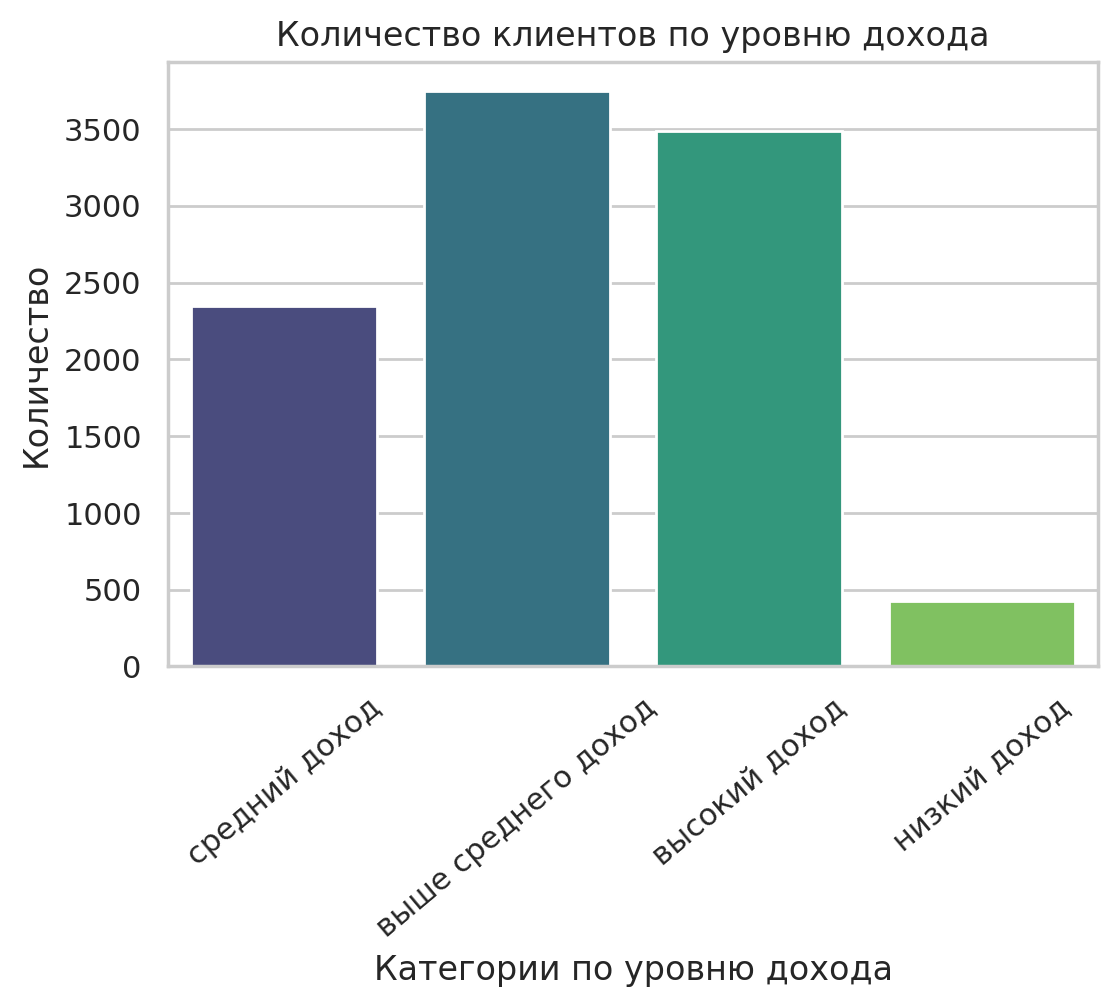

In [29]:
sns.countplot(x = 'est_salary_category', data = data, palette = 'viridis')
plt.title('Количество клиентов по уровню дохода')
plt.ylabel('Количество')
plt.xlabel('Категории по уровню дохода')
plt.xticks(rotation=40);

Больше всего клиентов с доходом выше среднего (от 80 001 до 150 000) - 3746, далее клиенты с высоким доходом свыше 150 001) - 3484.

__ВЫВОД:__\
Провели категоризаю клиентов по кредитному скорингу, по возросту, по уровню дохода (это основные категории которые в первую очередь анализирует банк перед кредитованием, остальные нет смысла рассматривать, так как наличие недвижимости или остаток баланса на счете это все рассматривается дополнительно, для перекрытия негатива, допустим, у клдиента недостаточно дохода для взятия кредитного продукта, и тогда банк может оценить наличие недвижимости, провести ее оценку и уже потом предложить КПЗН (кредит под залог недвижимости), или оценить его счета (вклады, но для этого необходим договор по вкладу, чтобы понимать какой доход он может иметь ежемесячно).\
На соновании проведенной категоризации все клиенты имеют высокий и очень высокий скоринг, основаная масса клиентов находится в молодой рабочей группе от 18 до 50, и больше половины клиентов имеют высокий уровень дохода.

__3 ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ__

Проанализируем отток по признакам.

In [30]:
data.groupby('churn').agg('mean').T

churn,0,1
user_id,"172,004.36","170,962.35"
score,845.43,863.40
age,43.02,41.45
equity,2.37,3.76
balance,"733,982.59","1,133,993.27"
products,1.76,2.38
credit_card,0.71,0.55
last_activity,0.48,0.70
est_salary,"147,782.71","148,242.51"


У тех клиентов кто остался средний скорринг высокий, средний возраст - 43, количество продуктов - 1-2.\
У тех кто ушел скорринг так же высокий, возрост 41, кооличество продуктов - 2. 

Изучим категориальные признаки по отдельности, влияющие на отток.

In [31]:
# создадим функцию для числовых признаков, для построения гистограмм и диаграмм размаха;

def numerical(data, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))
    
    sns.histplot(data[data['churn']==0][col], color = '#705898', ax = plt.subplot(1, 2, 1))
    sns.histplot(data[data['churn']==1][col], label = 'отток', color = '#F85888', ax = plt.subplot(1, 2, 1), alpha=.4)
    plt.xlabel('')
    plt.ylabel('Количество пользователей')
    plt.legend()
    
    sns.boxplot(y = col, x = 'churn', data = data, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [32]:
# создадим функцию для категориальных признаков, для построения гистограмм и диаграмм размаха;

def categorical(data, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))

    sns.countplot(x = col, hue = 'churn', data = data, ax = plt.subplot(1, 2, 1), palette='Set1')
    plt.ylabel('Количество пользователей')
    plt.xlabel('')
    plt.legend() 
    
    gr = data.groupby([col, 'churn']).agg(count=('age', 'count')).reset_index()
    sns.boxplot(x = col, y = 'count', data = gr, ax = plt.subplot(1, 2, 2), palette='Set1_r') 
    plt.xlabel('')
    plt.ylabel('')
    
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [33]:
# создадим названия графиков и диаграмм размаха для числовых и категориальных признаков:

numerical_colum = pd.DataFrame({'col' : ['score', 'age', 'equity', 'balance', 'products', 'est_salary'], 
                        'title' : ['Баллы скорринга', 'Возраст', 
                                   'Количество объектов недвижимости в собственности', 
                                   'Баланс', 'Количество продуктов банка', 
                                   'Заработная плата клиента']
                       })

categorical_colum = pd.DataFrame({'col' : ['gender', 'city', 'credit_card', 'last_activity'],
                            'title' : ['Пол', 'Город', 'Наличие кредитной карты', 'Активность']
                            })

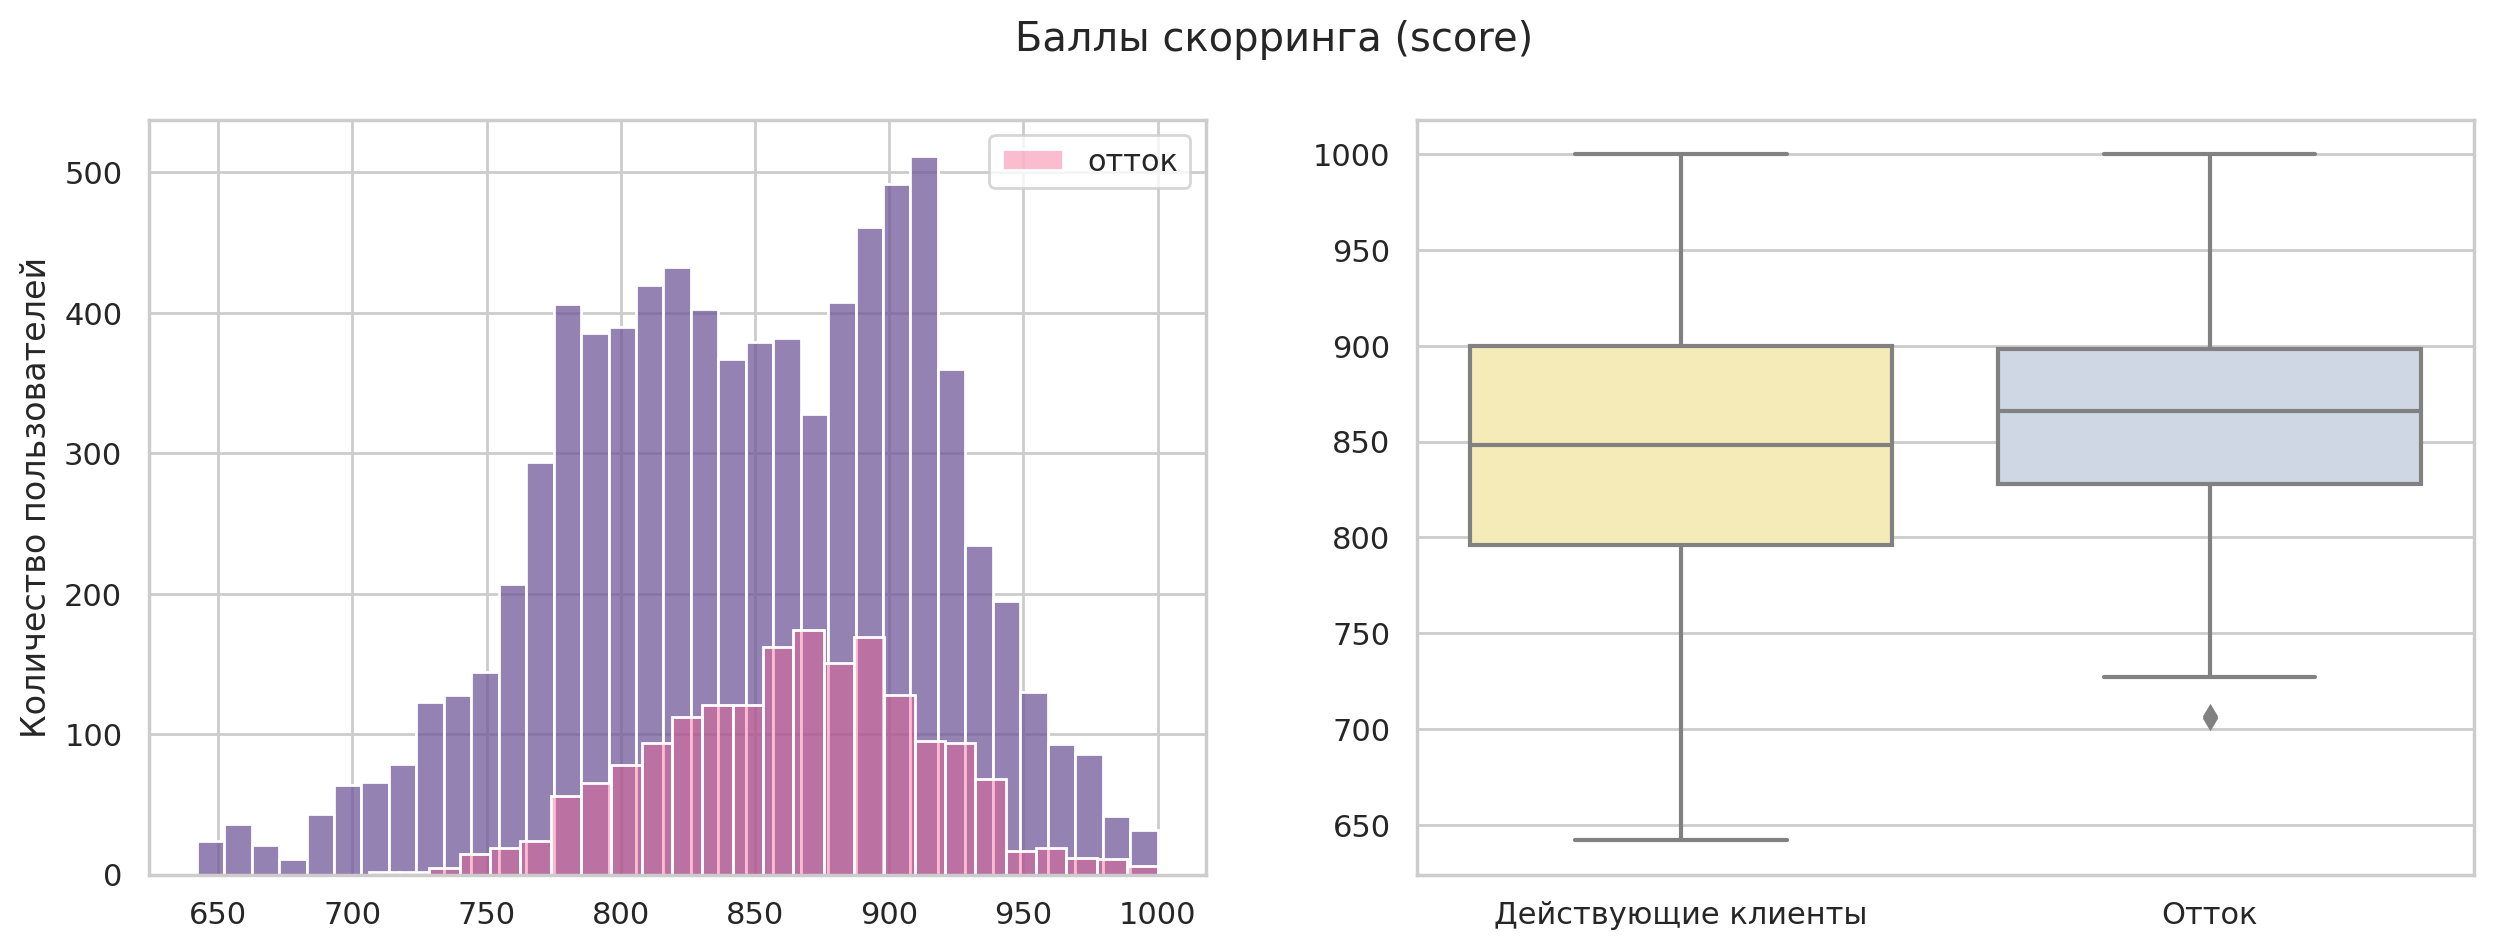

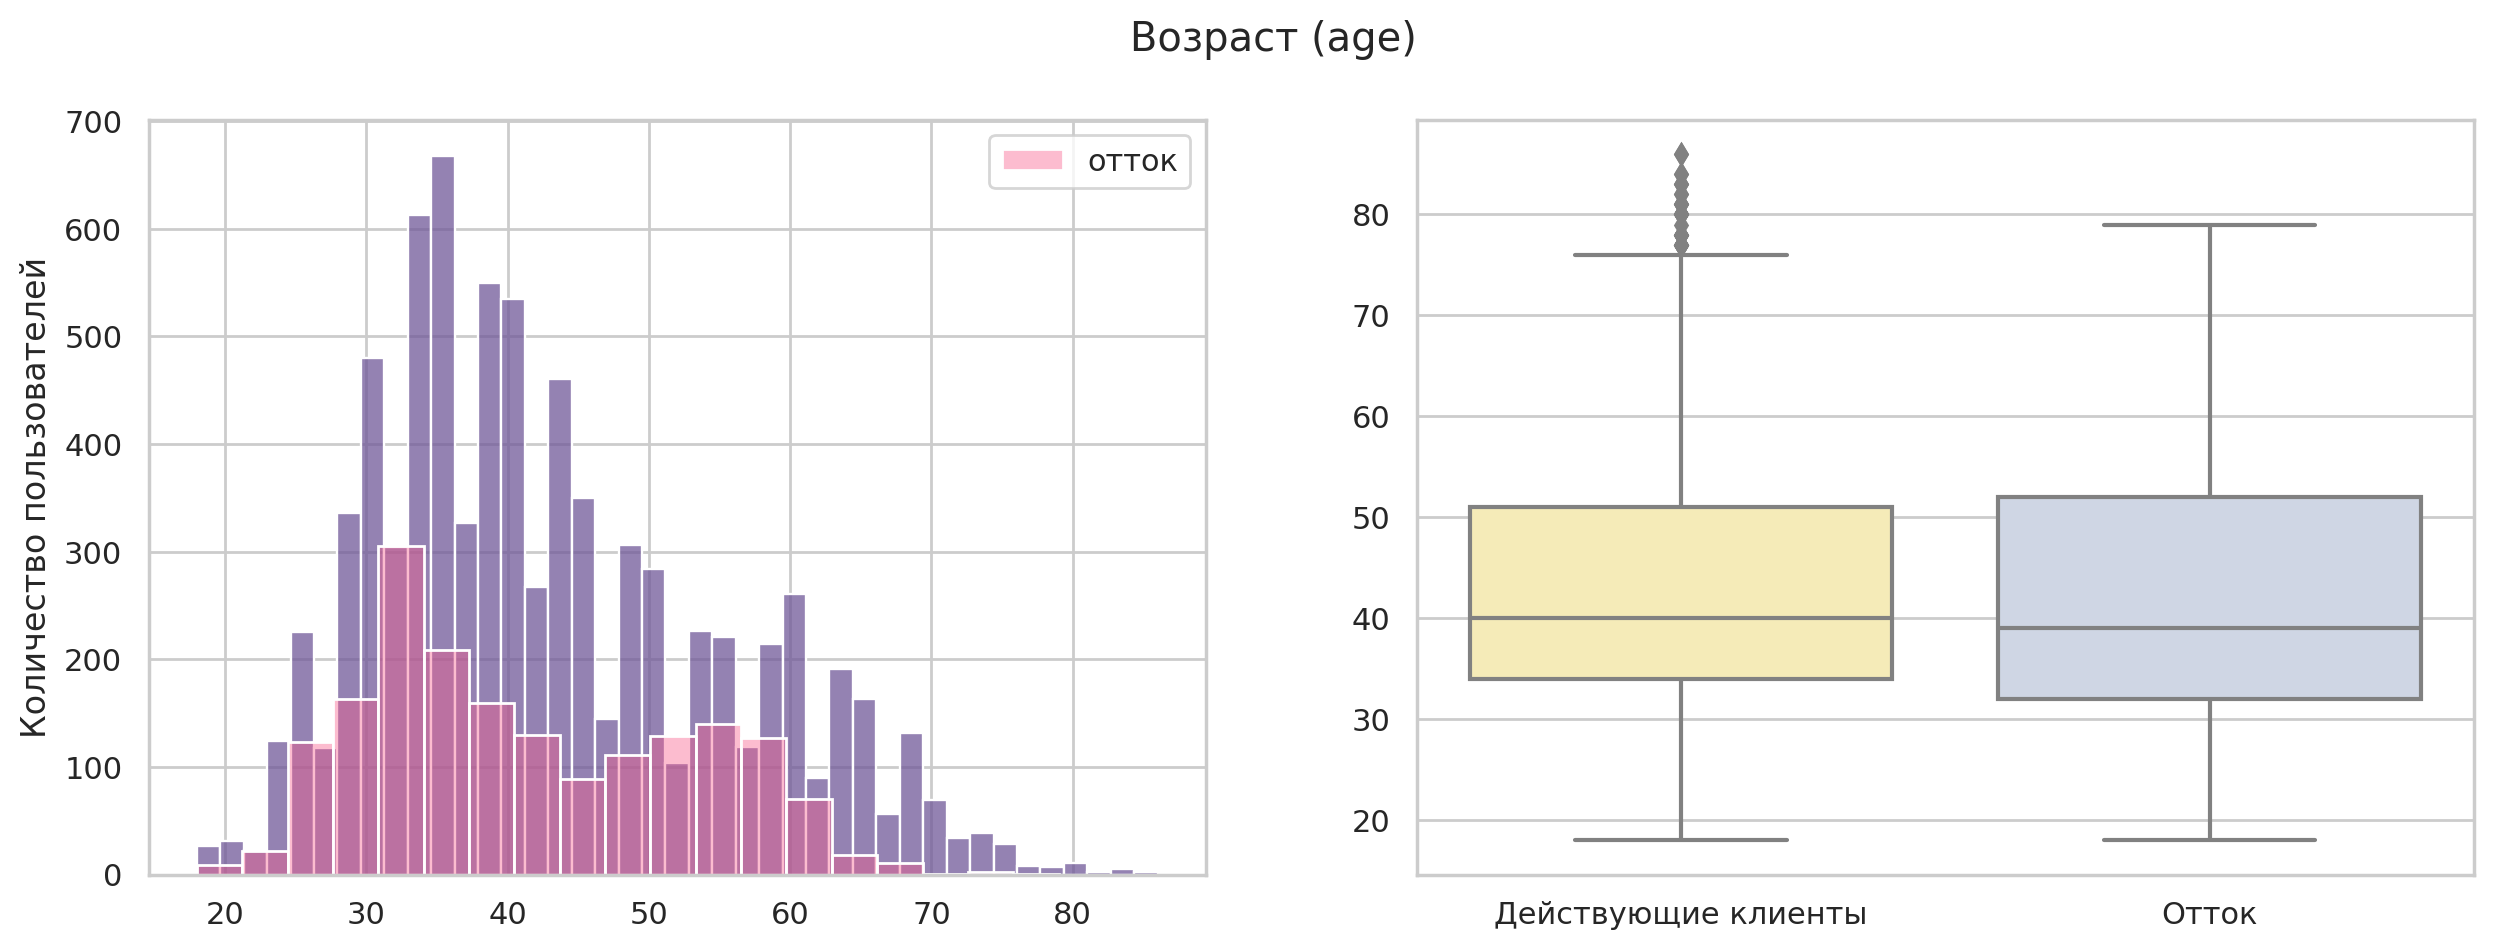

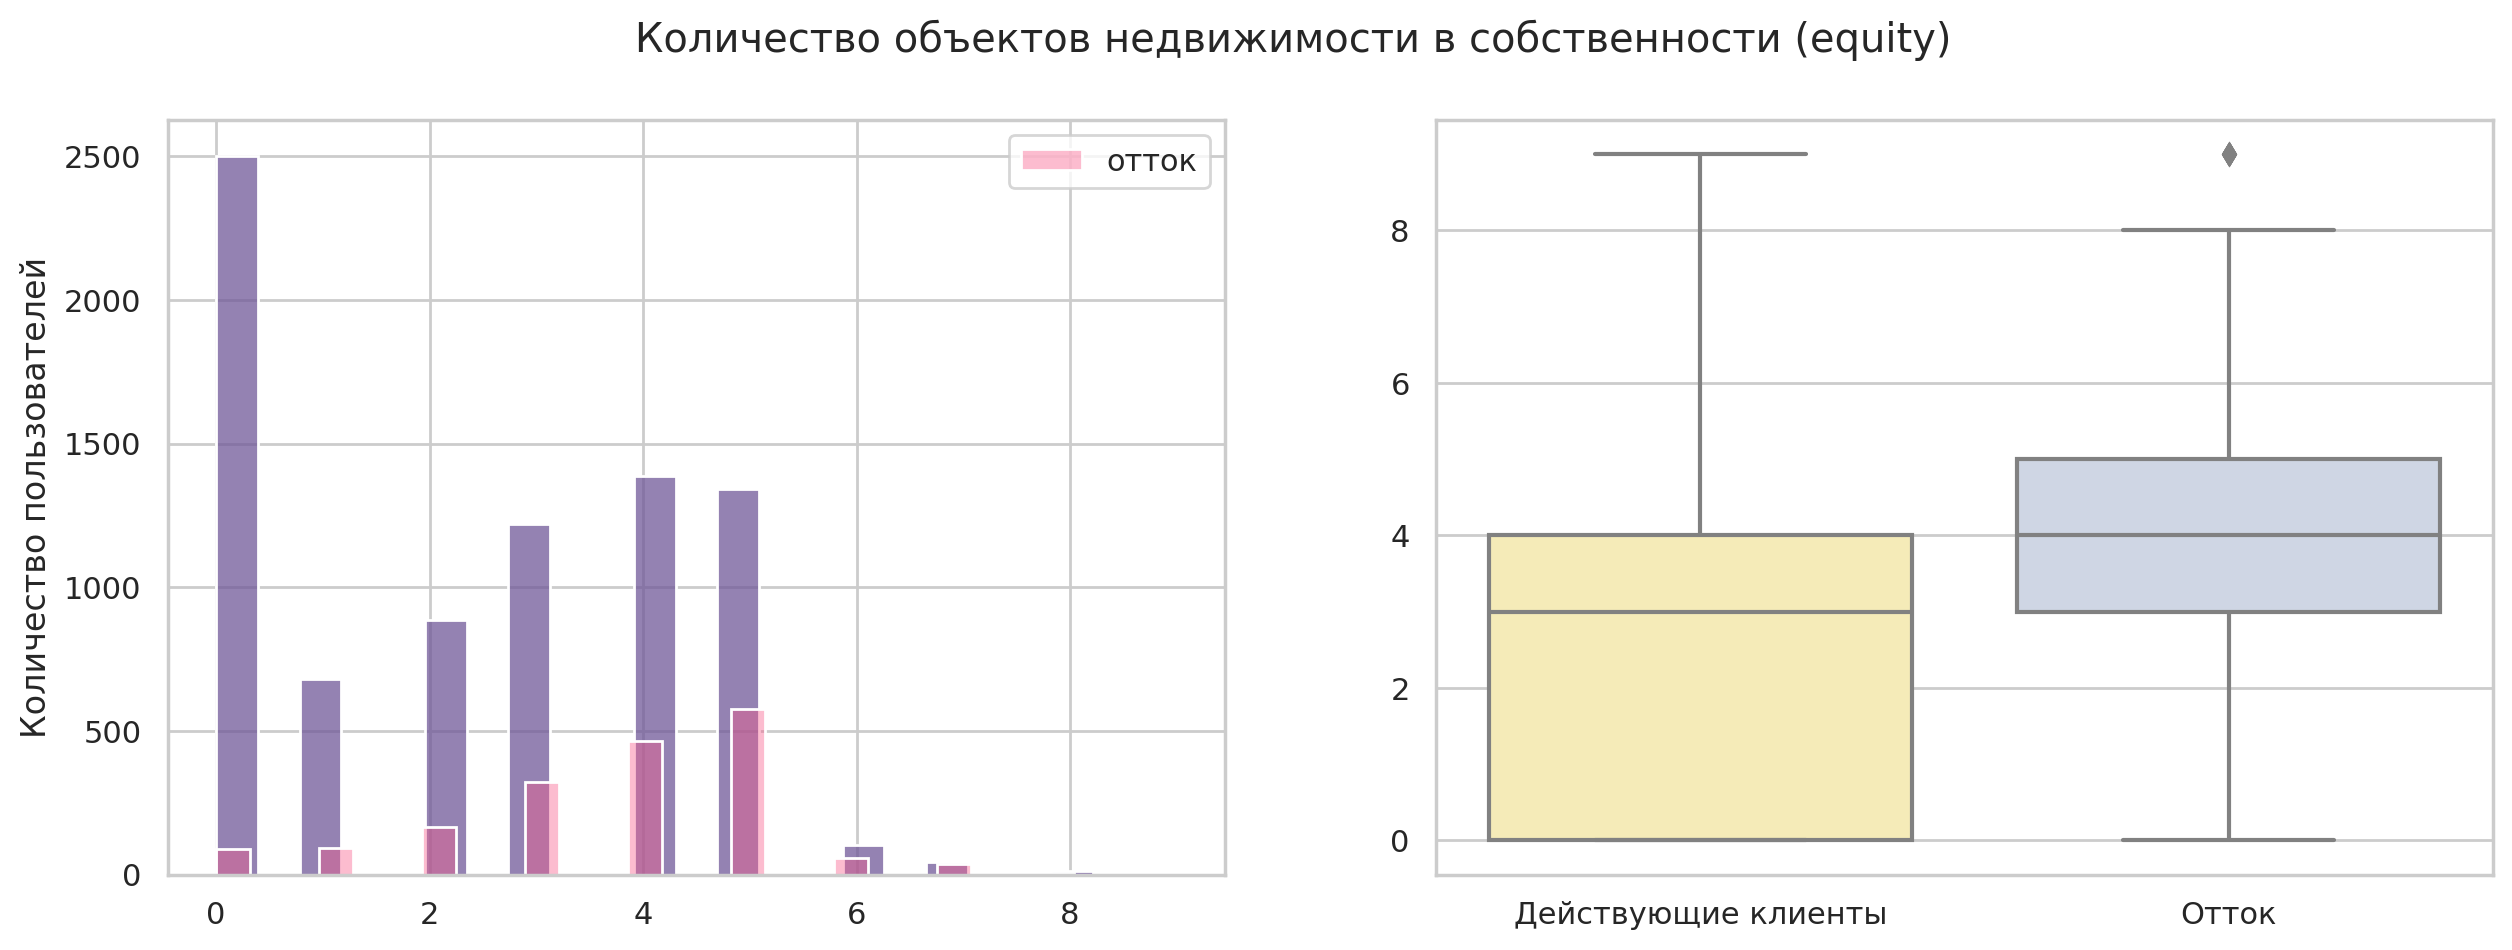

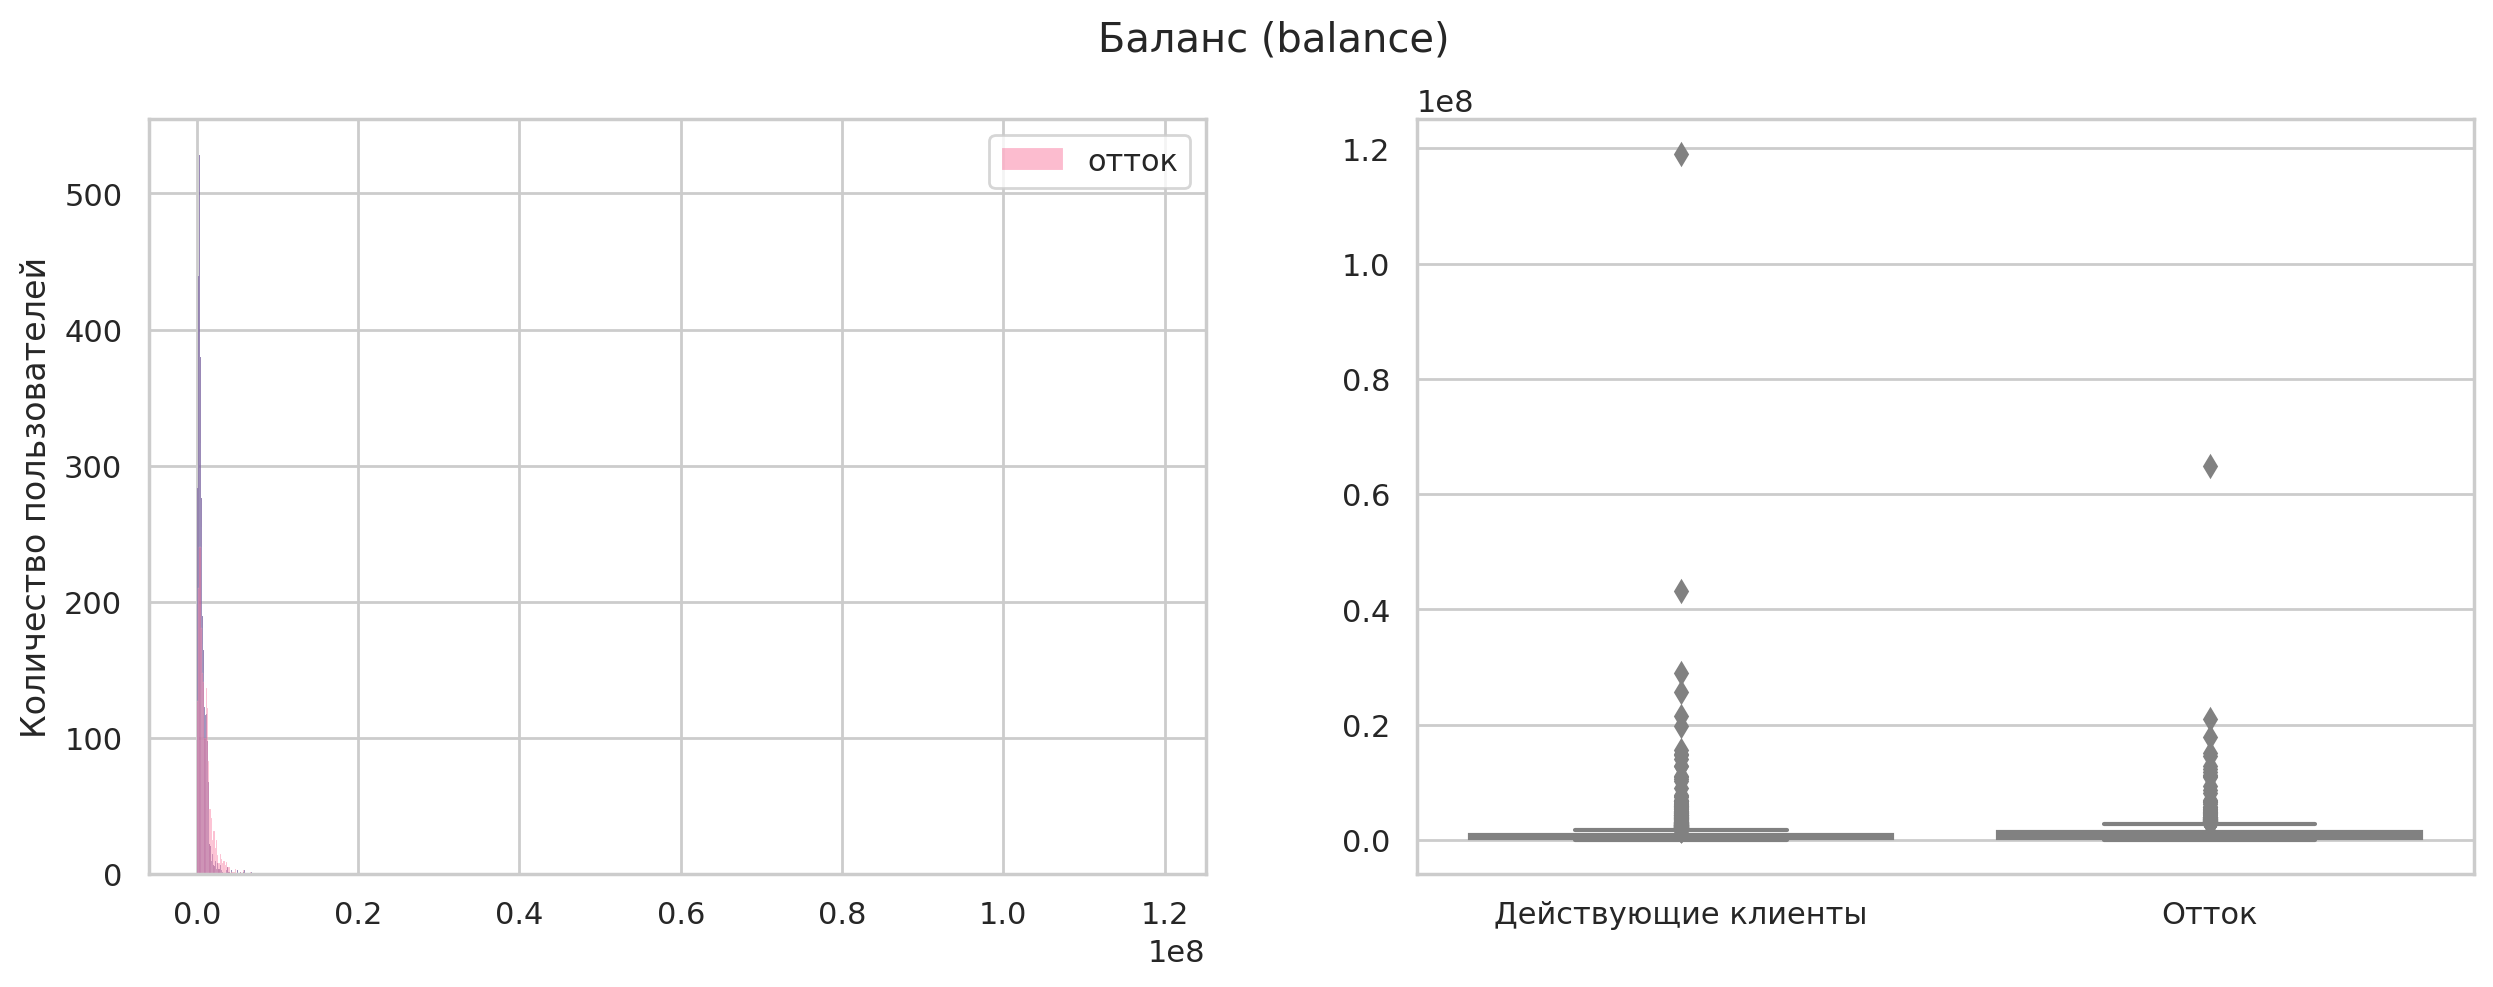

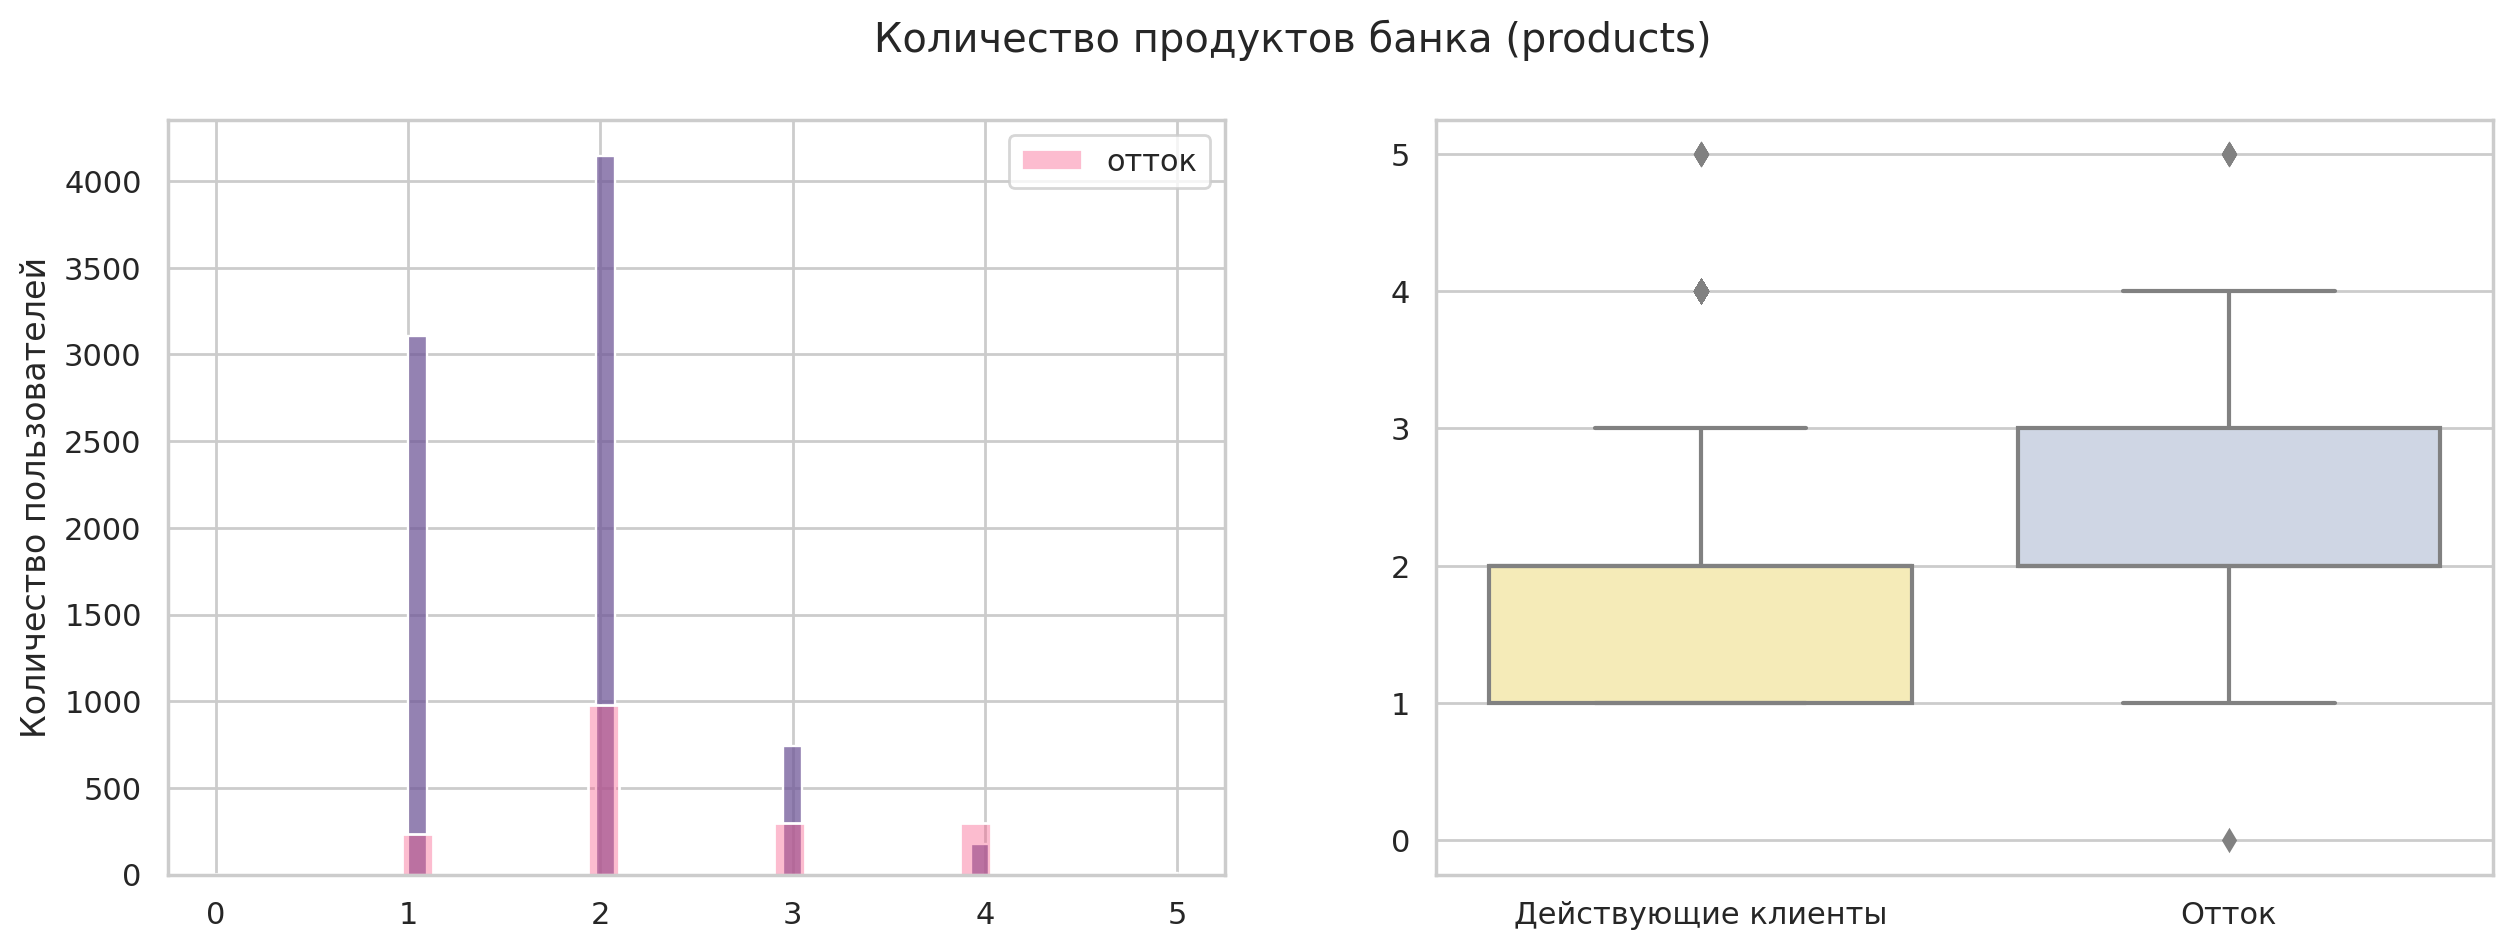

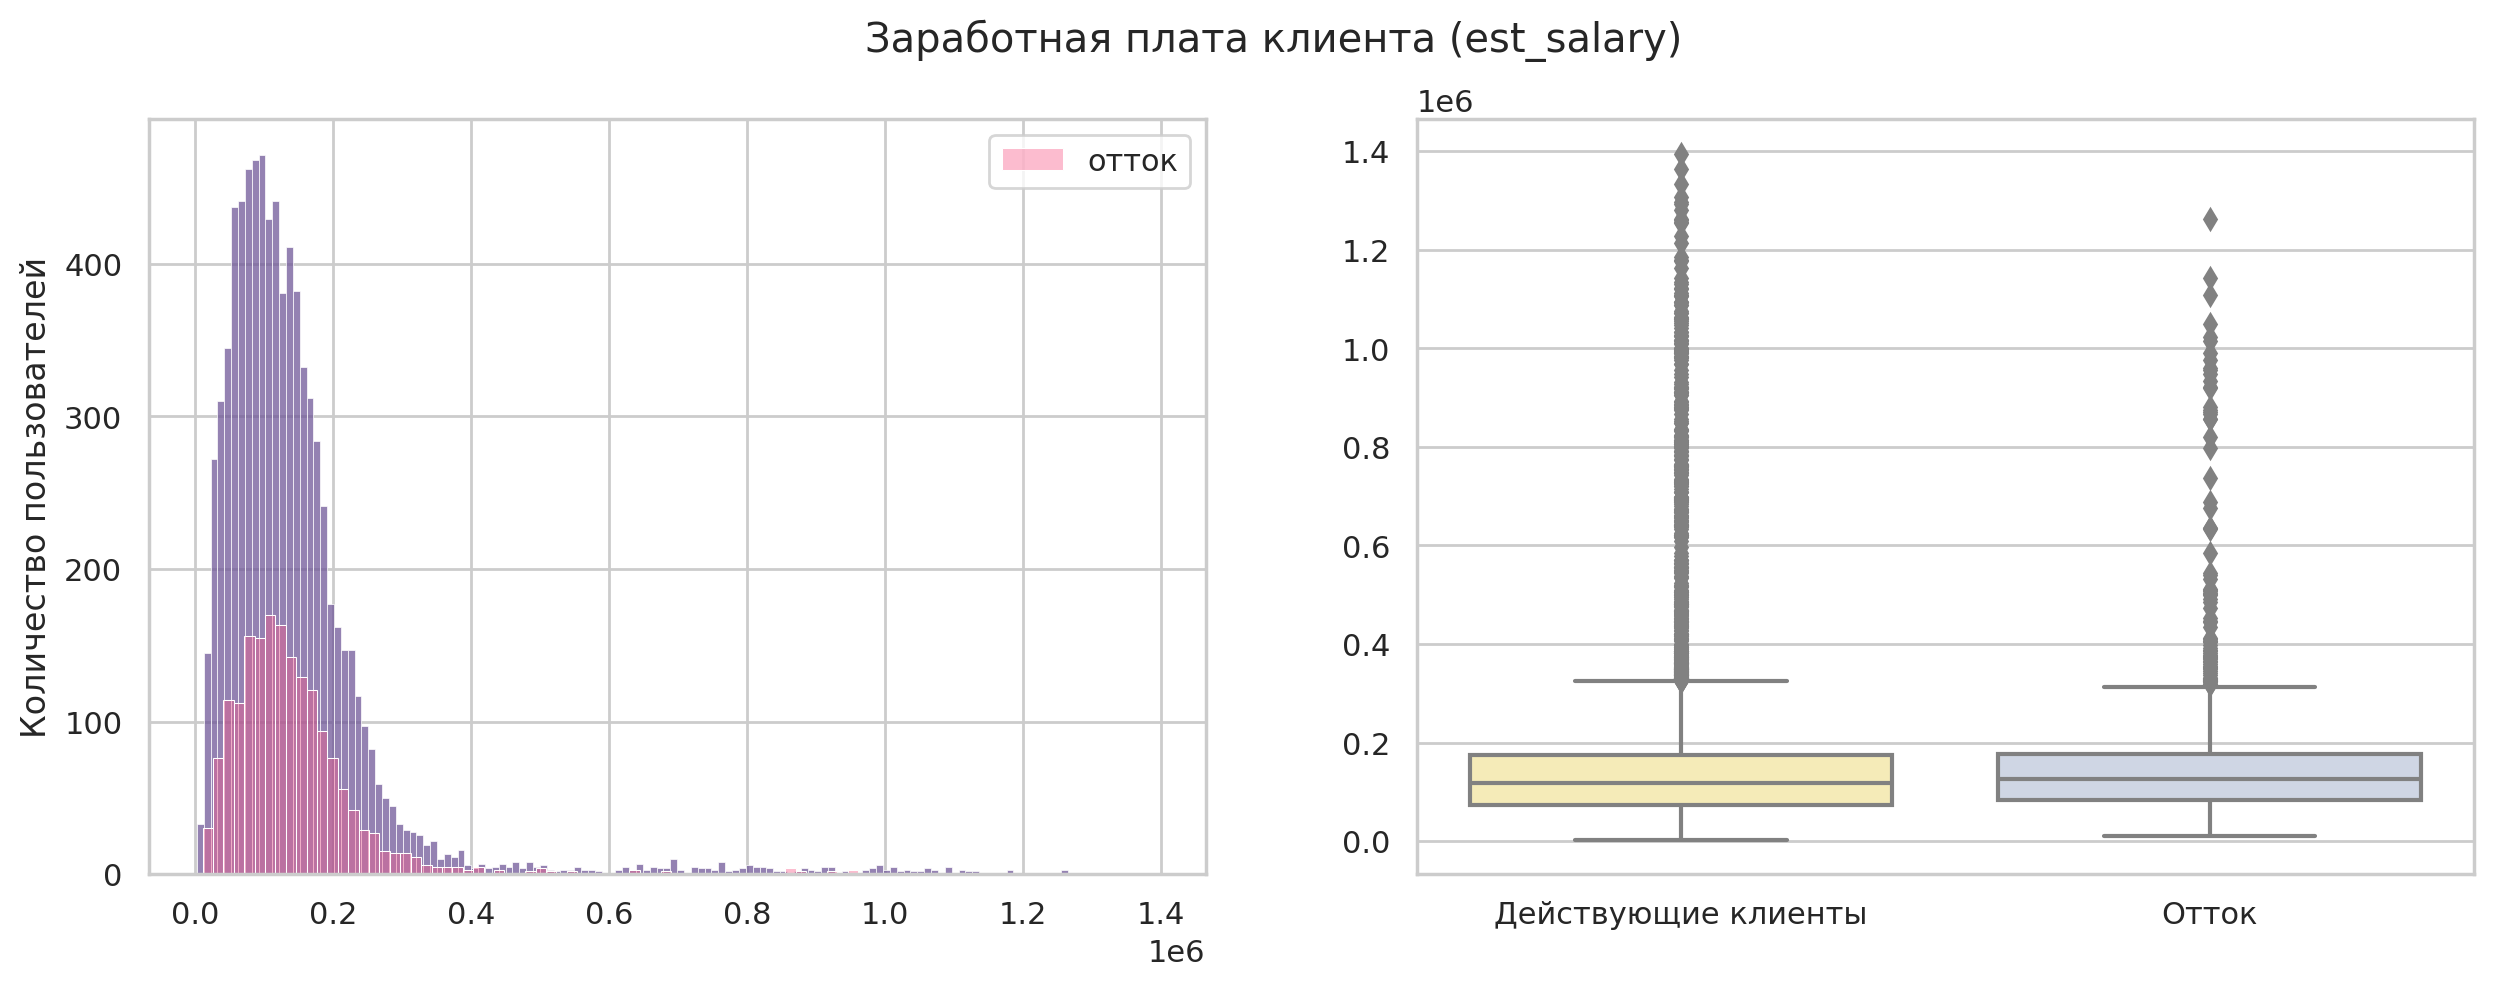

In [34]:
for index, row in numerical_colum.iterrows():
    numerical(data, row[0], row[1])

Теперь так же создадим функции, но для категориальных данных

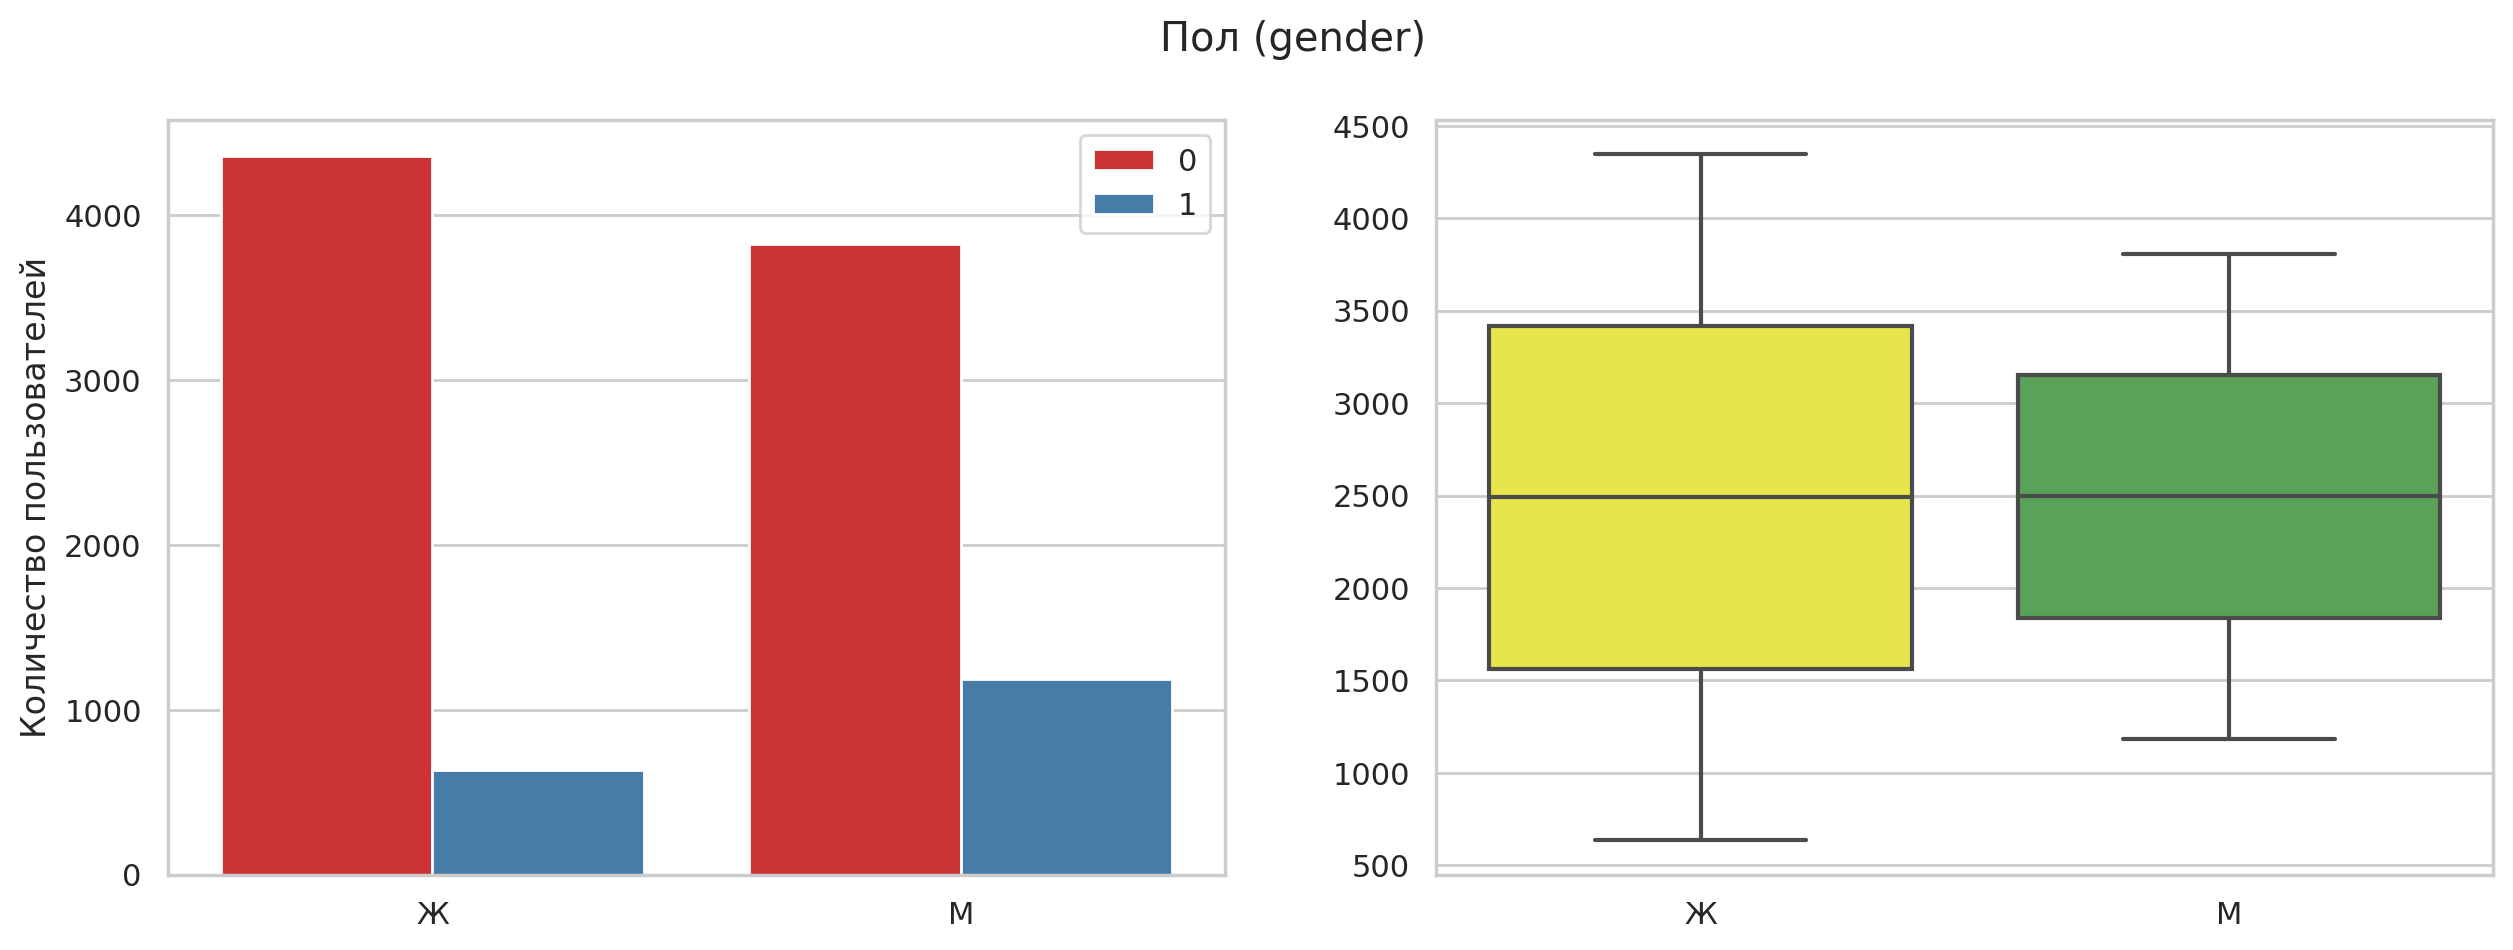

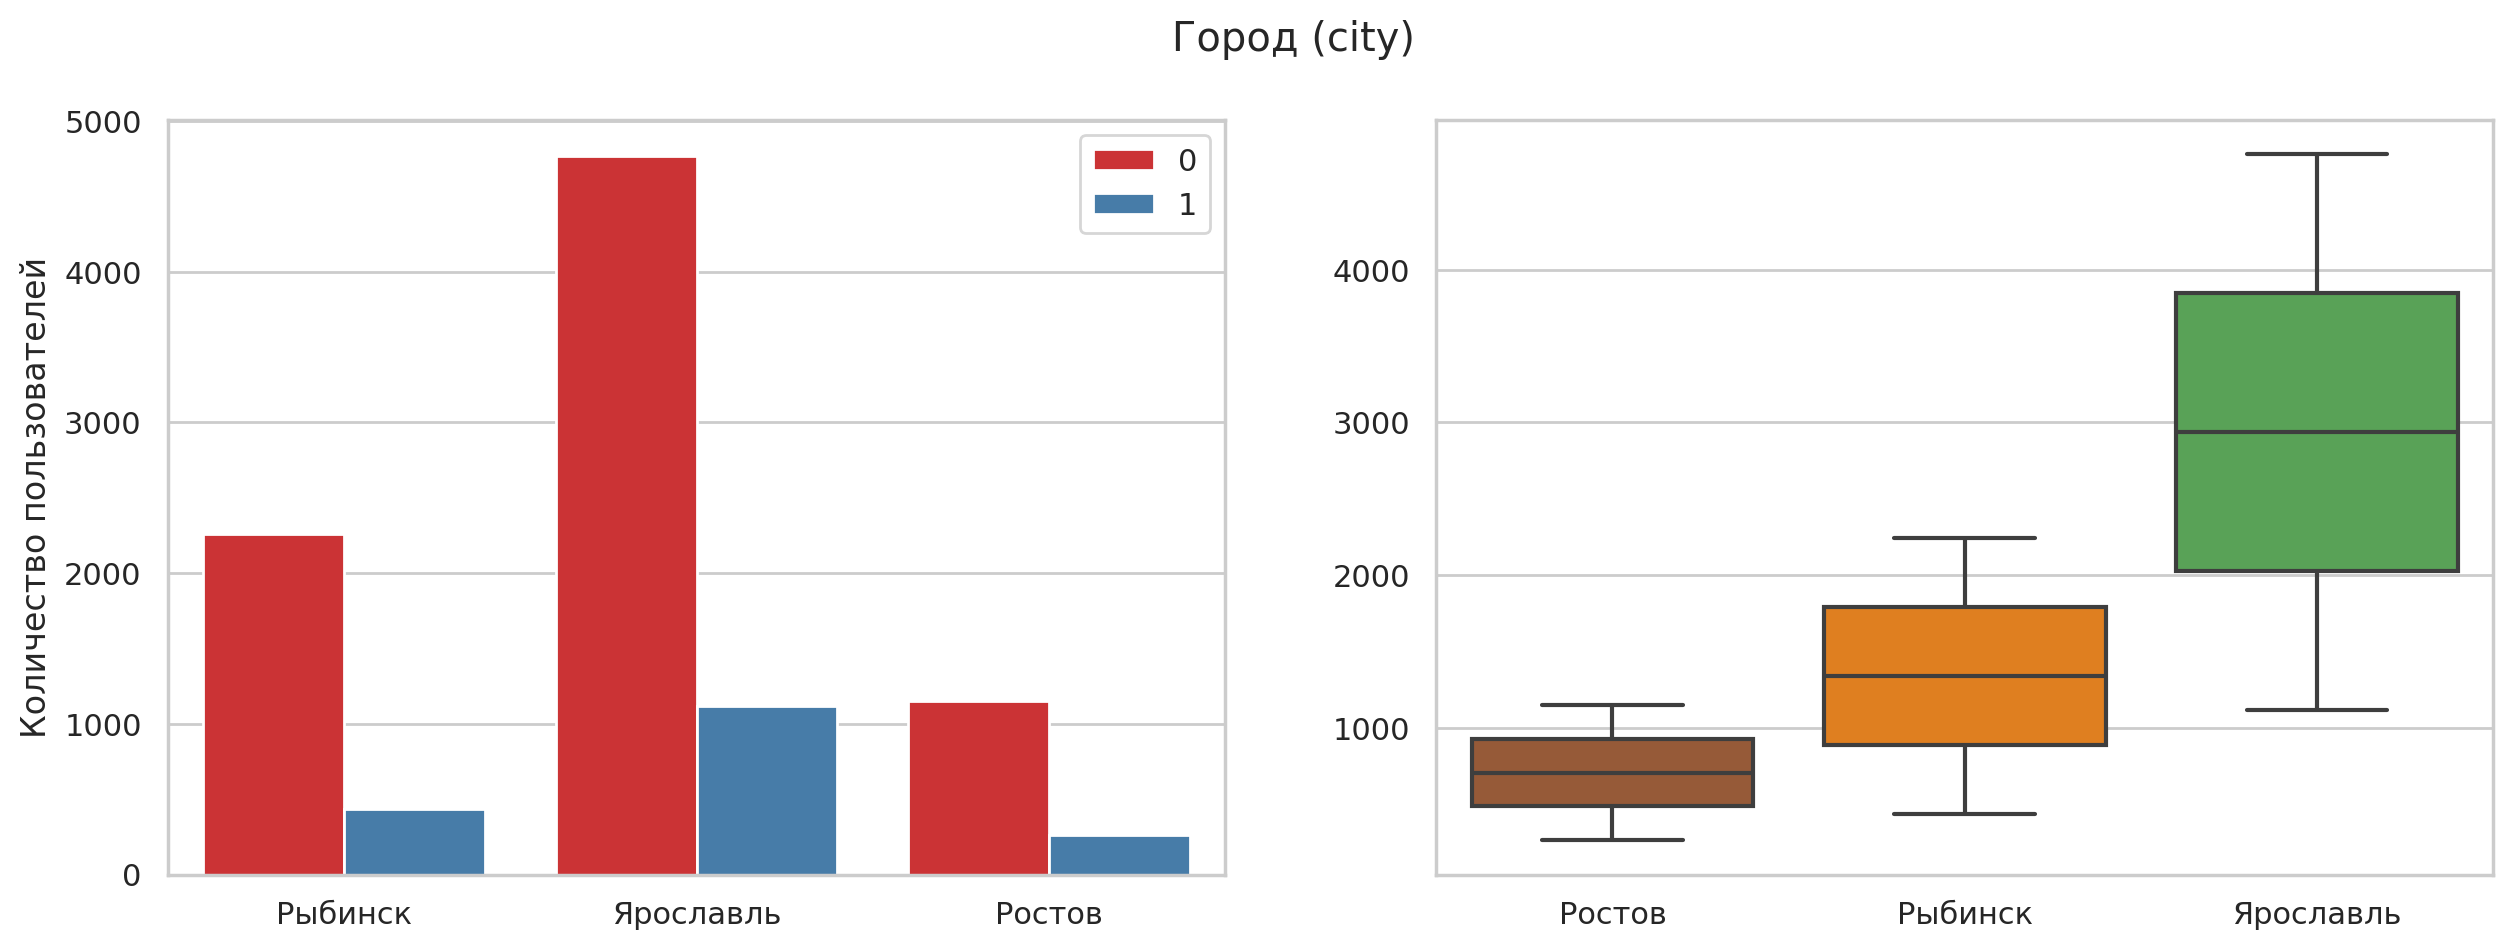

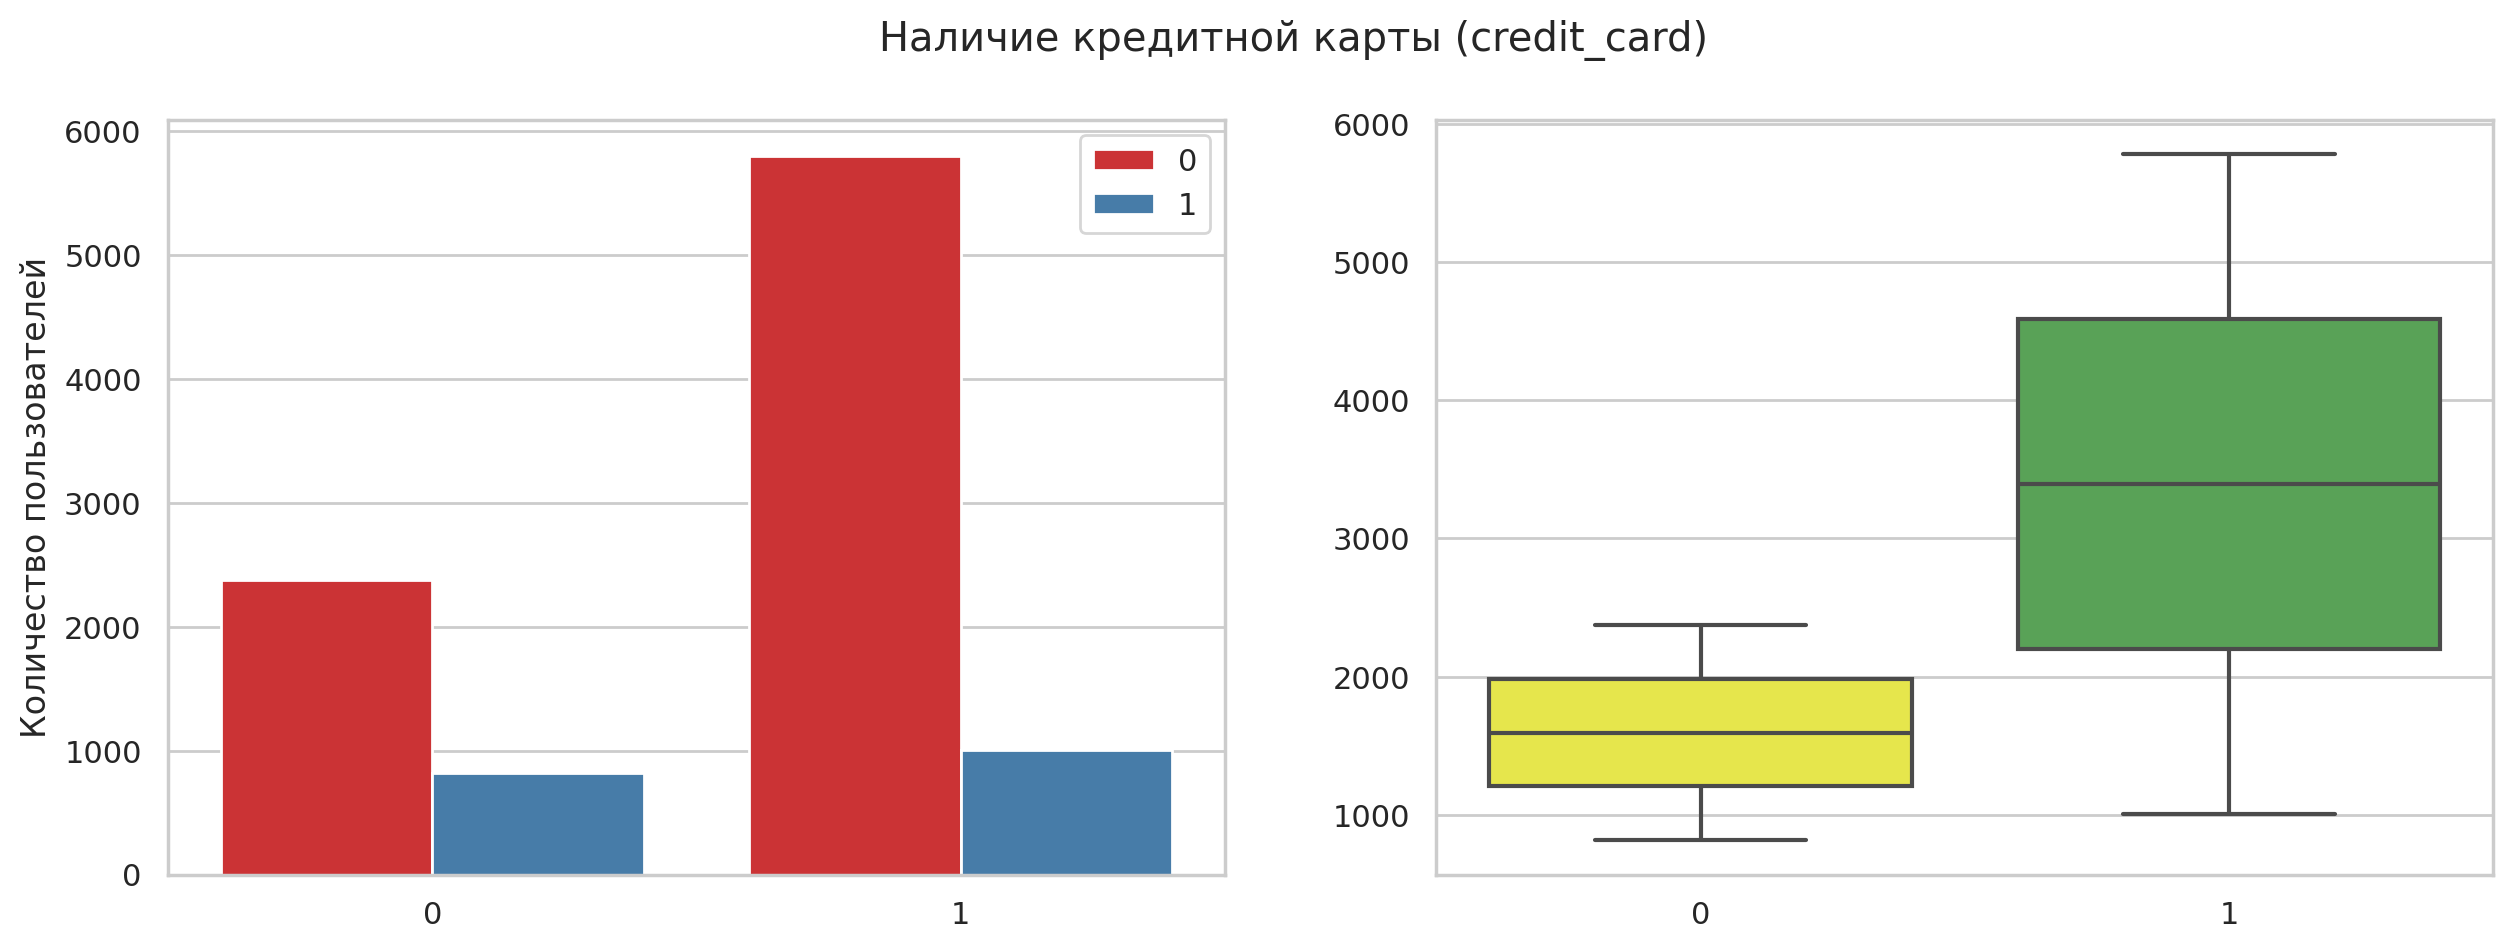

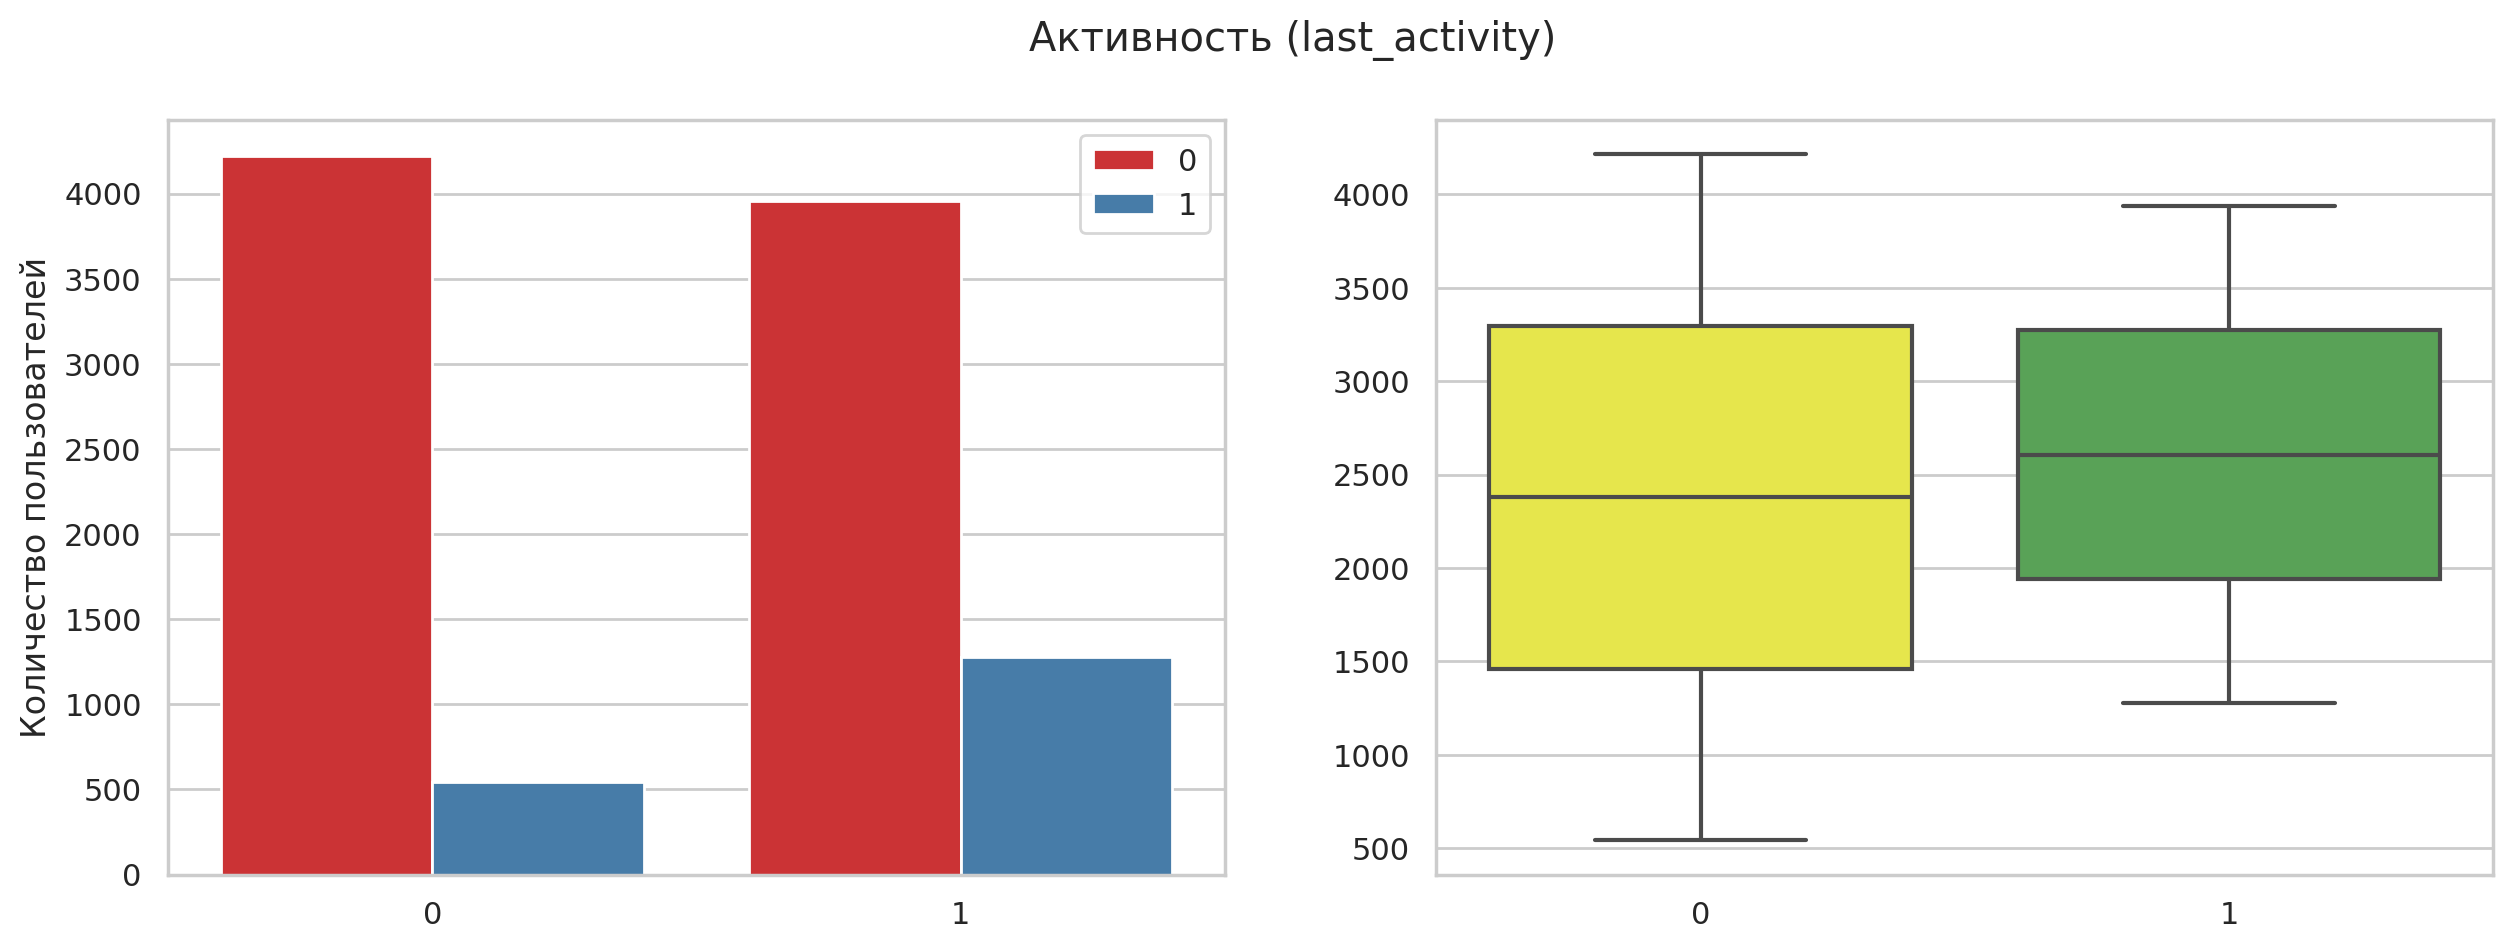

In [35]:
for index, row in categorical_colum.iterrows():
    categorical(data, row[0], row[1])

Из графиков мы видим, что, чаще всего уходят мужчины. Клиенты которые покидают банк находятся в возросте от 30 до 40 лет. Так же видно, что больше всего клиентов уходят в городе Ярославль. И больше всего клиентов уходящих в отток те, которые используют 2 продукта в банке.\
Таким образом, можно сделать вывод, что на отток влиют признаки:
 - пол;
 - возрост;
 - количество банковских продуктов ;
 - город.

__ПОСТРОИМ МАТРИЦУ КОРРЕЛЯЦИИ__

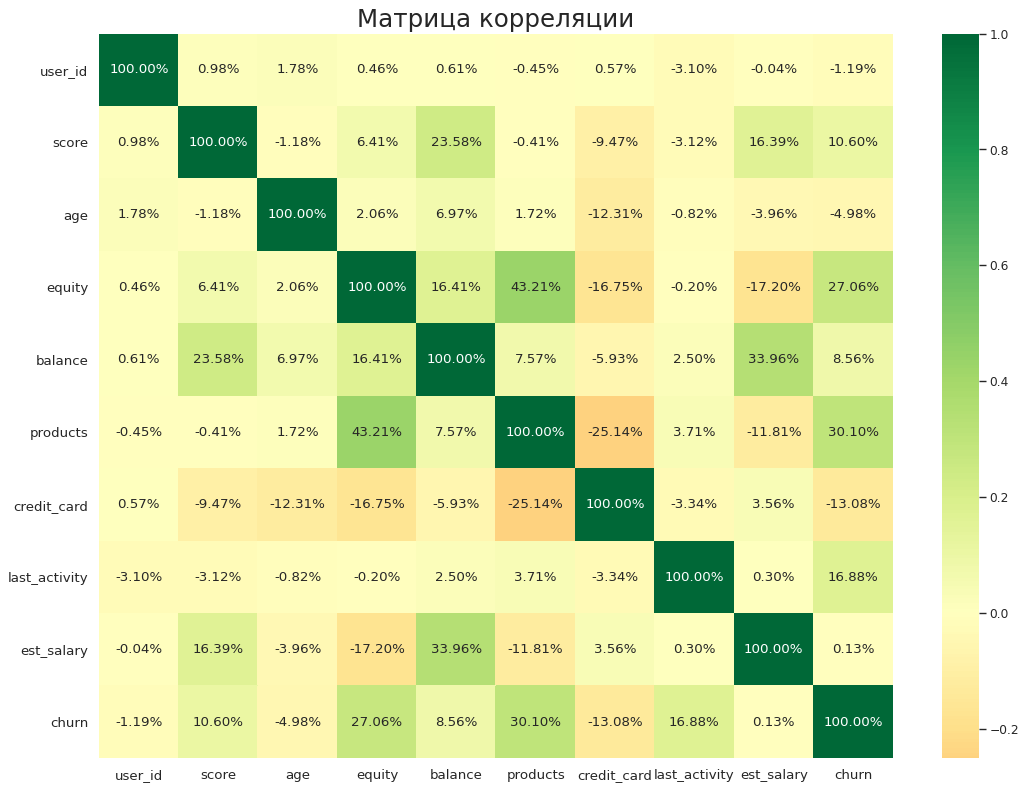

In [36]:
f, ax = plt.subplots(figsize=(16,12), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', fmt='.2%', center=0, annot=True)

plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(rotation=0)
plt.show()

По матрице корреляции можно сказать, что на отток влиют такие признаки: возрост (слабая корреляция), наличие кредитной карты (очень слабая корреляция), активность клиента (слабая коореляция), но присутствует высокая корреляция активности только в признаке оставшийся или ушедший клиент, это логично, если клиент остался на дальнейшее обслуживание в банке, то он будет активным.\
Из интересного, баланс счета очень сильно коррелирует с доходом клиента. И скорринговый бал коррелирует с балансом счета.\
Пар сильно коррелирующих между собой признаков не обнаружено.

__4. СЕГМЕНТАЦИЯ КЛИЕНТОВ__

Проанализируем распределение клиентов по количеству продуктов в банке.

products,0,1,2,3,4,5
user_id,"147,837.00","172,136.05","171,491.99","172,988.64","170,869.86","163,015.58"
score,962.00,854.30,844.56,837.31,878.27,859.26
age,79.00,42.20,42.77,45.71,39.78,36.47
equity,3.00,1.32,3.15,3.52,4.15,3.68
balance,NaN,"610,823.76","813,134.47","994,013.50","1,267,820.57","610,986.63"
credit_card,0.00,0.86,0.63,0.36,0.68,1.00
last_activity,0.00,0.53,0.52,0.42,0.79,0.89
est_salary,"25,063.00","180,730.54","130,394.85","128,654.45","148,788.46","116,651.58"
churn,1.00,0.07,0.19,0.29,0.63,0.42


,products,count
0,2,5126
1,1,3341
2,3,1039
3,4,474
4,5,19
5,0,1


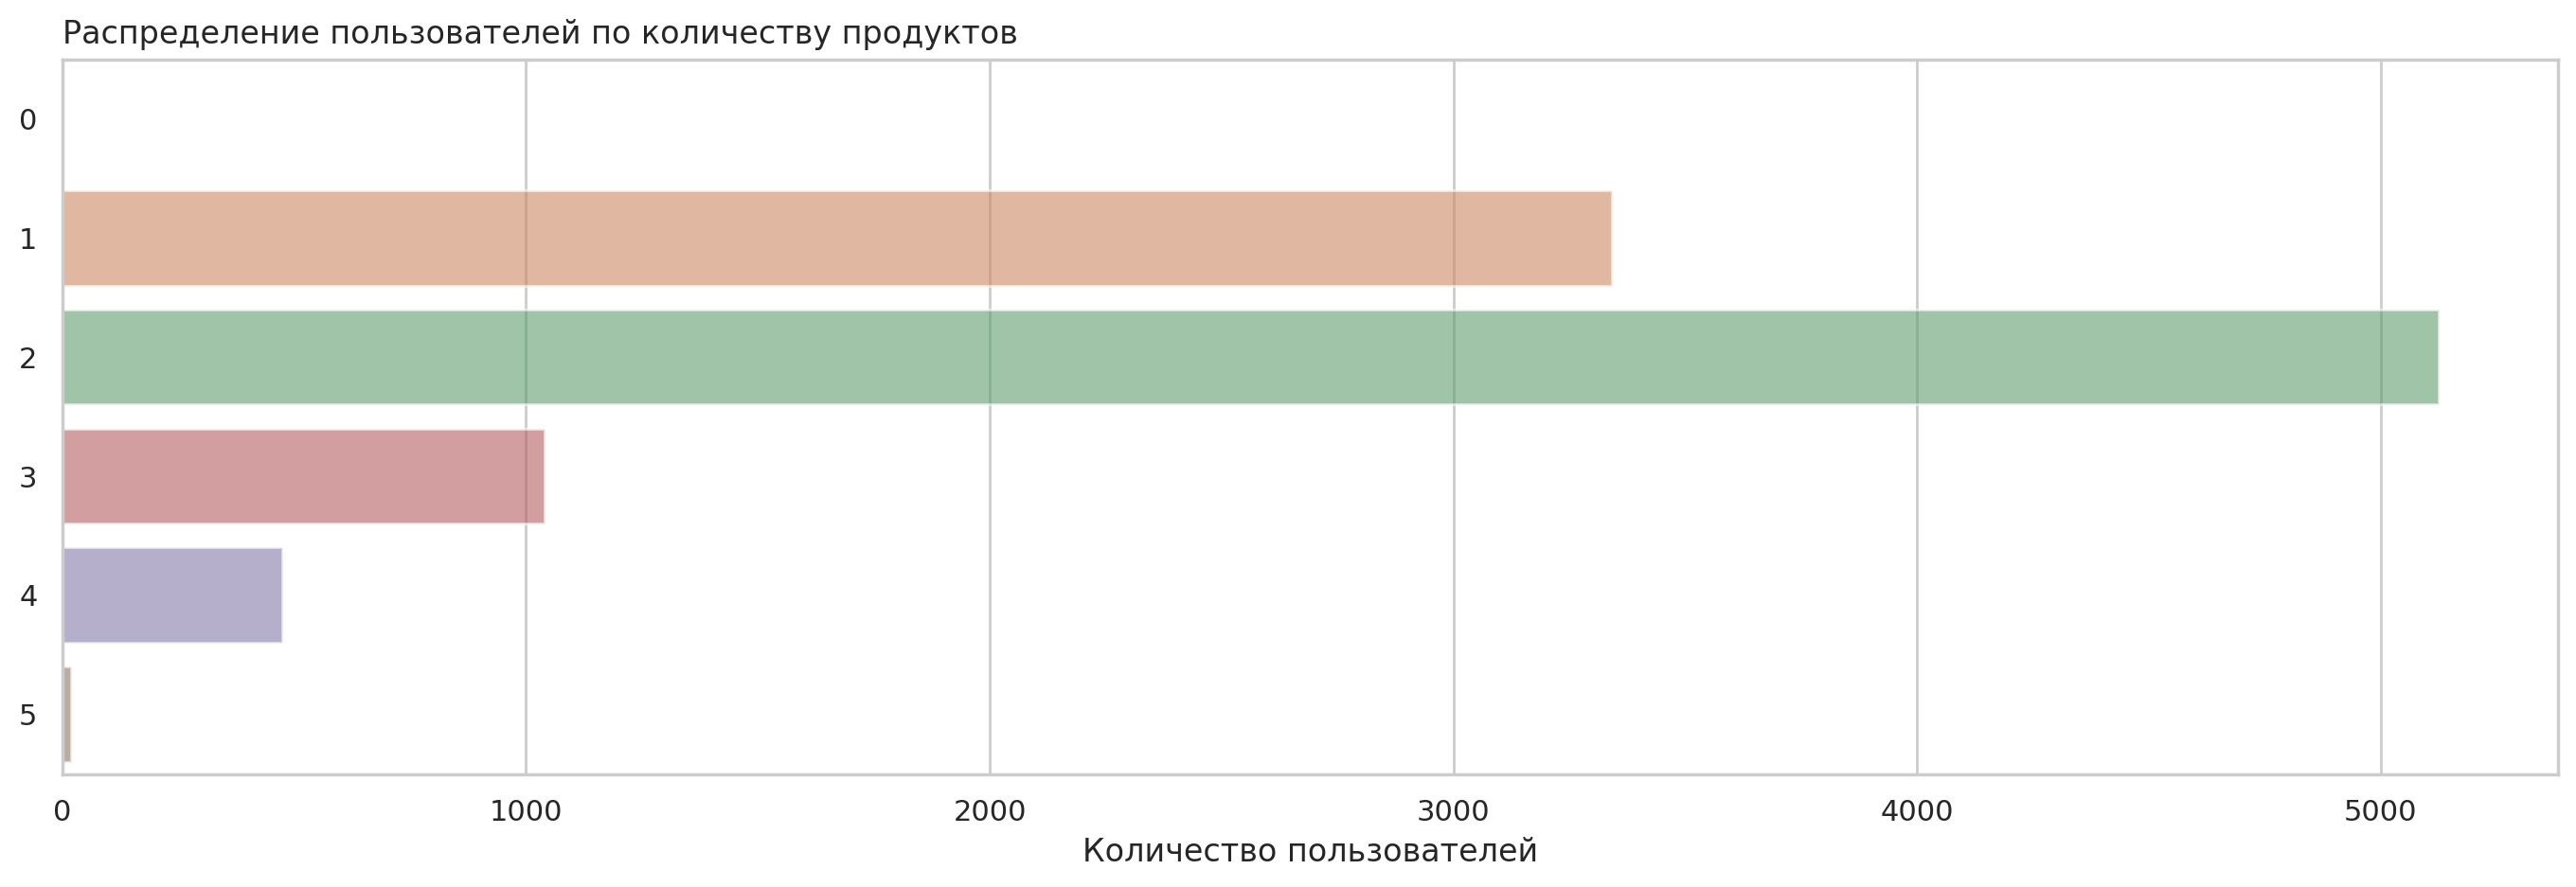

In [37]:
#выведим средние значения каждой колонки, в разбивке по количеству продуктов
display(data.groupby('products').agg('mean').T)

#посчитаем скольско всего клиентов в разбивке по количеству продуктов
data_products = data.groupby('products').agg(count=('user_id','count')).sort_values('count', ascending=False).reset_index()
display(data_products)

# визуализируем 
plt.figure(figsize=(17, 5))
ax = sns.barplot(x='count', y='products', data=data_products, alpha=0.6, orient='h')
ax.set_title('Распределение пользователей по количеству продуктов', loc='left')
ax.set_xlabel('Количество пользователей') 
ax.set_ylabel('')
plt.show()

Выводы в разбивке по количеству продуктов.\

__один продукт:__
 - у 3 340 клиентов;
 - отток составляет - 7%;
 - 53%  - активные пользователи;
 - у 86% - имеется кредитная карта;
 - средний возрост клиентов - 41-42 года;
 - заработная плата - имеет высокий доход, и в среднем он выше, в сравнении с клиентами имеющих больше продуктов.

__два продукта:__
 - у 5 108 клиентов;
 - отток состаляет 19%;
 - 52% - активные пользователи;
 - у 63% - имеются кредитные карты;
 - средний возрост клиентов 43 года;
 - заработная плата в среднем - выше среднего.

__три продукта:__
 - у 1 046 клиентов;
 - отток составляет - 28%;
 - 42% - активные пользователи - самая низкая активность в сравнении с клиентами имеющих иное количество продуктов банка;
 - у 35% имеется кредитная карта - самая низкая по количеству кредитных карт в сравнении с клиентами имеющих иное количество продуктов банка;
 - средний возрост - 45 - 46 лет - самая возростная группа;
 - заработная плата в среднем - выше среднего.

__четыре продукта:__
 - у 474 клиентов;
 - отток составляет - 63% - больше всего в сравнении с клиентами имеющих иное количество продуктов банка;
 - 79% - активные клиентов;
 - у 68% имеются кредитные карты;
 - средний возрост - 39-40лет;
 - заработная плата в среднем - выше среднего.

__пять продуктов:__
 - у 30 клиентов;
 - отток составляет - 30%;
 - 90% - активные клиенты - самая высокая активность в сравнении с клиентами имеющих иное количество продуктов банка;
 - у 63% имеются кредитные карты;
 - средний возрост - 36-37 лет;
 - заработная плата в среднем - выше среднего.

Построим гистрограммы клиентов по наличию продуктов по распределяющим признакам.

In [38]:
# создадим функцию для числовых признаков, для построения гистограмм и диаграмм размаха;

def numerical(data, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))
    
    sns.histplot(data[data['products']==1][col], label = '1 продукт', color = '#705898', ax = plt.subplot(1, 2, 1))
    sns.histplot(data[data['products']==2][col], label = '2 продукта', color = '#F85888', ax = plt.subplot(1, 2, 1), alpha=.4)
    sns.histplot(data[data['products']==3][col], label = '3 продукта', color = '#6890F0', ax = plt.subplot(1, 2, 1), alpha=.4)
    sns.histplot(data[data['products']==4][col], label = '4 продукта', color = '#98D8D8', ax = plt.subplot(1, 2, 1), alpha=.4)
    sns.histplot(data[data['products']==5][col], label = '5 продуктов', color = '#78C850', ax = plt.subplot(1, 2, 1), alpha=.4)
    plt.xlabel('')
    plt.ylabel('Количество пользователей')
    plt.legend()
    
    sns.boxplot(y = col, x = 'products', data = data, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(np.arange(5), ('1 продукт', '2 продукта','3 продукта', '4 продукта', '5 продуктов'))
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [39]:
# создадим функцию для категориальных признаков, для построения гистограмм и диаграмм размаха;

def categorical(data, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))

    sns.countplot(x = col, hue = 'products', data = data, ax = plt.subplot(1, 2, 1),  palette='Pastel2')
    plt.ylabel('Количество пользователей')
    plt.xlabel('')
    plt.legend() 
    
    gr = data.groupby([col, 'products']).agg(count=('user_id', 'count')).reset_index()
    sns.boxplot(x = col, y = 'count', data = gr, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    
    plt.xlabel('')
    plt.ylabel('')
    
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [40]:
# создадим названия графиков и диаграмм размаха для числовых и категориальных признаков:

numerical_colum = pd.DataFrame({'col' : ['score', 'age', 'equity', 'balance', 'products', 'est_salary'], 
                        'title' : ['Баллы скорринга', 'Возраст', 
                                   'Количество объектов недвижимости в собственности', 
                                   'Баланс', 'Количество продуктов банка', 
                                   'Заработная плата клиента']
                       })

categorical_colum = pd.DataFrame({'col' : ['city', 'gender', 'credit_card', 'last_activity', 'churn'],
                            'title' : ['Город', 'Пол', 'Наличие кредитной карты', 'Активность', 'Отток']
                            })

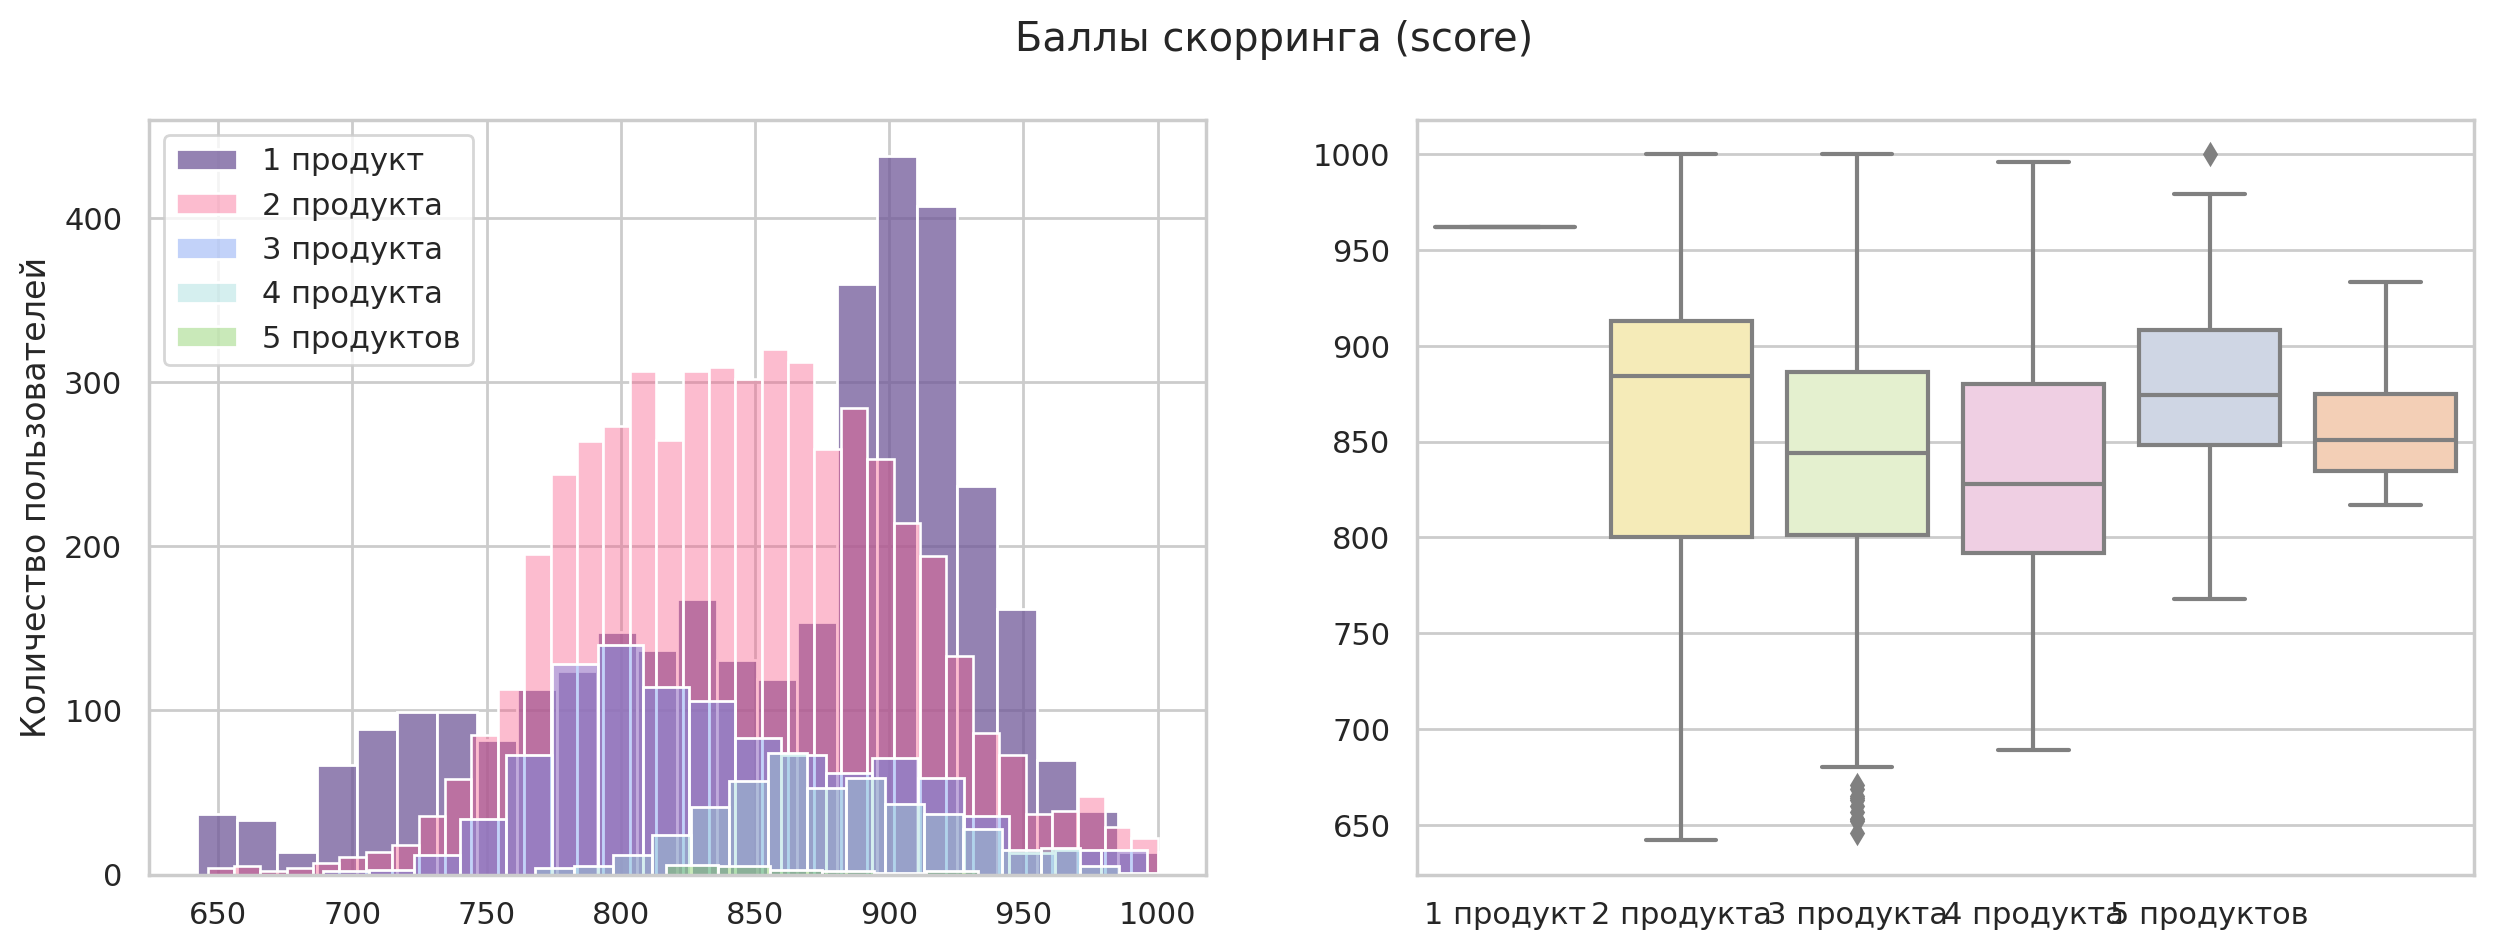

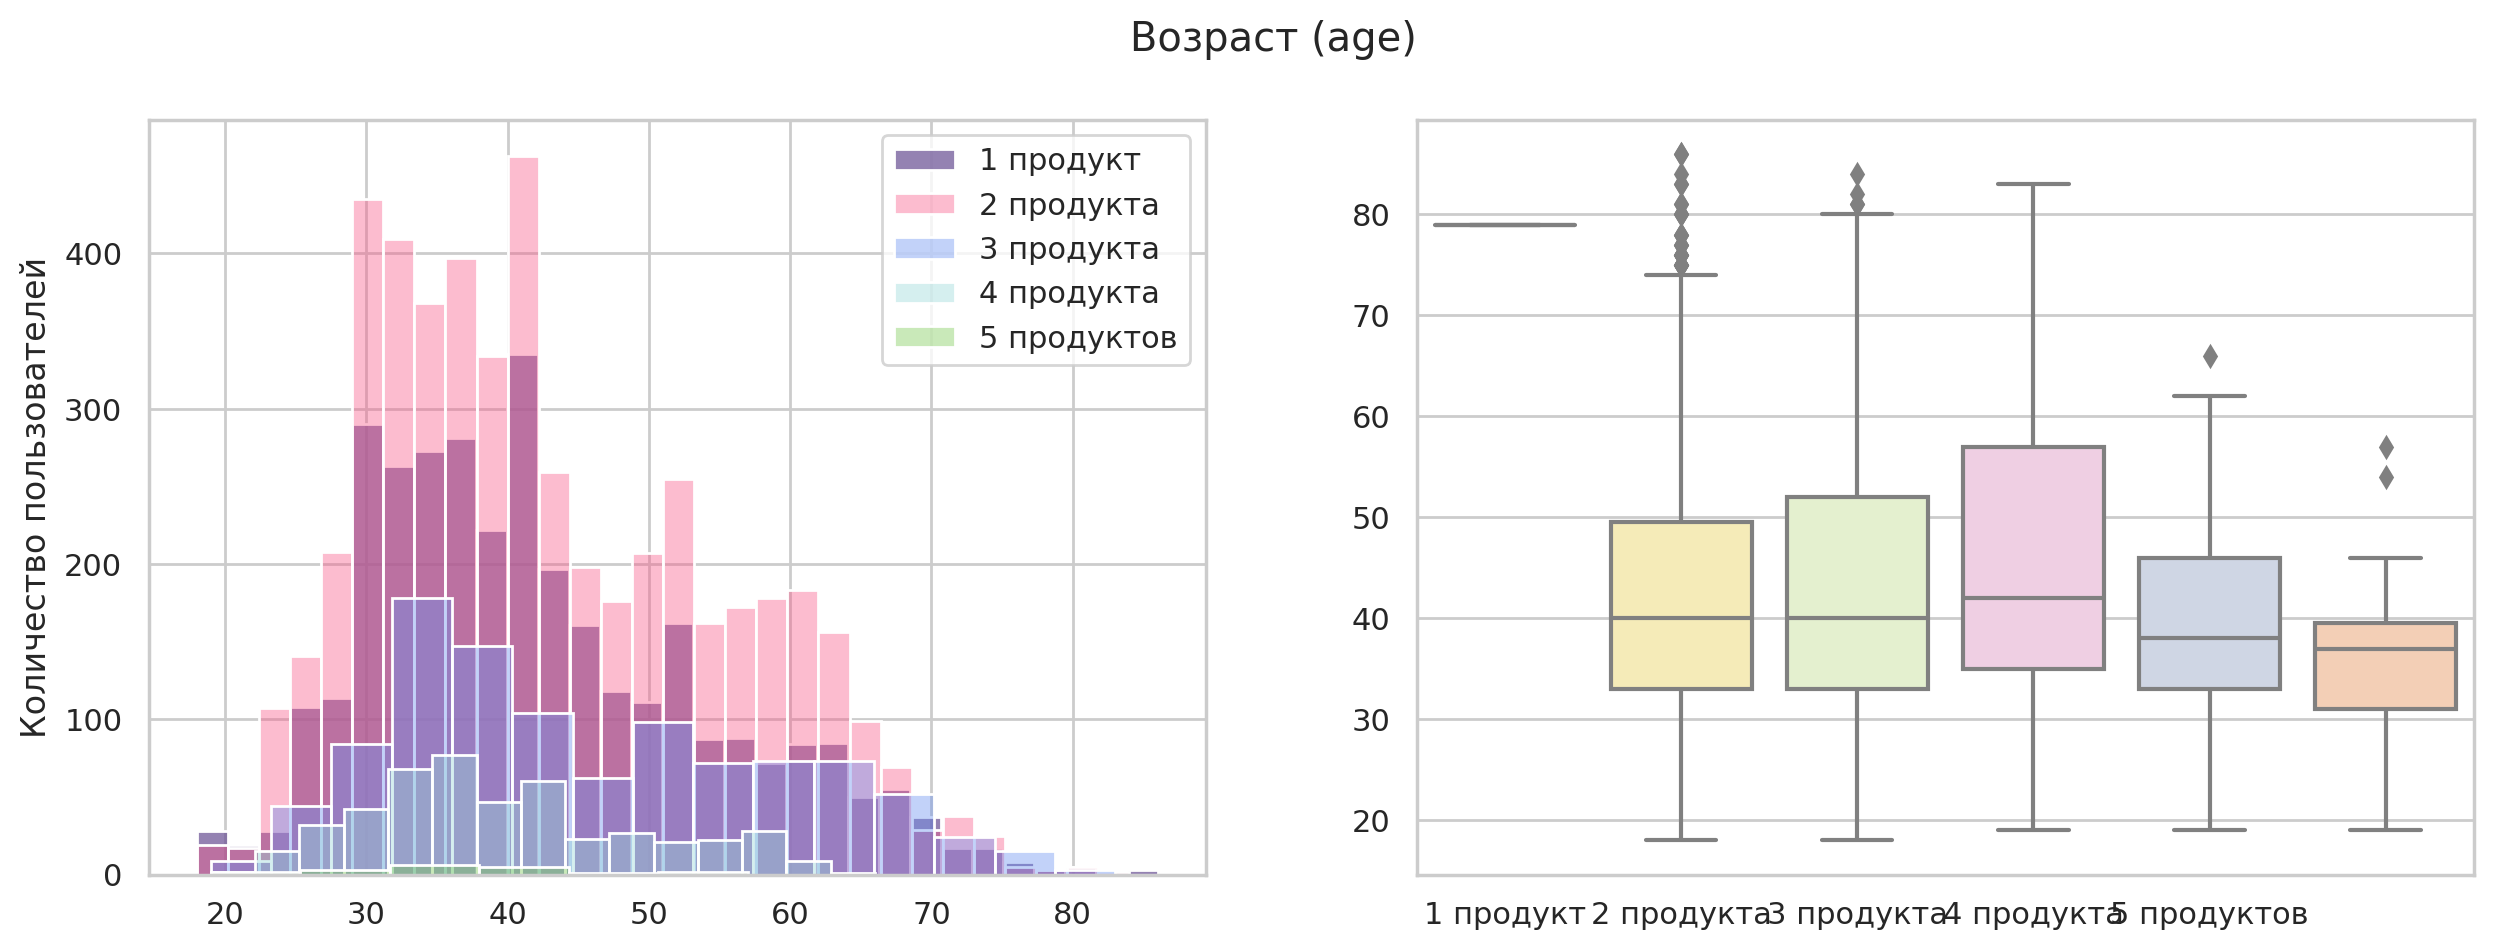

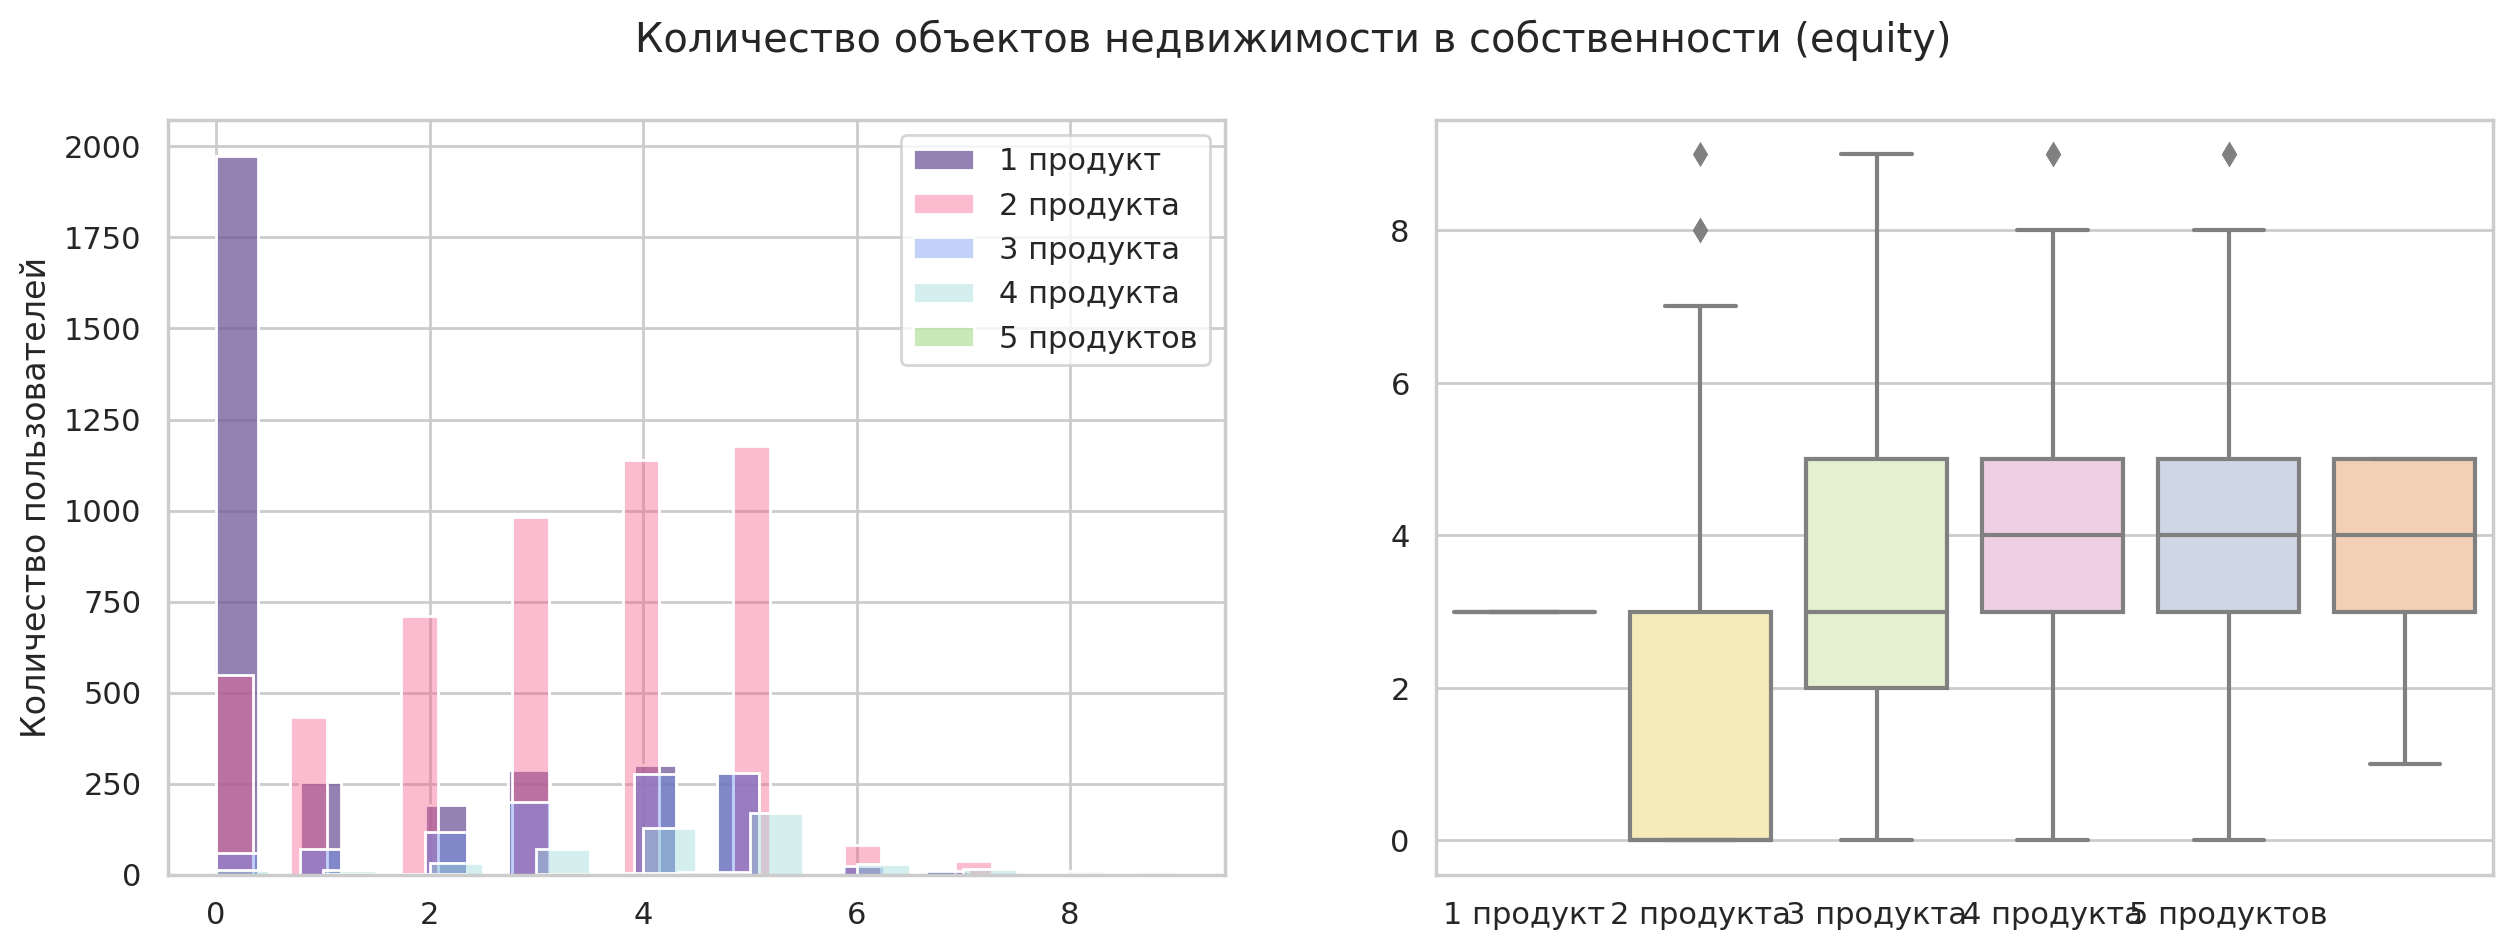

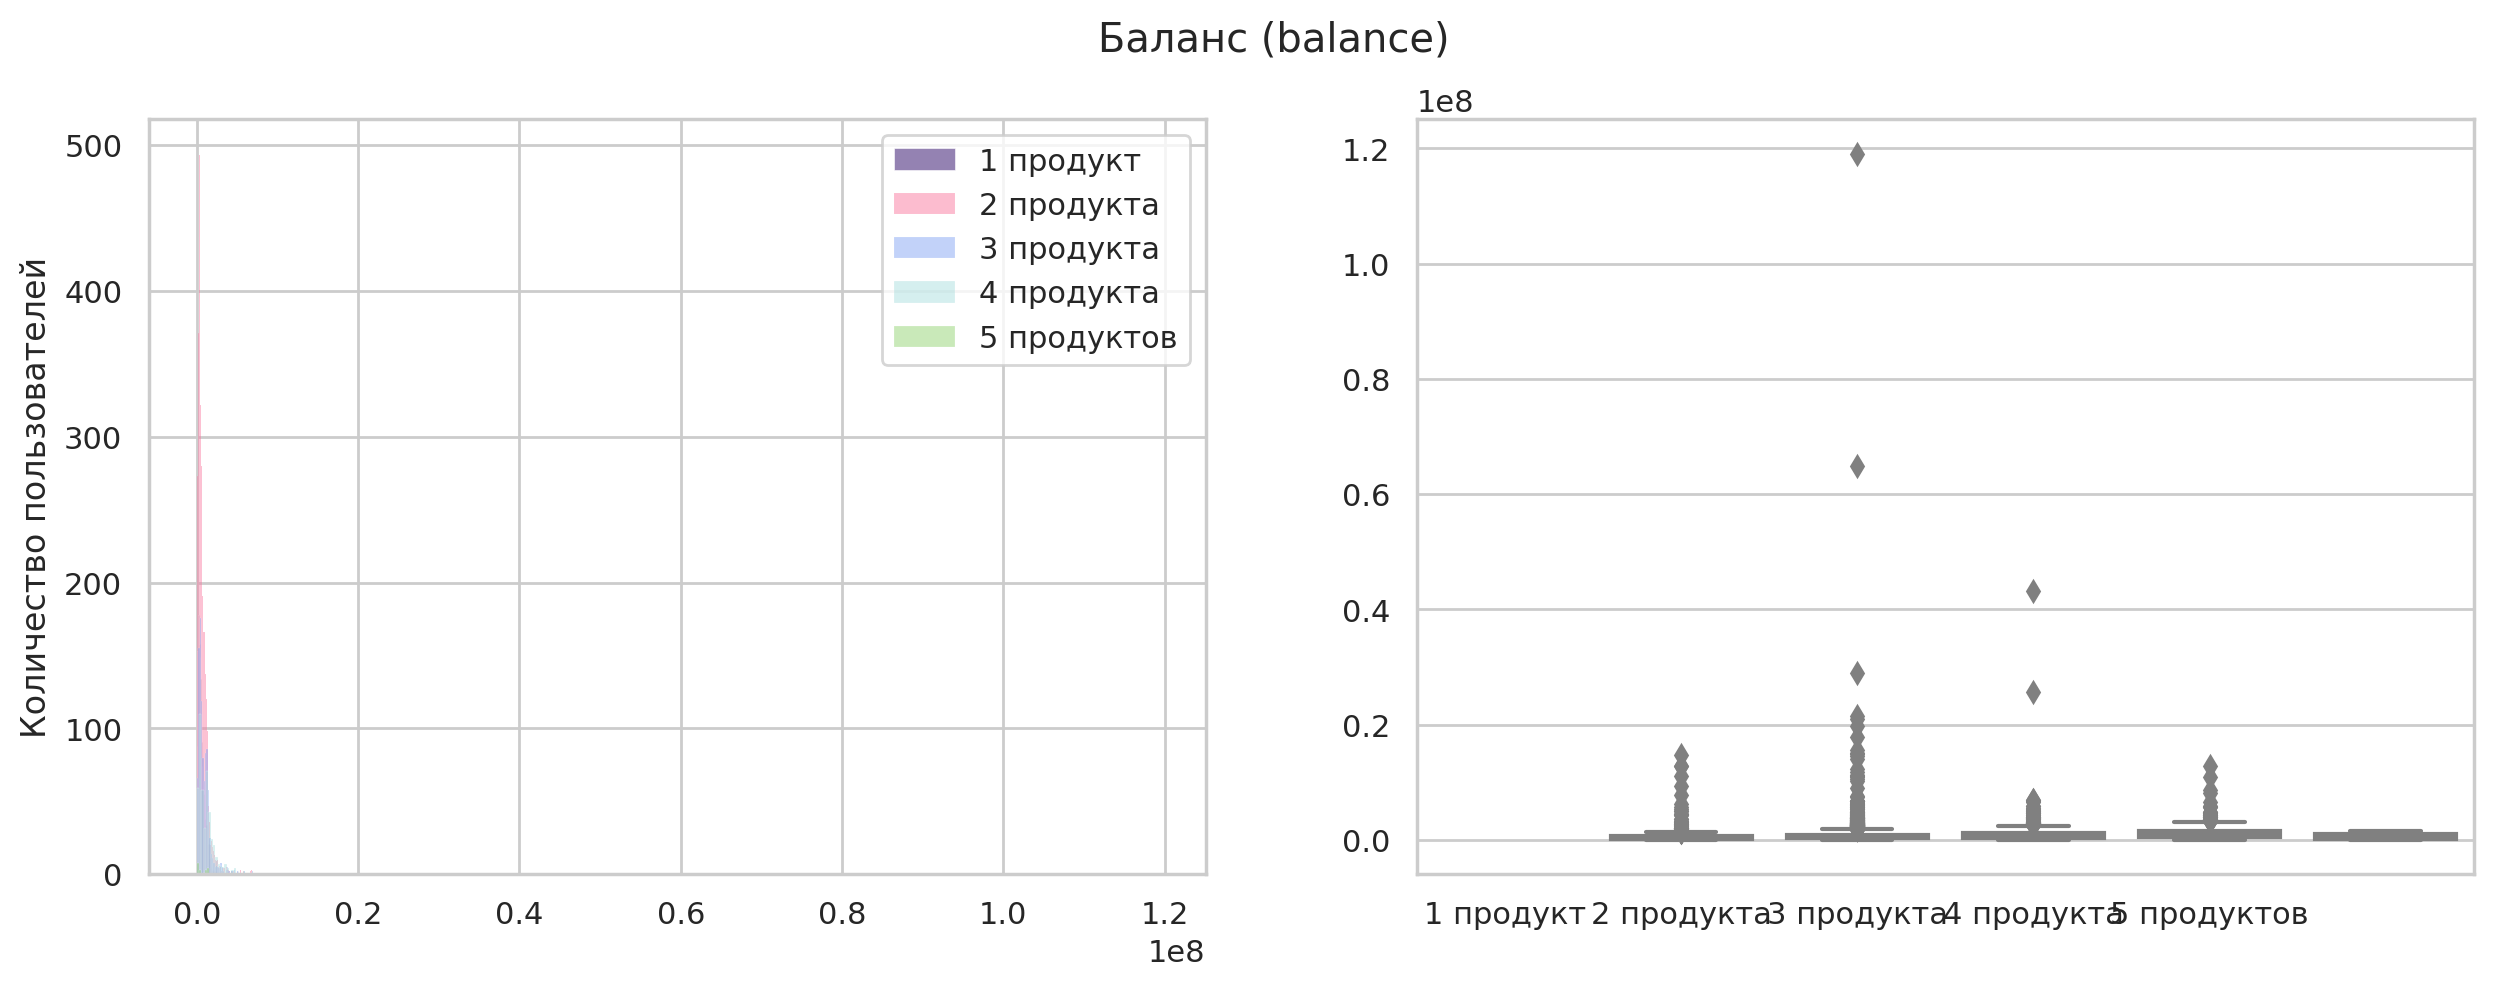

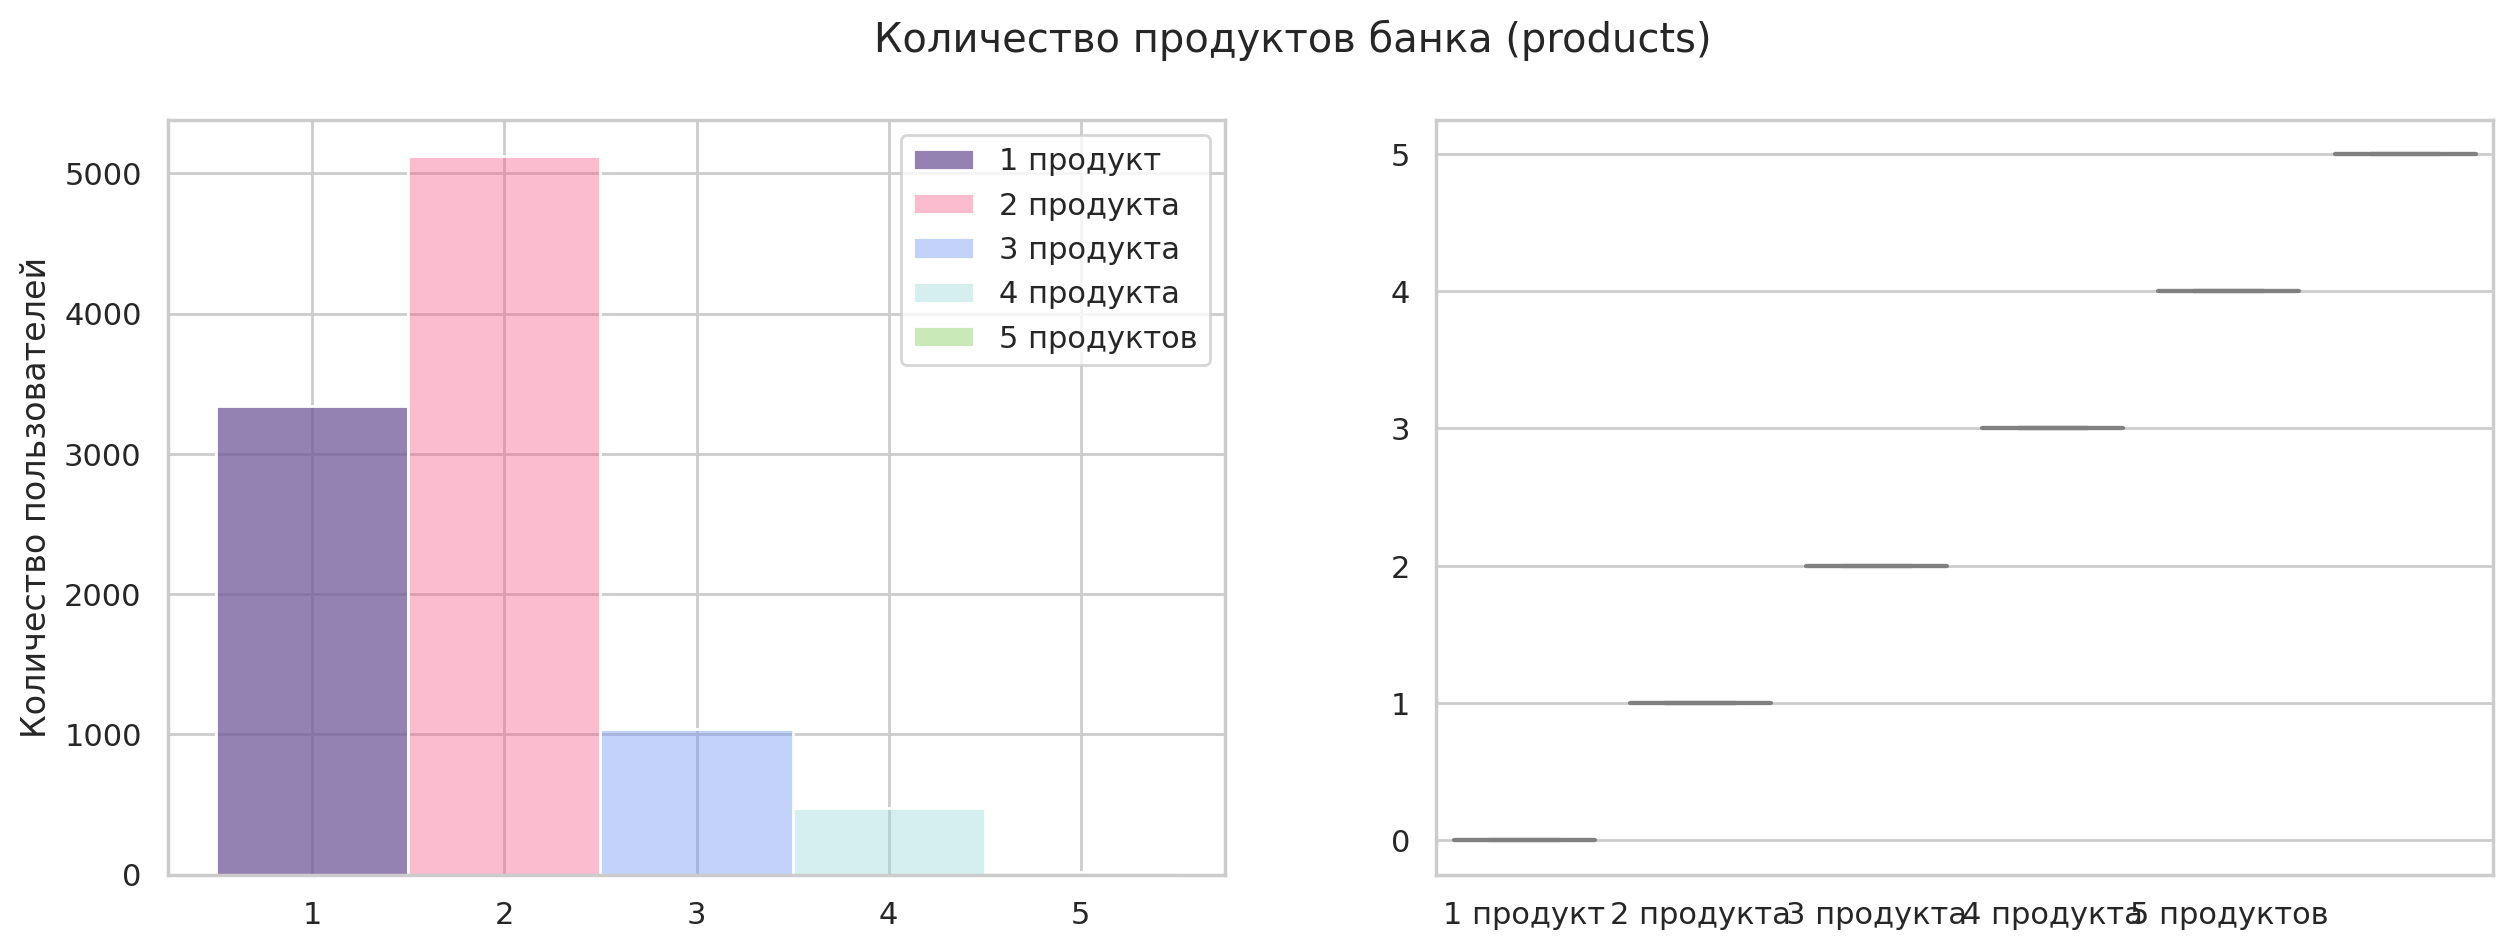

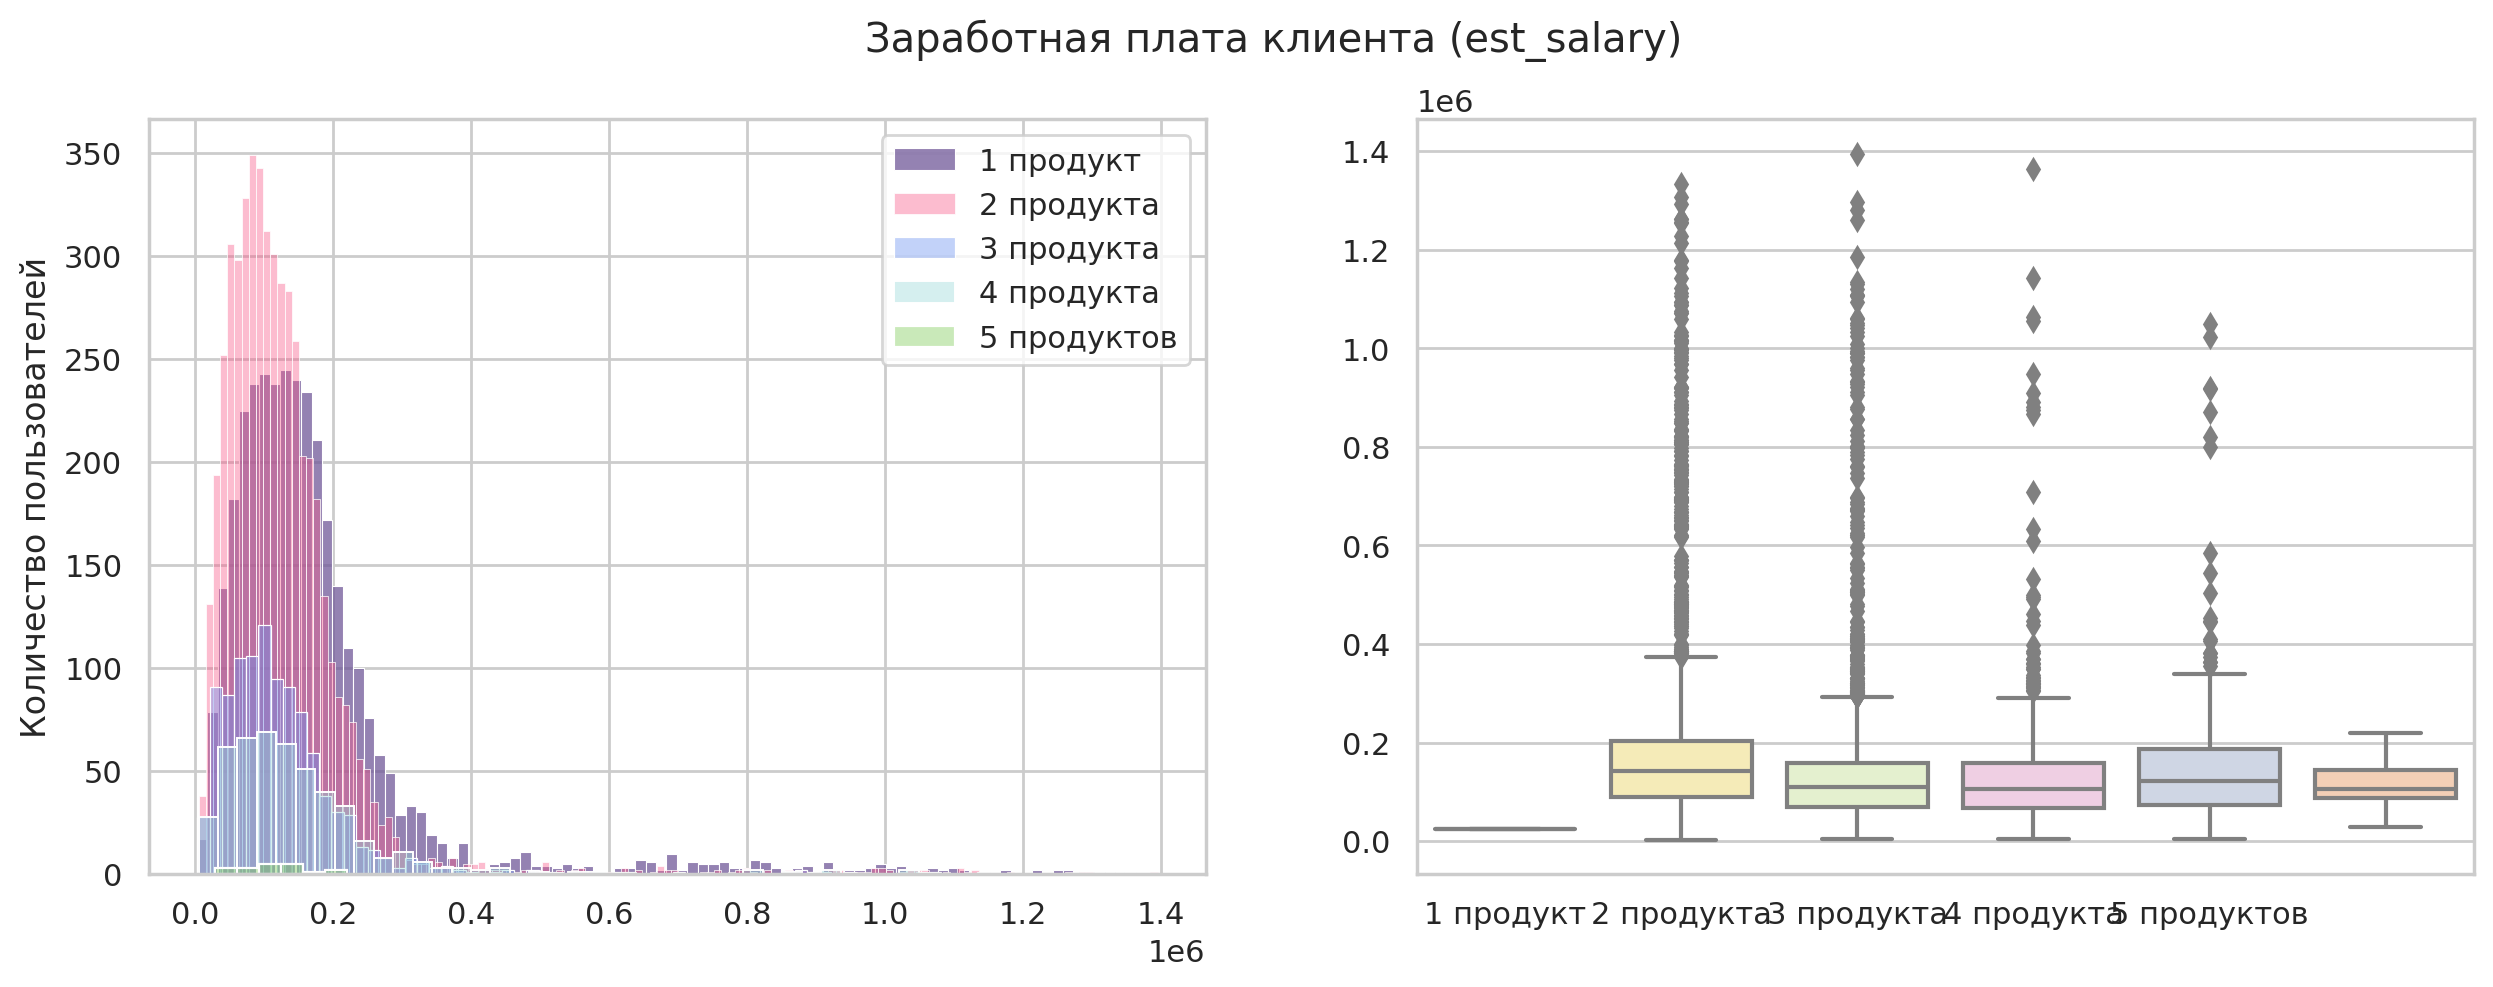

In [41]:
for index, row in numerical_colum.iterrows():
    numerical(data, row[0], row[1])

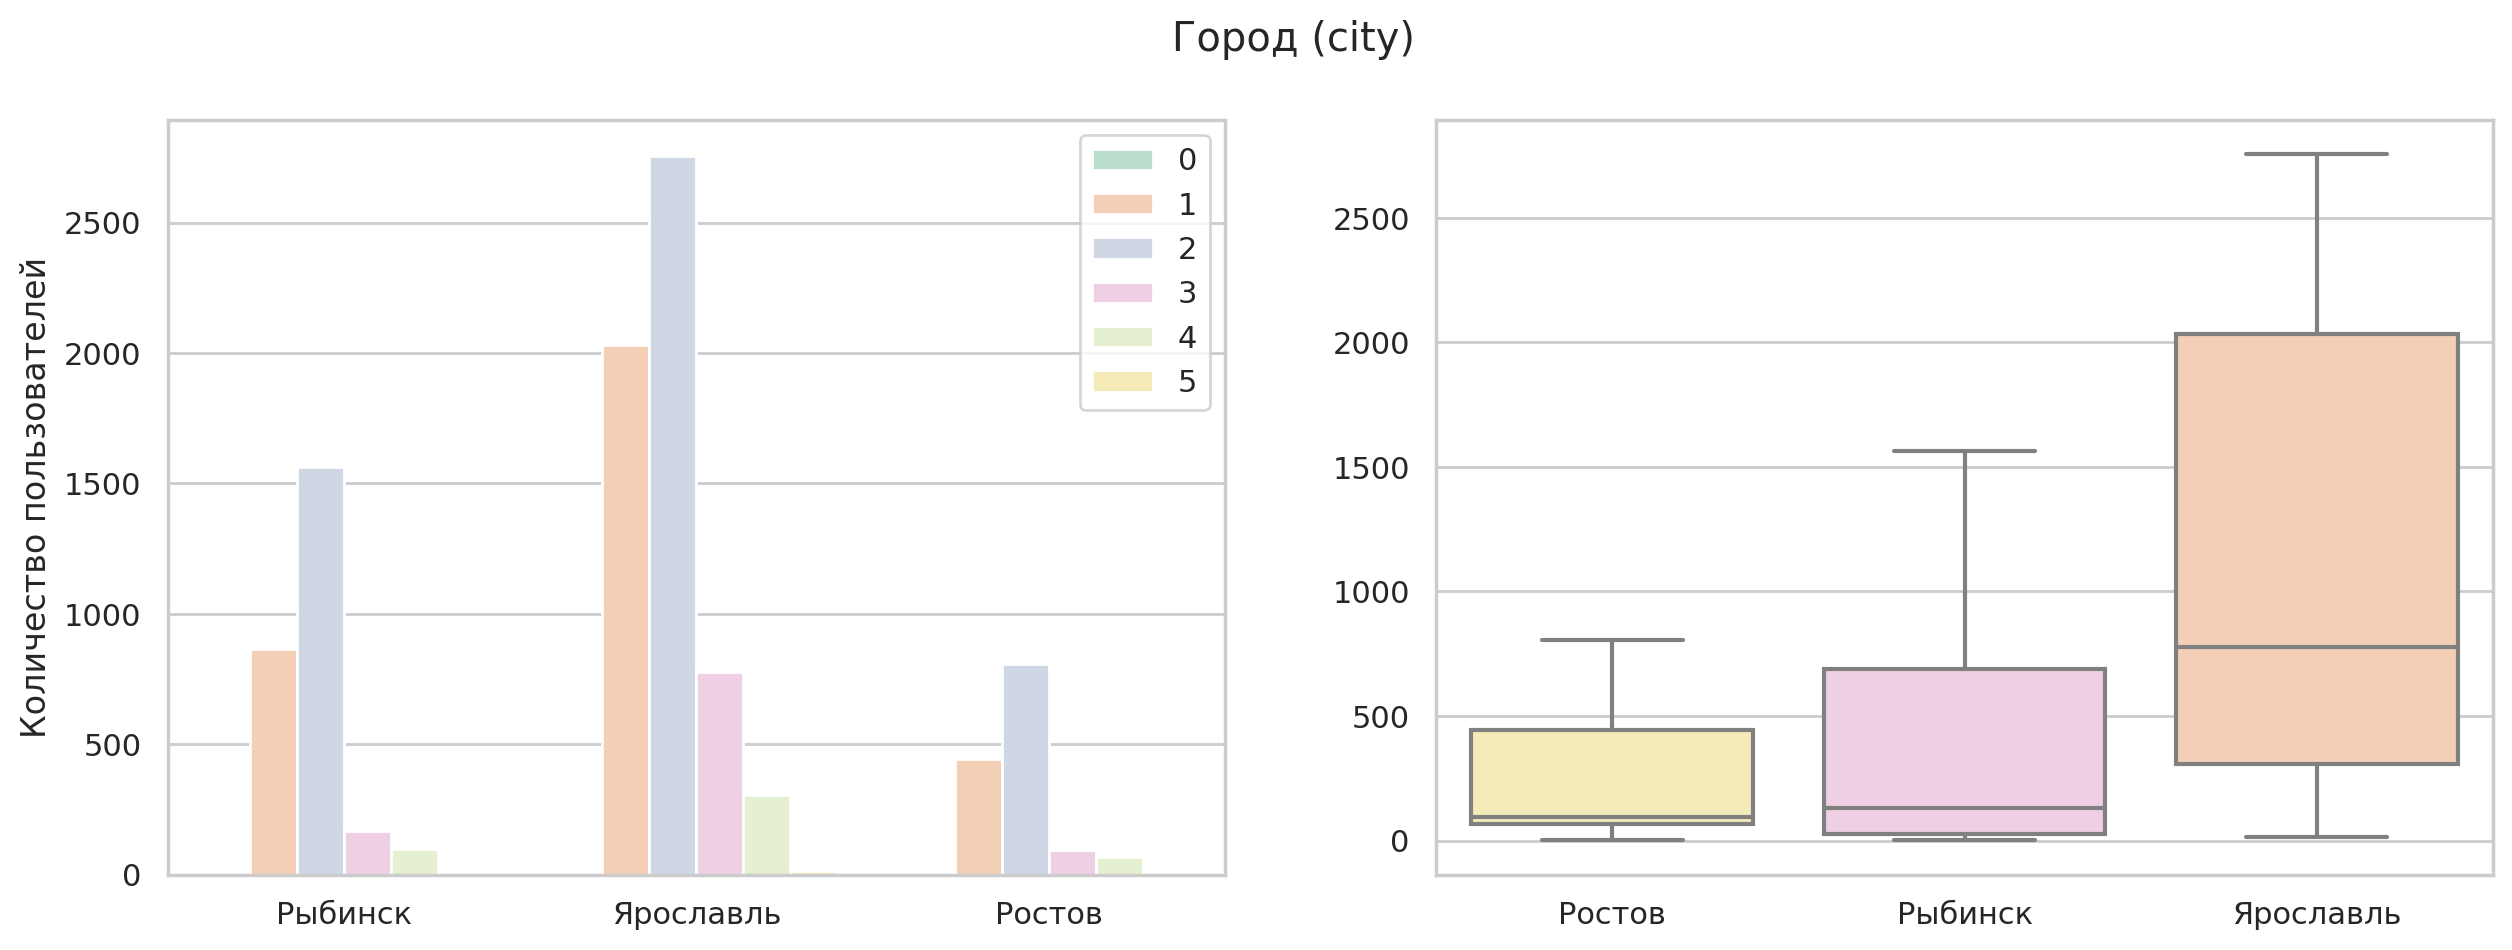

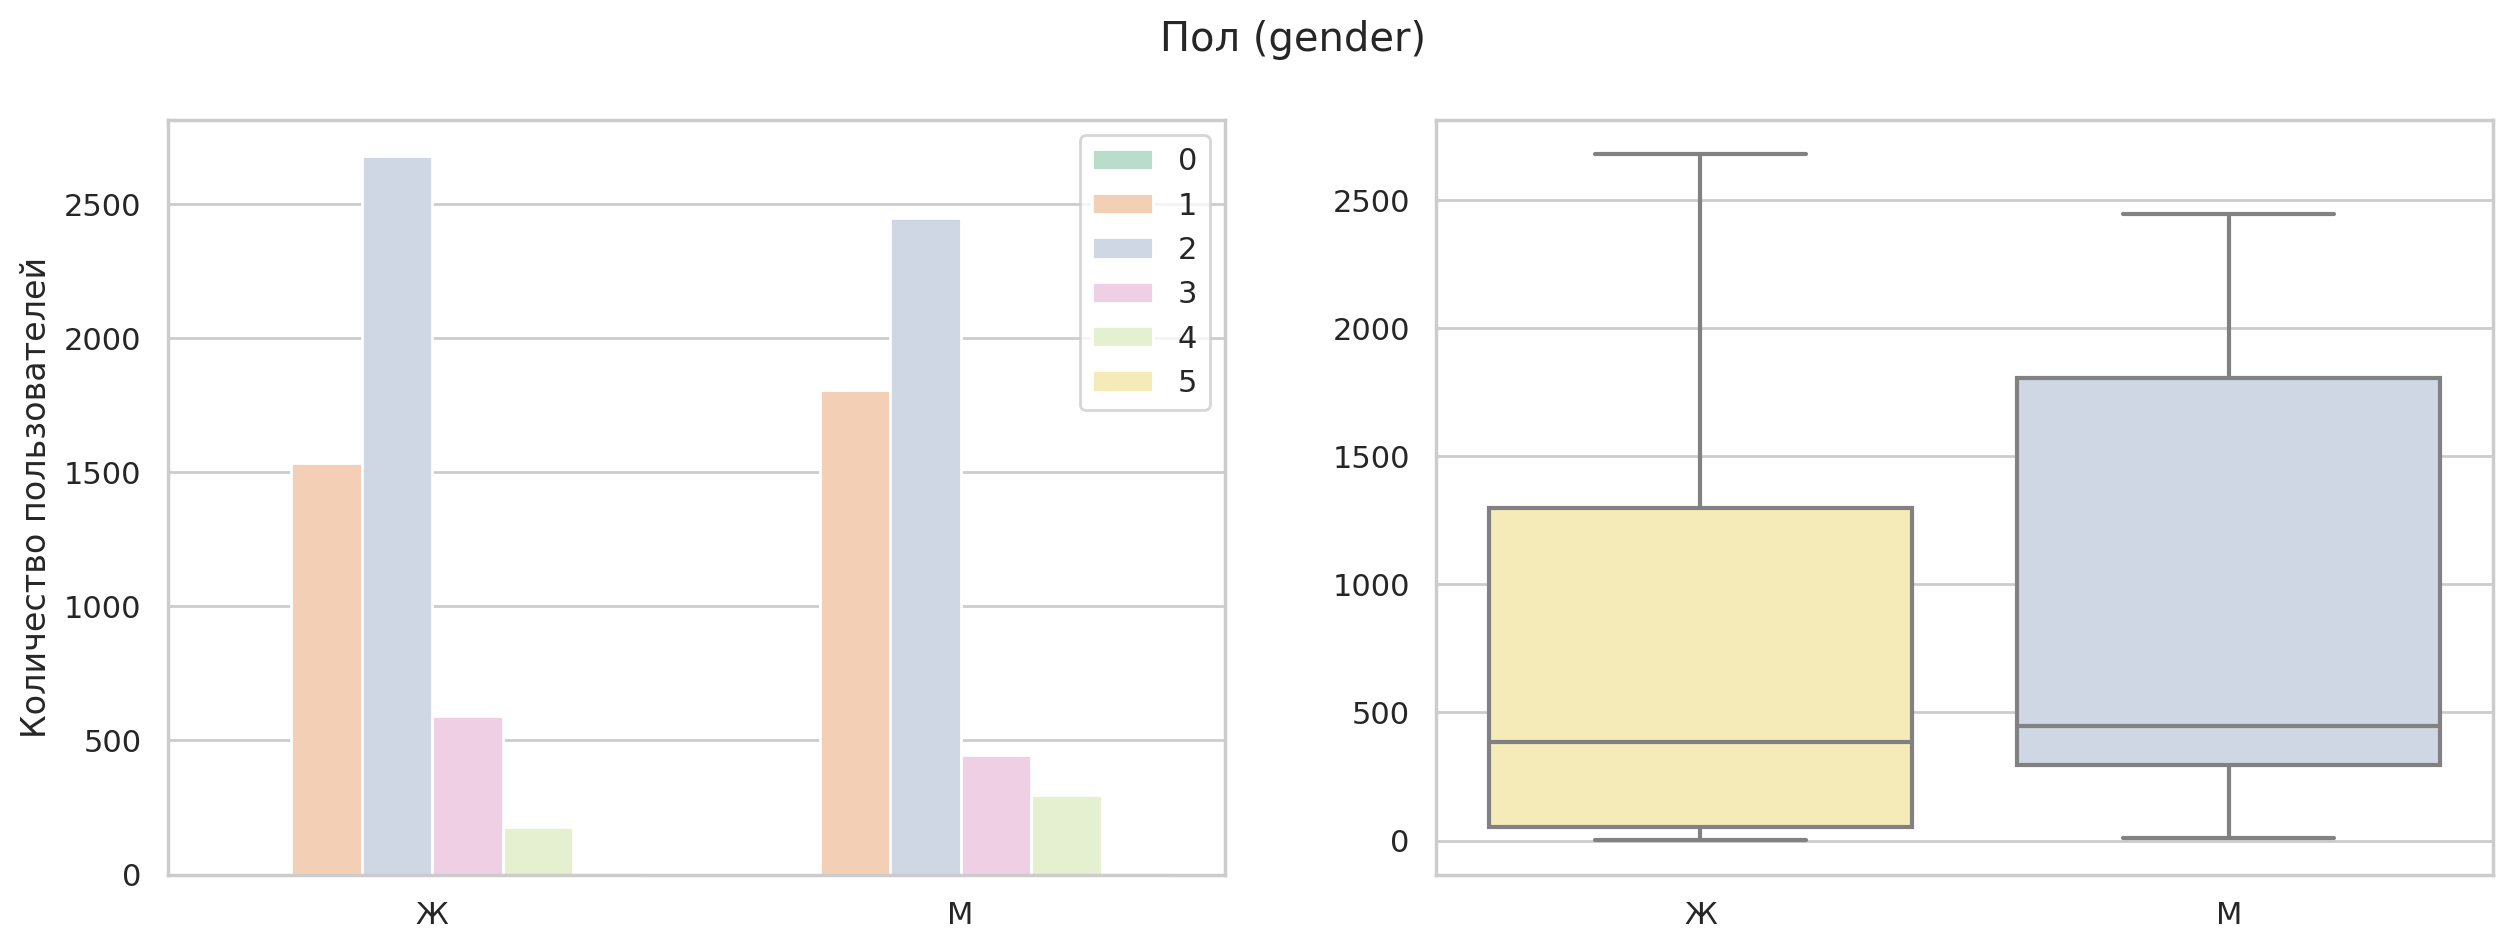

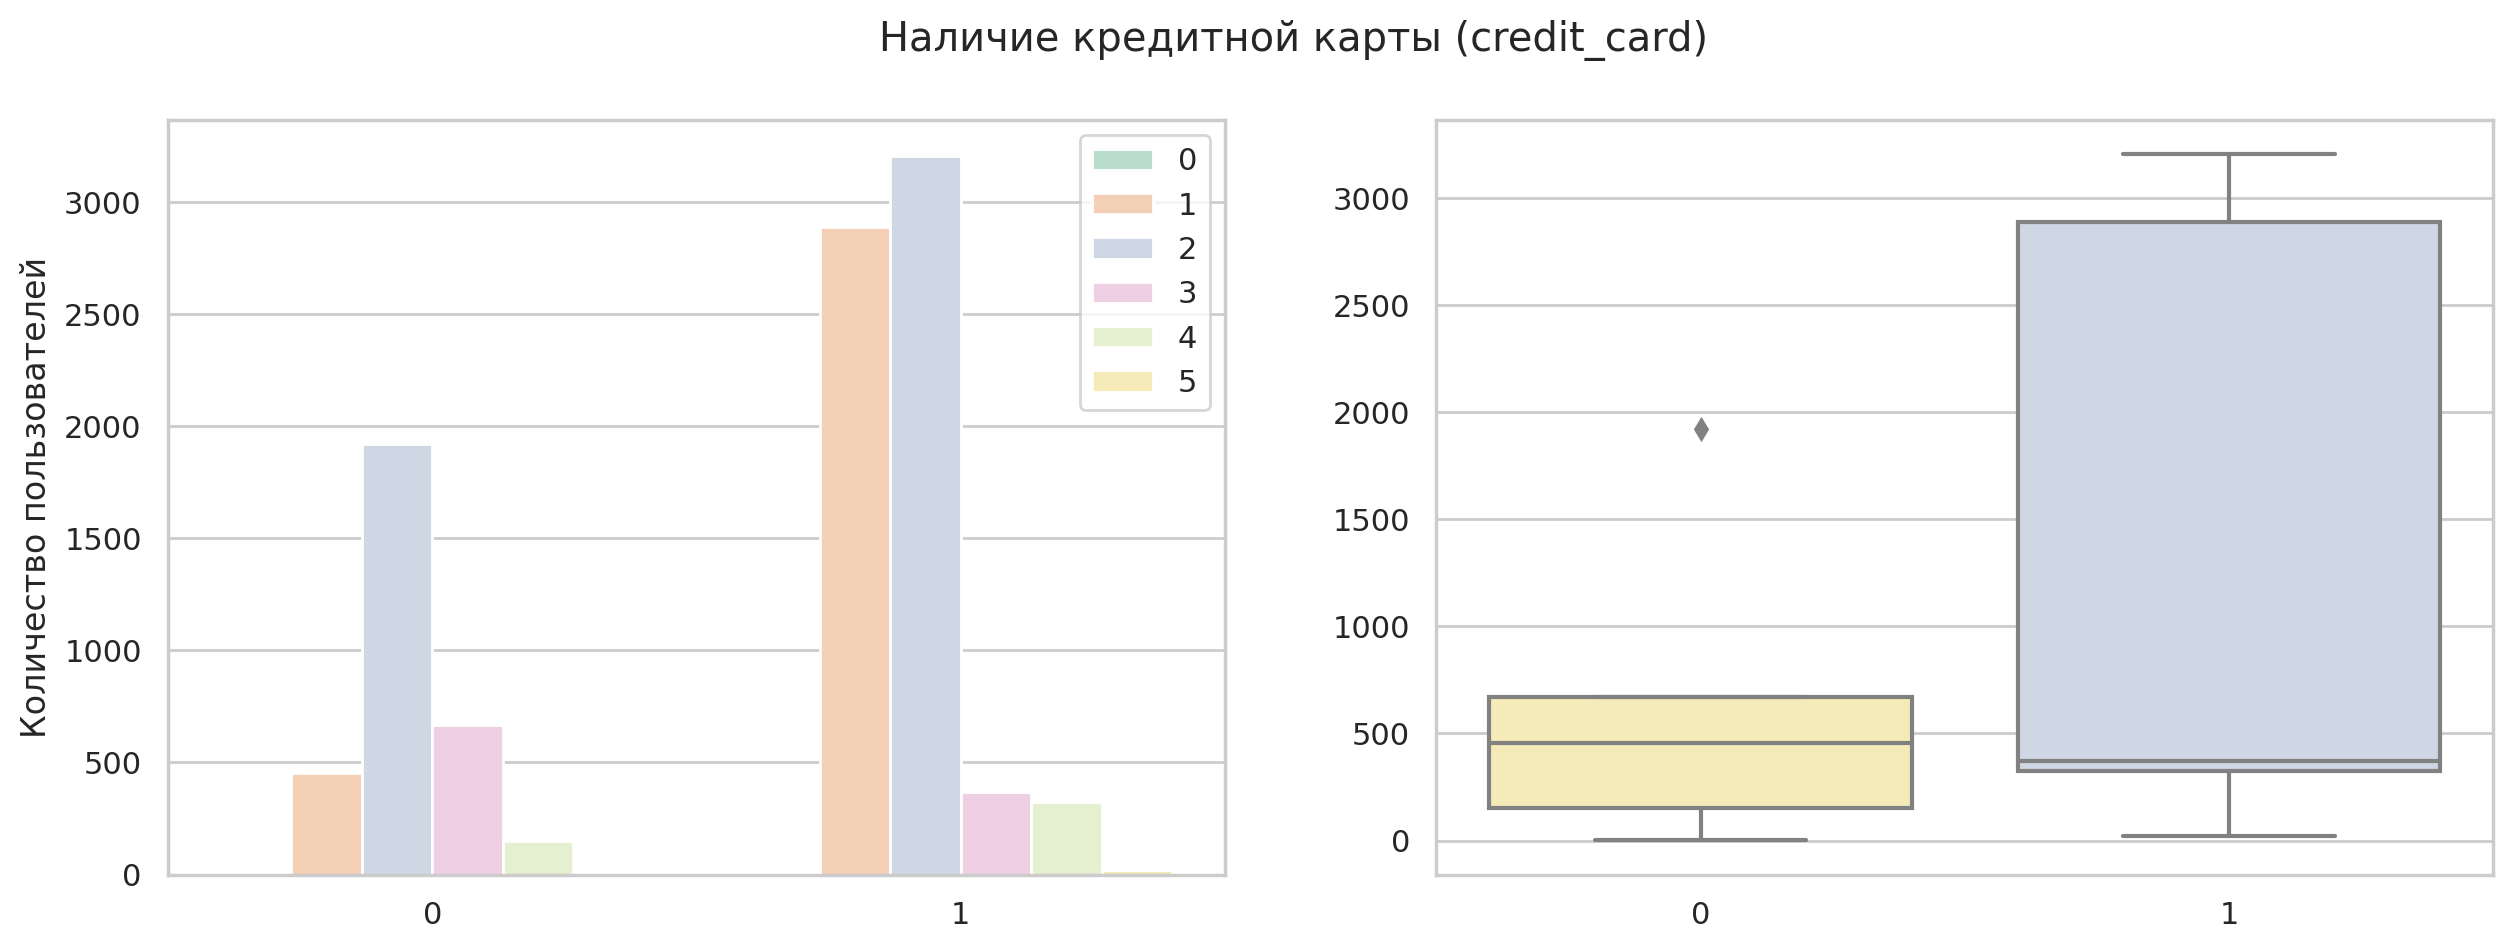

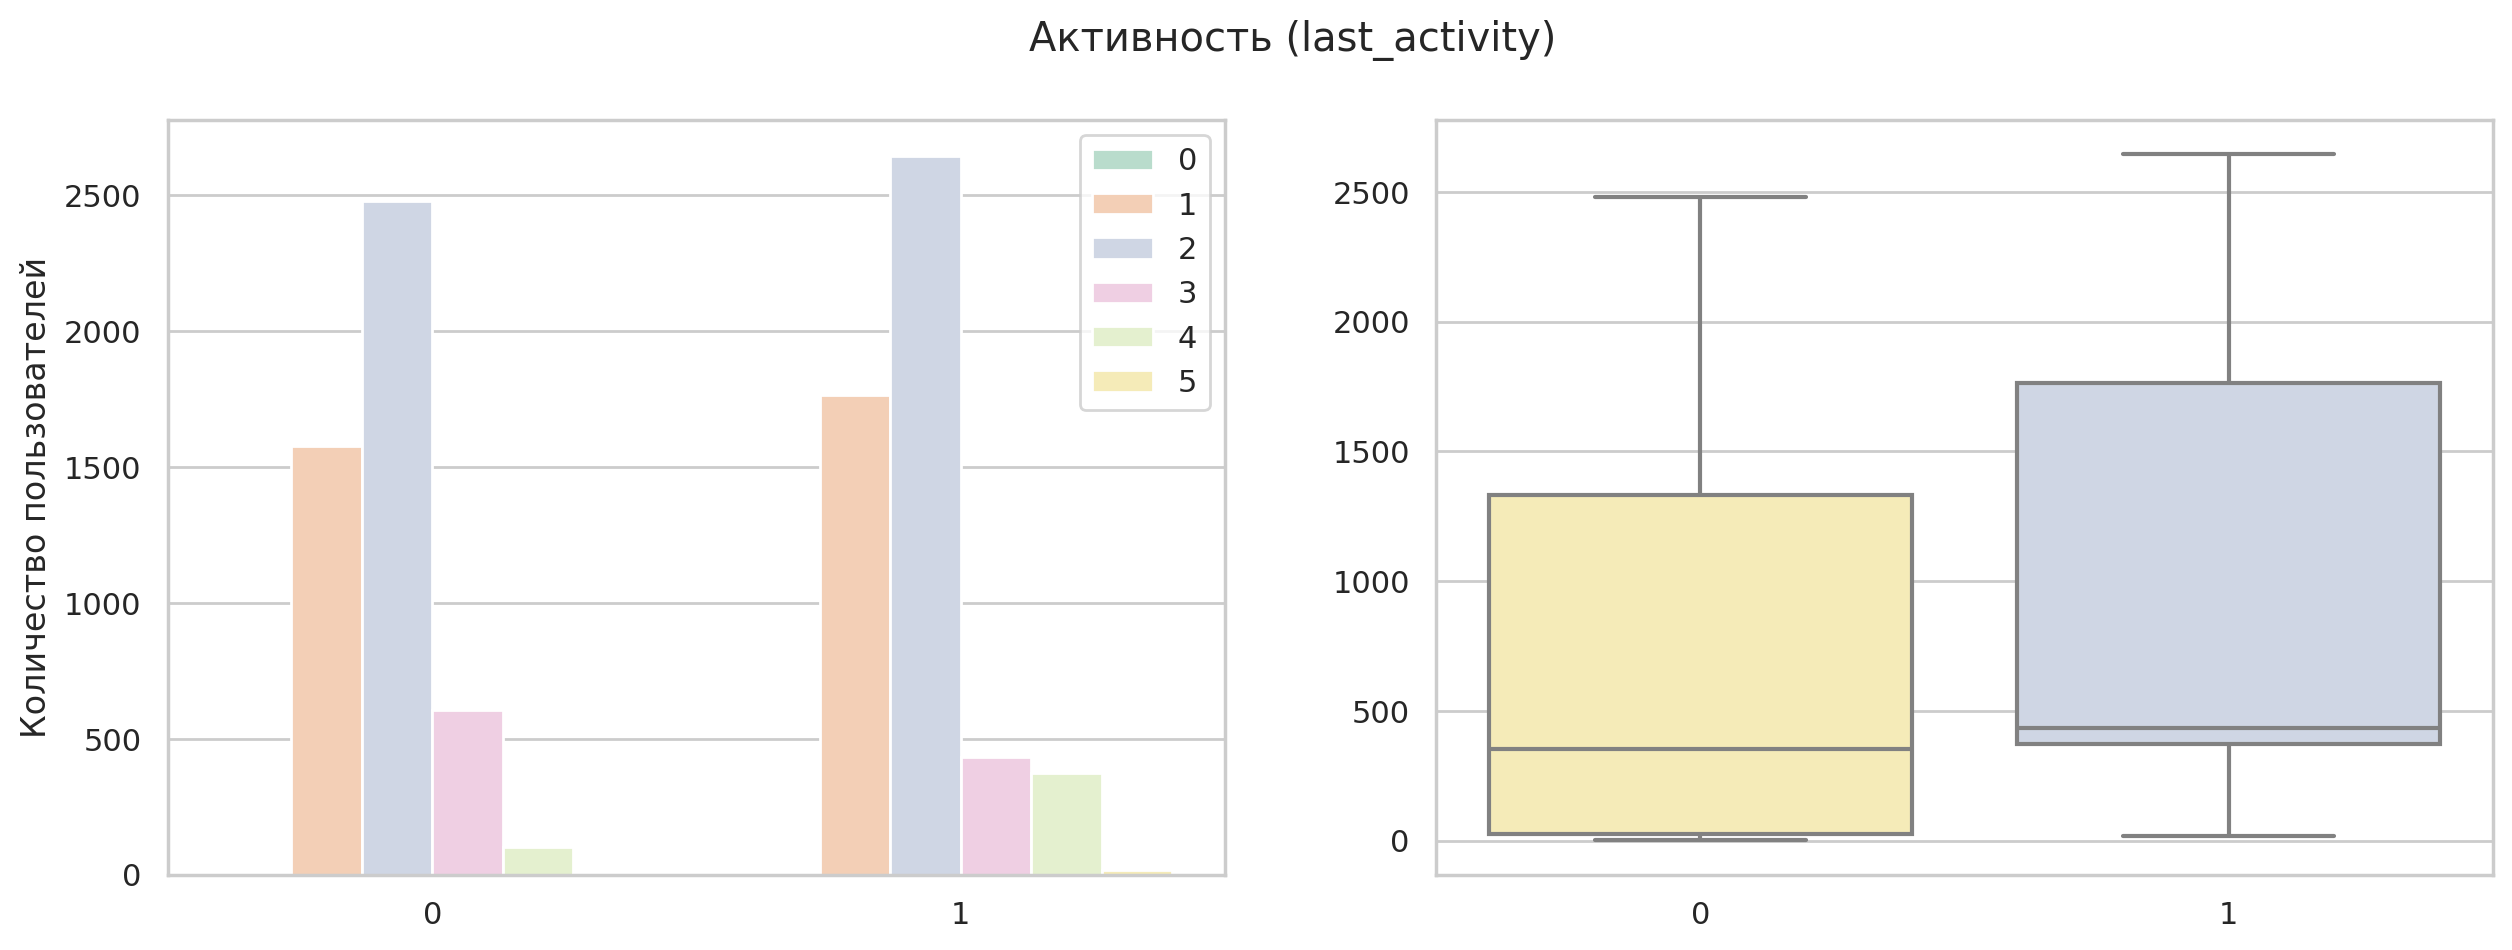

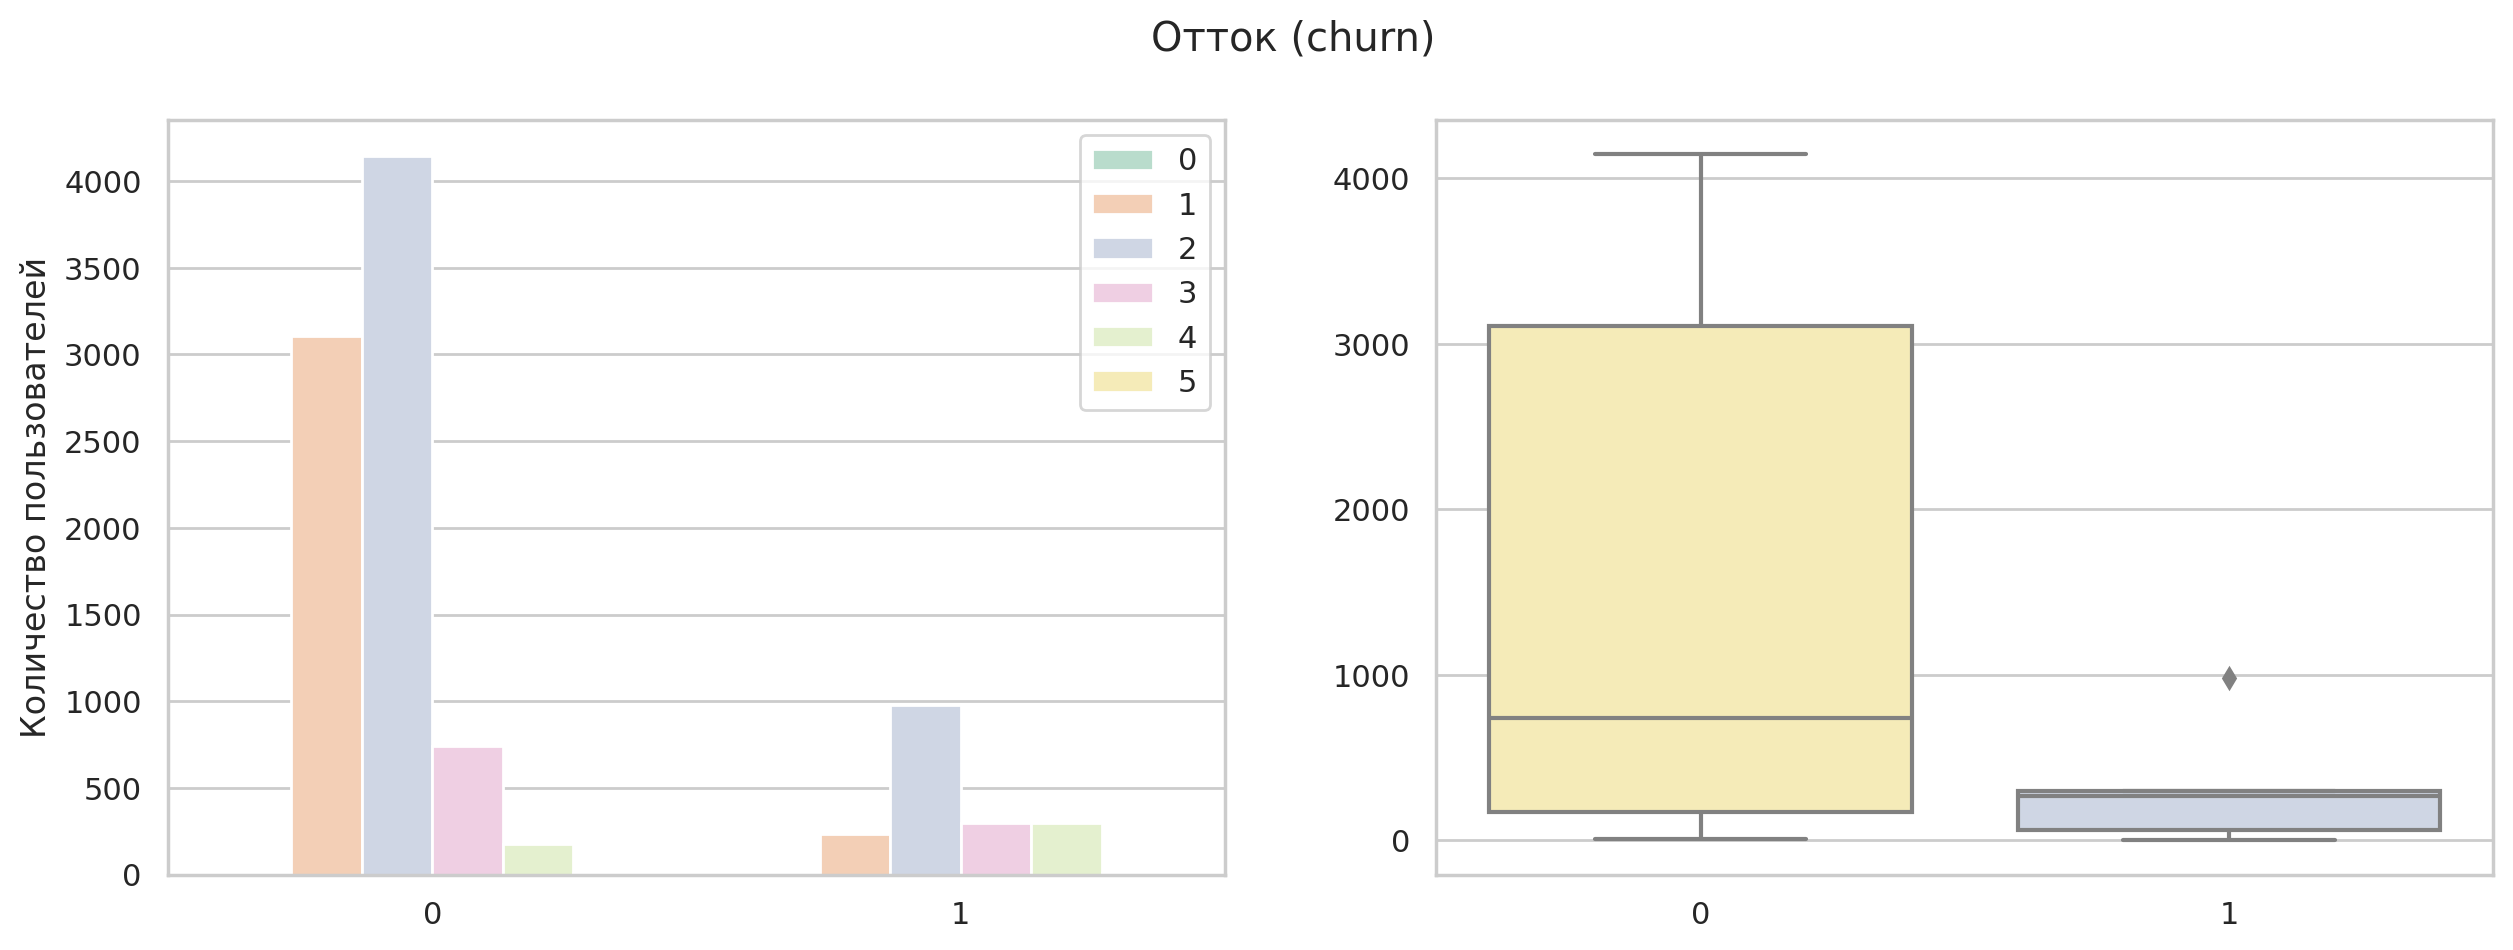

In [42]:
for index, row in categorical_colum.iterrows():
    categorical(data, row[0], row[1])

Основные сегменты по количеству продуктов:
 - клиенты с 2-мя продуктами - хороший скорринговые баллы, достаточно плавные, без резкого понижения или повышения, большой возростной диапозон от 31 до 49 - рабочая молодая группа, самые высокие показатели в распределении по горадам, больше всего клиентов с 2-мя прдуктами во всех городах, так же больше всего клиентов с 2-мя продуктами как женщин, так и мужчин, так же больше всего клиентов с 2-мя продуктами и наличием кредитной карты, но и самый высокий отток именно с этими клиентами, что вполне ожидаемо.
 - клиенты с 1-м продуктом, 3-мя и 4-мя продуктами - имеют высоккие показатели, по всем распределяющим категориям. 

__5. СТАТИСТИЧЕСКАЯ ПРОВЕРКА ГИПОТЕЗ__

__ГИПОТЕЗА № 1.__

Гипотеза различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.\
__H_0:__ Доходы между клиентами, которые пользуются двумя продуктмаи банка, и теми, которые пользуются одним - одинаковые.\
__H_1:__ Доходы между клиентами, которые пользуются двумя продуктмаи банка, и теми, которые пользуются одним - отличаются.\
alpha = 0.05

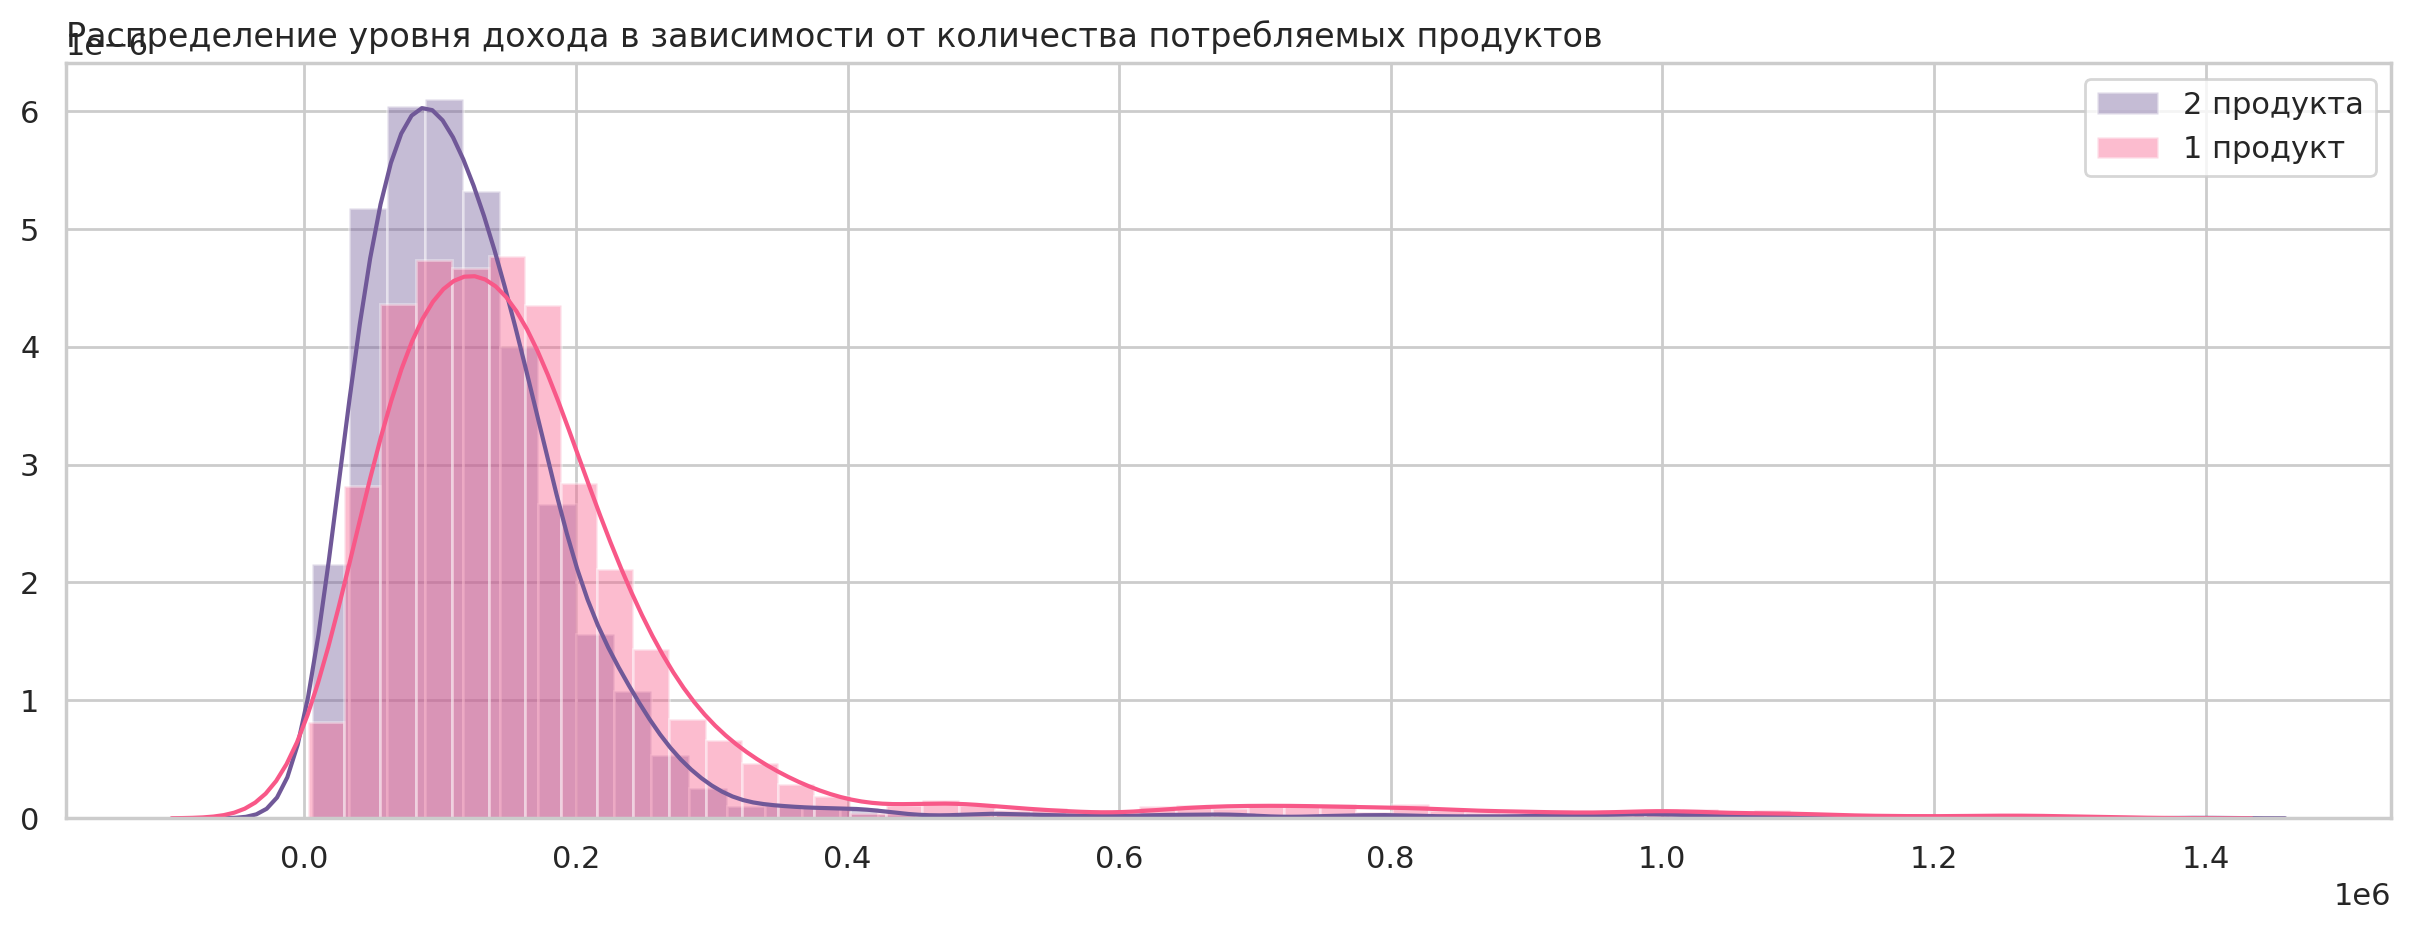

In [43]:
# прежде проверим данные на нормальность.

plt.figure(figsize=(15, 5))

sns.distplot(data[data['products'] == 2]['est_salary'], color = '#705898', label = '2 продукта')
sns.distplot(data[data['products'] == 1]['est_salary'], color = '#F85888', label = '1 продукт')

plt.title('Распределение уровня дохода в зависимости от количества потребляемых продуктов', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Данные выглядят не нормально, для корректной проверки гипотез удолим выдающиеся значения. 

In [44]:
data.drop(data[data['est_salary'] > 200000].index, inplace=True)

In [45]:
data.drop(data[data['est_salary'] < 30000].index, inplace=True)

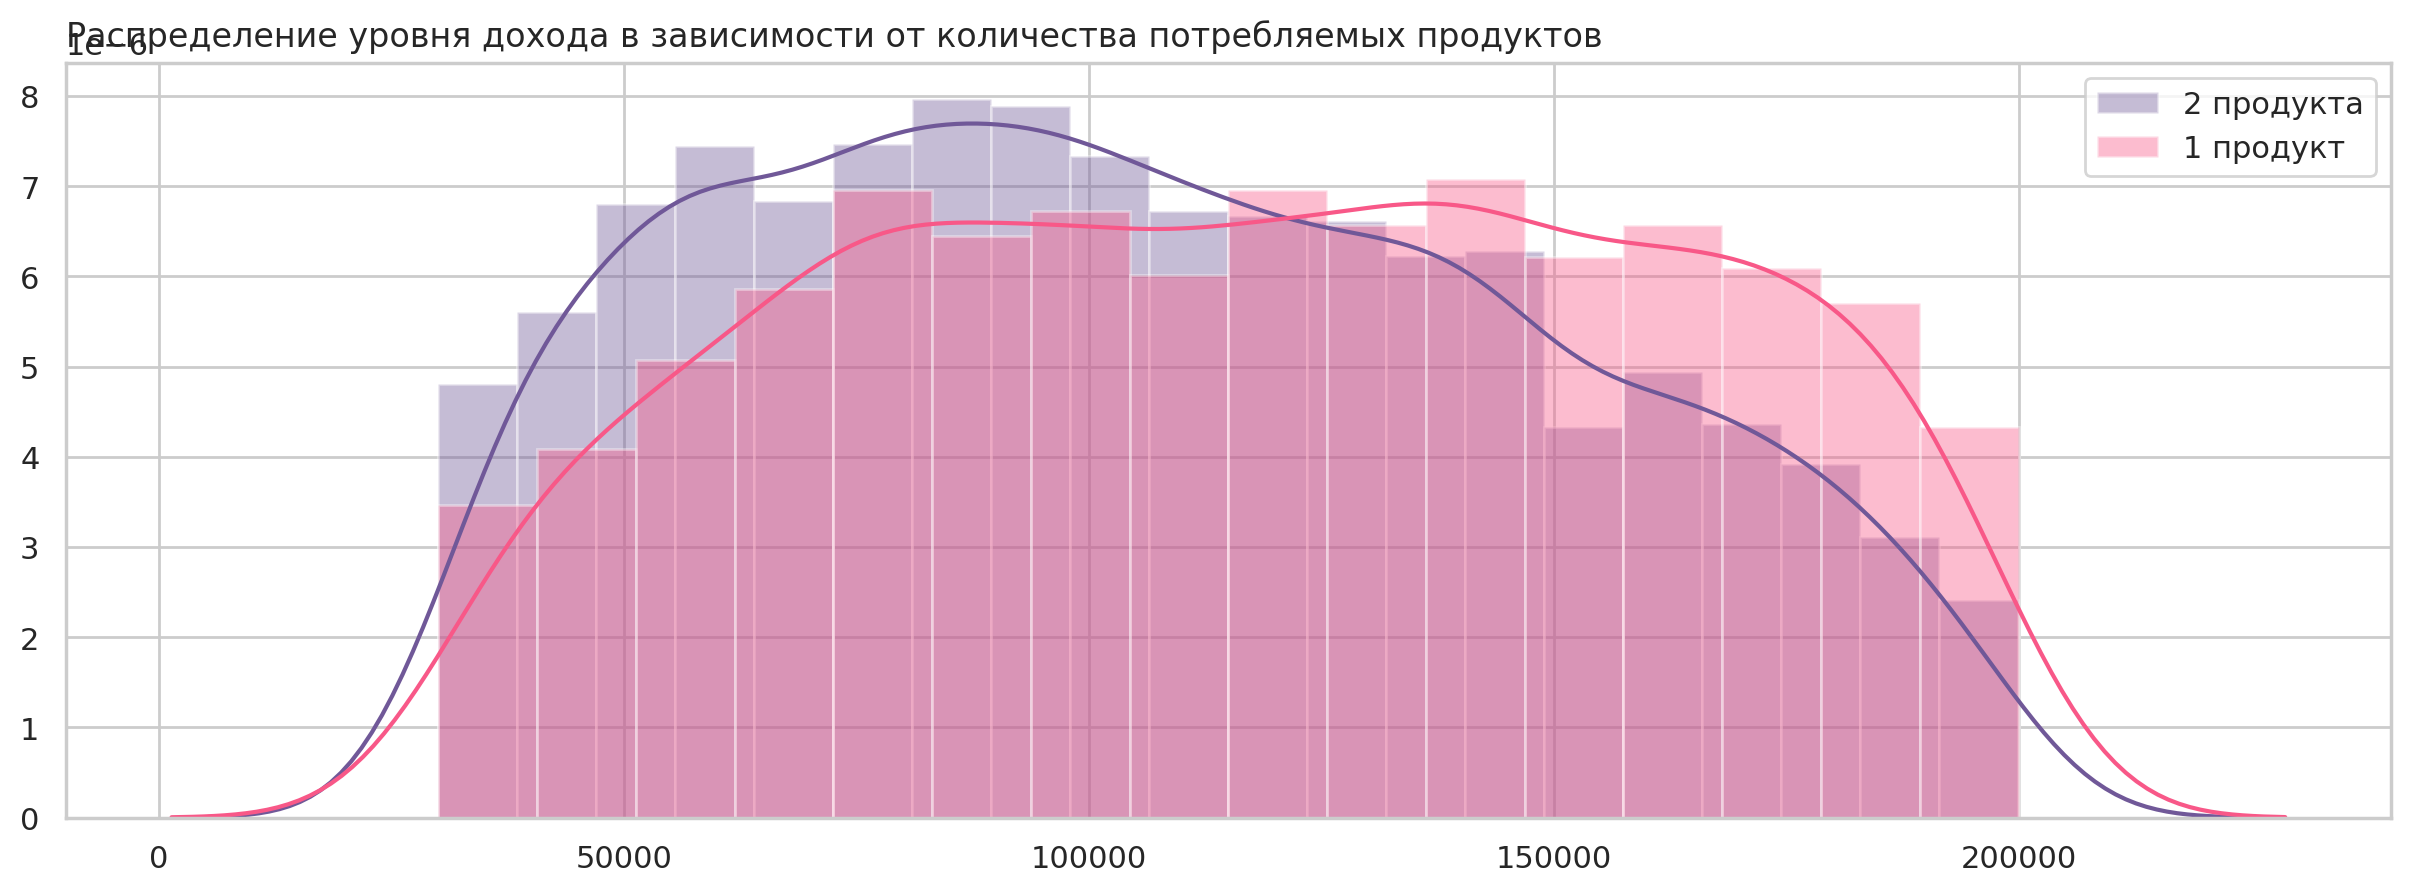

In [46]:
plt.figure(figsize=(15, 5))

sns.distplot(data[data['products'] == 2]['est_salary'], color = '#705898', label = '2 продукта')
sns.distplot(data[data['products'] == 1 ]['est_salary'], color = '#F85888', label = '1 продукт')

plt.title('Распределение уровня дохода в зависимости от количества потребляемых продуктов', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Вот теперь данные выглядят нормально, и можно приступить к проверки 1 Гипотезы.\
При проврки гипотез будем использовать t-тест(распределение Стьюдента) 

In [47]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data[data['products'] == 2]['est_salary'], 
                             data[data['products'] == 1]['est_salary'])

# alpha = задайте значение уровня значимости
alpha = .05 
# вывод значения p-value на экран 
print('p-значение: ', results.pvalue)
# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.377661424049048e-24
Отвергаем нулевую гипотезу


Мы не смогли подтвердить нулевую гипотезу, значит мы можем утверждать, что доход клиентов, которые пользуются двумя прдуктами банка, и теми, которые пользуются одним - отличается.

__ГИПОТЕЗА №2__

Гипотеза различия дохода между теми клиентами, которые ушли, и теми, которые остались.\
__H_0:__ Доходы между клиентами, которые ушли, и теми, которые остались - одинаковые.\
__H_1:__ Доходы между клиентами, которые ушли, и теми, которые остались - отличаются.\
alpha = 0.05

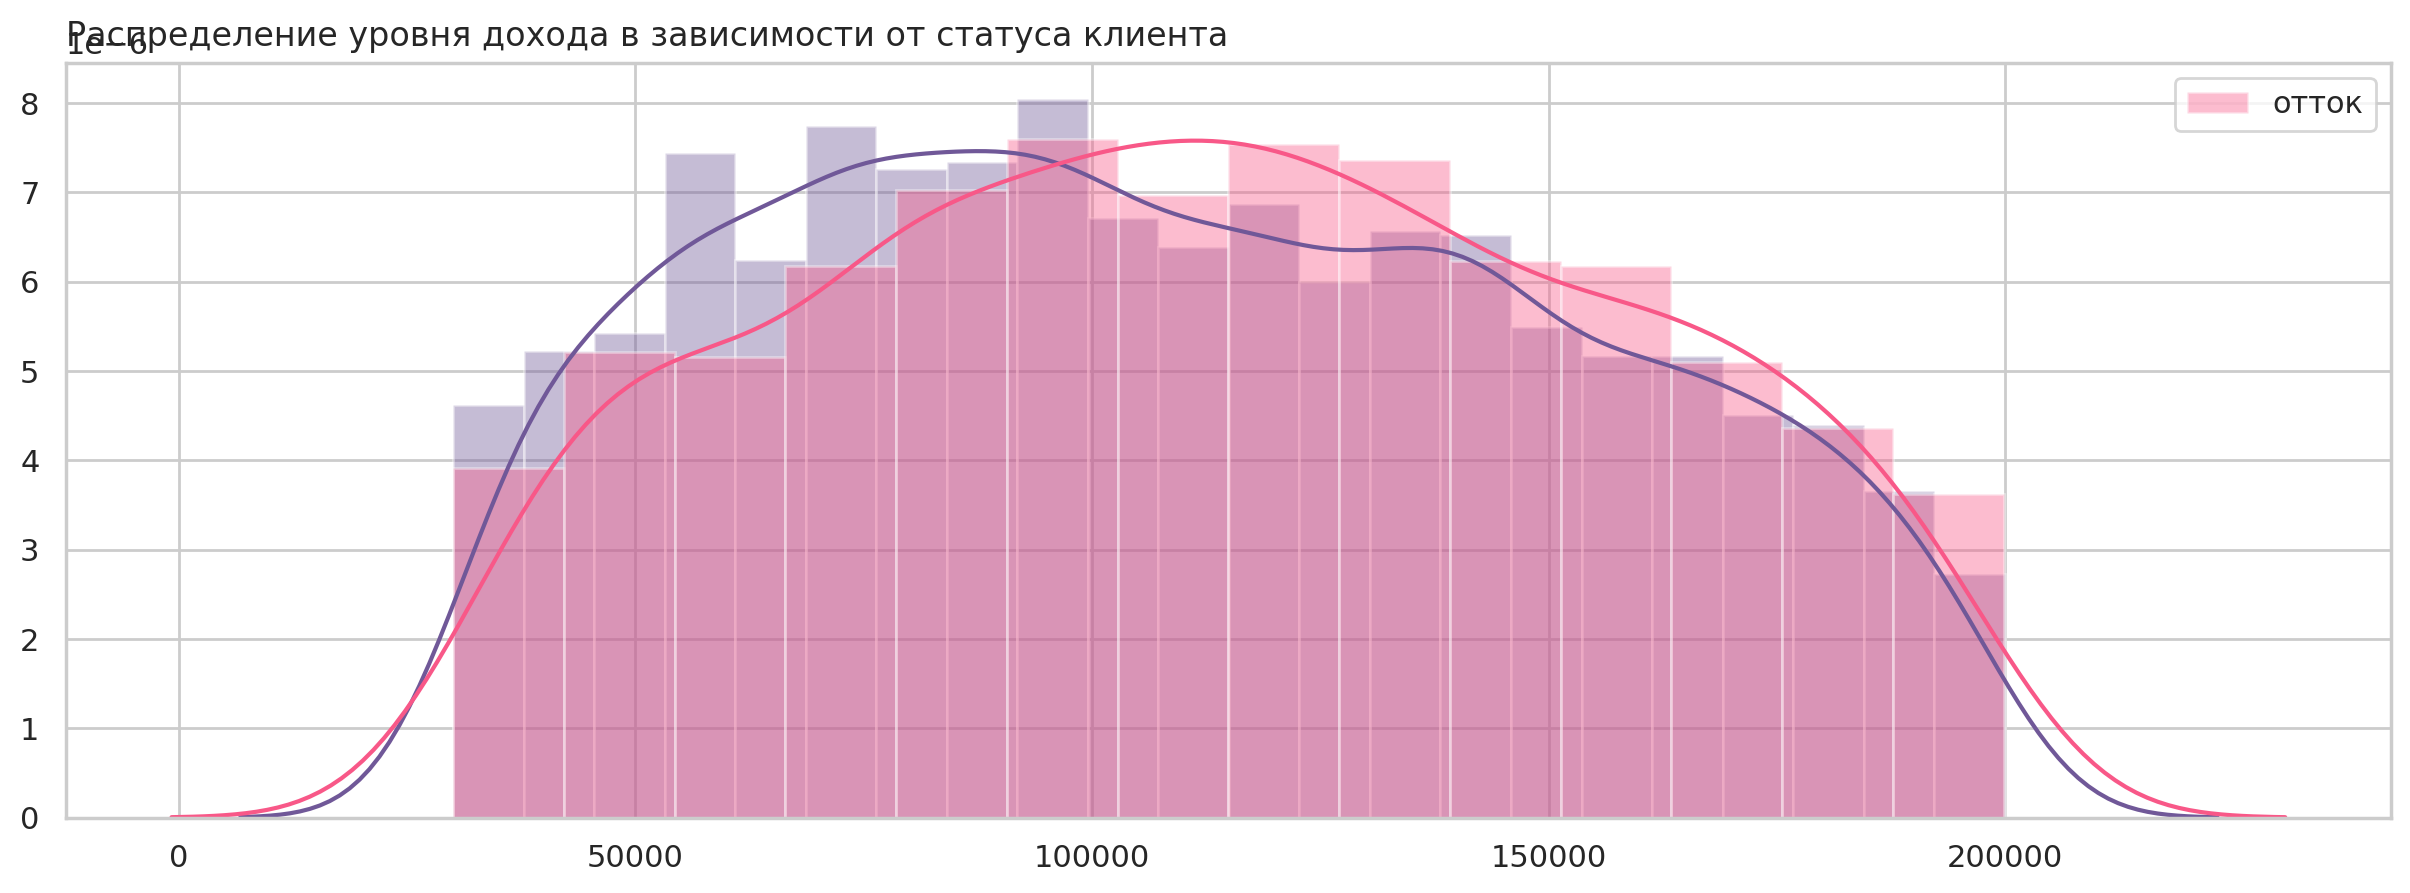

In [48]:
# прежде проверим данные на нормальность.
plt.figure(figsize=(15, 5))

sns.distplot(data[data['churn'] == 0]['est_salary'], color = '#705898')
sns.distplot(data[data['churn'] == 1]['est_salary'], color = '#F85888', label = 'отток')

plt.title('Распределение уровня дохода в зависимости от статуса клиента', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Распределение выглядит нормально.\
При проврки гипотез будем использовать t-тест(распределение Стьюдента) 

In [49]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data[data['churn'] == 0]['est_salary'], 
                             data[data['churn'] == 1]['est_salary'],
                      equal_var=False)

# alpha = задайте значение уровня значимости
alpha = .05 
# вывод значения p-value на экран 
print('p-значение: ', results.pvalue)
# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.00015071520571901243
Отвергаем нулевую гипотезу


Мы не смогли подтвердить нулевую гипотезу, значит мы можем утверждать, что доходы между клиентами, которые ушли, и теми, которые остались - отличаются.

# ВЫВОДЫ И РЕКОМЕНДАЦИИ

Был произведен анализ клиентов банка ПАО «Метанпромбанк», филиалы данного банка присутствуют в трех городах Ростов, Рыбинск и Ярославль.\
Предоставленный датасет имеет 10 000 клиентских записей. Имеют колонки с указанием скоррингово балла, заработная плата, наличие и количество недвижимости в собственности, гендерная принадлежность, наличие кредитной карты, и наличие и сумма остатка на счете в банке.\
У клиентов от 1 до 5 действующих продуктов банка.\
В ходе исследования было выделено 34 основные группы клиентов (исходя из числа пользователей, более 1000):\
 - клиенты имеющие 1 банковский продукт:
  - у 3 340 клиентов;
  - отток составляет - 7%;
  - 53%  - активные пользователи;
  - у 86% - имеется кредитная карта;
  - средний возрост клиентов - 41-42 года;
  - заработная плата - имеет высокий доход, и в среднем он выше, в сравнении с клиентами имеющих больше продуктов.
 - клиенты имеющие 2 банковских продукта:
  - у 5 108 клиентов;
  - отток состаляет 19%;
  - 52% - активные пользователи;
  - у 63% - имеются кредитные карты;
  - средний возрост клиентов 43 года;
  - заработная плата в среднем - выше среднего.
 - клиенты имеющие 3 банковских продукта:
  - у 1 046 клиентов;
  - отток составляет - 28%;
  - 42% - активные пользователи - самая низкая активность в сравнении с клиентами имеющих иное количество продуктов банка;
  - у 35% имеется кредитная карта - самая низкая по количеству кредитных карт в сравнении с клиентами имеющих иное количество продуктов банка;
  - средний возрост - 45 - 46 лет - самая возростная группа;
  - заработная плата в среднем - выше среднего.\
  
Далее провели проверку двух гипотез:\
 __Гипотеза №1__ Гипотеза различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одни.\
 По результатам которой мы не смогли подтвердить нулевую гипотезу, значит мы можем утверждать, что доход клиентов, которые пользуются двумя прдуктами банка, и теми, которые пользуются одним - отличается.\
 __Гипотеза №2__ Гипотеза различия дохода между теми клиентами, которые ушли, и теми, которые остались..
 По результатам которой мы не смогли подтвердить нулевую гипотезу, значит мы можем утверждать, что доходы между клиентами, которые ушли, и теми, которые остались - отличаются.

По результатам роведенного исследования можно дать следующие __рекомендации.__\
__Для клиентов имеющих 1 банковскй продукт:__\
У данного сегмента низкий процент оттока, но мы видим что больше половины пользуются кредитной картой, соответственно, здесь можно предложить только привлечение новых клиентов, возможно в рамках рекламной акции выпуск для новых клиентов кредитных карт с увеличенным сроком беспроцентного периода от 120 дней. Посредством дистанционного оформления, с помощью сервиса Госуслуги, выпиской СФР - подтверждение занятости и дохода.\
__Для клиентов имеющих 2 банковских продукта:__\
Так же как и спервим, отток не сильно большой, 19%, но в данном сегменте и саамое большое количество клиентов более 5 000. Здесь так же проведение каких либо акций для действующих клиентов, возможность оформления предодобренного кредита, без предоставления документов о занятости и доходе, а посредством подтверждения выпиской СФР.\
__Для клиентов имеющих 3 банковских продукта:__\
У данного сегмента меньше всего клиенты имеют кредитные карты, так же рассмотреть выдачу предодобренного продукта с беспроцентным периодом от 120 дней, возможные условия, кредитные карты от 50 000 до 100 000 - без документов подтверждающиъх доход и занятость, а с выпиской СФР. Так же возможность предодобренного предложения по объединению действующих потребительских кредитов в банке.\
__Для клиентов имеющих 4 банковских продукта:__\
Малое количество клиентов 474, и соответственно очень высокий процент оттока 63%. Для удержания данного сегмента, обязательно предложение как и для клиентов с  3-мя продуктами, предодобренного предложения по объединению действующих потребительских кредитов в банке. Так же возможность реструктуризации кредитов, если клиент находится в трудной жизненной ситуации, возможность отсрочки либо полного ежемесячного платежа, либо только суммы процентов, либо только суммы основго долга. Перевода задолженности по кредитной карте в потребительский кредит, с фиксированным ежемесячным платежом. Т.е. быть более лояльными к клиентам.